# Análisis recaudación y eficiencia recaudatoria
## Junio-2019
Análisis de recaudación tributaria hasta Mayo 2019.
- Se analiza comportamiento de Impuesto al Valor Agregado (IVA) y del Impuesto SObre la Renta  ISR, en valores brutos y netos. También se observa el comportamiento de devoluciones y compensaciones, buscando estudiar el el impacto que tuvo la suspensión de compensaciones en 2019.
- Se estudia la eficiencia recaudatoria, definida como la recaudación bruta en términos del Producto Interno bruto (PIB).
    - Un aspecto a tomar en cuenta es la diferencia en termporalidad que hay entre el PIB, que se calcula trimestralmente, y la recaudación, que es mensual. Para lograr un análisis mensual usando los datos más recientes de recaudación (Mayo 2019), utilizamos el Indicador Global de la Atividad Económica para proyectar el PIB del segundo trimestre del 2019. 
    - Estudiamos el comportamiento de la eficiencia recaudatoria en el tiempo. Dada la alta estacionalidad, comparamos la de cada mes en los últimos 5 años.
    - Analizamos la eslasticidad de recaudación con respecto al PIB.
    - Repetimos el análisis de eficiencia a nivel trimestral.

### Instrucciones:
- Jupyter notebook tiene dos estados: Edit y command. 
   - El modo editar se usa para modificar el contenido de una celda, y se puede ver cuando el color a la izquierda de la celda es verde. Para acceder al modo editar, hay que pulsar enter en la celda deseada. 
   - El modo command sirve para correr el código, para copiar y pegar celdas enteras, para cambiar el modo de una celda, etc. Si esta en modo editar, hay que pulsar esc para llegar al modo command.
- Las celdas pueden ser código o markdown (texto), (ver cell -> cell type). Esta celda es markdown. Para cambiar el modo de una celda a markdown, se puede pulsar M en modo command.
- Principales comandos:
    - shift + enter: Correr celda
    - A: Insertar celda arriba (en modo command)
    - B: Insertar celda abajo (en modo command)
    - ESC: Salir de modo edit
    - Enter: Entrar a modo edit
- Cada que vean download.<>() o describe.<>(), se está llamando una función que fue definida en download.py o en describe.py. Para ver instrucciones de la función, pueden ver el script o escribir help() con el nombre de la función  (ejemplo: help(download.get_files))
- Las funciones tienen argumentos. Los argumentos pueden ser introducidos en orden, o en desorden llamando el nombre del argumentp. Por ejemplo, una función que sume dos valores y los divida entre un tercero: sum_x_y_div(1, 2, 3) es igual a sum_x_y(x=1, y=2, z=3)
- En Python todos los límites inferiores se incluyen y los superiores se excluyen.
- Python ofrece integers(1, 2, ...,) floats(1.3..., 2.0, ), Booleans: (True, False) listas: [1, 2, 3], diccionarios: {'a': 1, 'b':2, 'c':3}, sets: {1, 2, 3, ...}, tuples: (1, 2, 3) (Aquí no usamos sets).
    - Listas:
        - Para obtener numero de elementos en lista: len(list)
        - Para obtener el primer elemento de una lista: list[0]
        - '' '' '' '' '' último '' '' '' '' '' '' '' ': list[-1] o list[len(list) -1]
        - '''''''''''''''Del primero al tercero '''''': list[0:3] (El primero se incluye, el último de excluye)
    - Diccionarios:
        - Los diccionarios son un mapa de 'key' a 'value': dict1 = {'a' : 1, 'b': 2, 'c': 3, 'd': [1, 2, 3]}
        - Para obtener el valor asociado a la letra 'a': dict1['a']
        - Para modificar el valor asociado a la letra 'b' : dict1['b'] = 8
        - Para aggregar la letra 'z' con el valor 5: dict1['z'] = 5
    - Tuples:
        - Son como listas, pero no se pueden modificar.
        - Para obtener los elementos, se usa el mismo sintax que con listas.
- Además, las librerias Numpy y Pandas sirven para trabajar con listas de números y con matrices de forma eficiente. Numpy ofrece los numpy arrays, que son vectors con los que se pueden hacer operaciones de vectores. Pandas ofrece DataFrames, que son matrices formadas por vectores llamados pandas Series. Esta es la principal estrictura para trabajar con datos.
    - Los DataFrames tienen columnas e indices. Las columnas son los nombres de las variables, el índice es un identificador de cada fila. Los indices pueden ser numéricos, strings, o para Time Series, elementos de fecha (DateTime)
        - Para obtener la columna 'a' de un DataFrame: DF['a']
        - Para obtener la fila asociada con el índice 2: DF.loc[2]
        - Para obtener el elemento de la fila 2, columna 'a': DF.loc[2, 'a']
        - Para obtener el cuarto elemento (sin importar el valor de su índice): DF.iloc[3]
- Cada que haya dudas, revisar el tipo del objeto usando type(object)

#### Comandos para poder modificar scripts de Python y ver los cambios inmediatamente en notebook:

In [1]:
# Configuraciones de Jupyter que sirven para que cambios en los scripts se actualicen automáticamente
%load_ext autoreload
%autoreload 2

#### Importar paquetes y scripts de Python:

In [2]:
#Paquetes de Python:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
# import warnings


# Scripts propios:
import download
import descriptive

#Opciones de visualización
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

#### Parámetros de las estimaciones

In [3]:
params = {
}

## Descarga de datos:

Ejemplo de una función. Es la función get_files en el script download.py. Esta función toma 7 argumentos, uno para cada descarga. La función descargará todas las bases que se pongan como True (Por default, y como está escritp ahora, la función no hace nada). Los datos se descargan en una carpeta 'inputs' en la carpeta madre de este archivo. Si no existe la carpeta inputs, la función crea la carpeta.

In [4]:
download.get_files(inpc_2018=True, pibr_2013=False, pibr_2013_sa=False,
                   fiscal_current=False, fiscal_hist=False, igae=False,
                   igae_sa=False)

Downloaded inpc_2018 in ../inputs/inpc_2018.csv, last value: 2019/05


## Importando datos

Cada una de las siguientes funciones sirve para cargar los datos descargados como Pandas DataFrame. Las funciones fueron escritas para que Python sepa donde están los datos descargados, por eso no hay que indicar la ruta de los csv. Si se especifica sa=True, en las funciones de IGAE y de PIB_r, se cargan los datos ajustados por estacionalidad. El principal requisito para correr estas funciones es haber descargado los datos. 

Otra opción sería importar cada uno de los CSV usando df = pd.read_csv(csv_path). De hecho, cada una de estas funciones hace eso, pero también hacen unas modificaciones que nos ayudan mucho, por ejemplo:
- Convierten los datos a datos mensuales con índice DateTime
- Crean variables en valores reales, usando en INPC
- Crean variables conjuntas (Como la suma de devoluciones y compensacines para ingresos sat).
- Etc

In [5]:
download.load_ingresos_fiscales_sat()

ing_tot_brut_(mdp)  ing_neto_(mdp)  ing_trib_brut_(mdp)  \
fecha                                                                 
2014-01-01       340545.291390   289295.877983        258616.492937   
2014-02-01       248258.232006   204160.645637        171153.675316   
2014-03-01       305428.717887   238214.490807        215581.745640   
2014-04-01       325203.714326   258334.525479        236584.311612   
2014-05-01       271824.461071   212301.656479        191870.375161   
2014-06-01       293089.460405   228435.403154        200093.364560   
2014-07-01       299394.135339   237122.209622        205413.596787   
2014-08-01       279970.072150   225216.432182        197478.281788   
2014-09-01       270255.797328   219399.881776        185751.090788   
2014-10-01       282863.794346   233196.494424        195301.531745   
2014-11-01       289317.201992   240921.571868        191845.430965   
2014-12-01       360927.310859   312305.620013        219611.492760   
2015-01-01       373010.853637   300915.929938        296855.600677   
2015-02-01       263744.051087   218098.936676        219480.280365   
2015-03-01       412693.449316   342192.498012        319403.324150   
2015-04-01       315653.285225   250013.944150        272706.875467   
2015-05-01       283152.910927   227545.452915        226585.304763   
2015-06-01       301128.489455   247124.649902        238627.401456   
2015-07-01       316460.588339   257928.923563        247566.561165   
2015-08-01       309171.216707   250844.833314        249289.715948   
2015-09-01       280857.265052   229429.106856        233457.655549   
2015-10-01       291059.478557   225457.399012        242771.660486   
2015-11-01       352754.409402   291339.425301        238239.897463   
2015-12-01       398984.095853   346145.692945        270221.923159   
2016-01-01       346061.624459   287757.576058        299501.097552   
2016-02-01       287172.298312   230433.686096        252111.884488   
2016-03-01       403007.956087   331740.873584        352777.625490   
2016-04-01       598765.235632   521916.929111        314025.577517   
2016-05-01       308970.693948   235573.955719        281472.052287   
2016-06-01       331836.192425   267177.553236        287511.790898   
2016-07-01       337641.563268   282283.950971        287525.002470   
2016-08-01       322769.109031   248045.690400        275053.397485   
2016-09-01       319654.474521   259489.113661        274331.874765   
2016-10-01       352527.747843   273639.237407        275156.810515   
2016-11-01       305872.481495   251970.234637        272573.908722   
2016-12-01       449717.658985   388096.282730        318993.738401   
2017-01-01       405796.422975   312410.130868        349574.330031   
2017-02-01       351876.363371   285465.962113        291895.526666   
2017-03-01       724719.619739   640723.218915        332595.478637   
2017-04-01       430379.477364   338836.385260        370924.477404   
2017-05-01       352728.763053   273658.208344        301235.888749   
2017-06-01       374476.452018   289919.979260        316589.446113   
2017-07-01       374724.655595   312450.821828        314956.869834   
2017-08-01       361854.785924   278296.258551        314311.529677   
2017-09-01       343059.161035   276583.550573        289139.129521   
2017-10-01       341426.860134   257169.253191        288647.485542   
2017-11-01       374118.950537   285103.702921        301126.548213   
2017-12-01       403647.704030   319761.070209        336447.777236   
2018-01-01       427117.241230   357410.130976        366721.269212   
2018-02-01       375115.536464   306540.618556        306338.458641   
2018-03-01       398684.773097   317186.051754        327996.002741   
2018-04-01       458512.394043   346215.242031        399442.835892   
2018-05-01       393251.760433   294997.426352        325648.819951   
2018-06-01       406241.622735   315812.244808        340966.321437   
2018-07-01       470149.722970   400

In [6]:
ingresos_sat = download.load_ingresos_fiscales_sat()
igae = download.load_igae()
pib_r_df = download.load_pib_r()

Podemos ver el tipo de cada uno de estos objetos. ** Si no incluimos display, solo se veria el último resultado.

In [7]:
display(type(ingresos_sat))
display(type(igae))
display(type(pib_r_df))

pandas.core.frame.DataFrame

pandas.core.frame.DataFrame

pandas.core.frame.DataFrame

Podemos ver las dimensiones de cada uno de los DF.

In [8]:
display(ingresos_sat.shape)
display(igae.shape)
display(pib_r_df.shape)

(65, 73)

(316, 1)

(364, 2)

Podemos ver estadísticas descriptivas de las variables de cada DF

In [9]:
display(ingresos_sat.describe())
display(igae.describe())
display(pib_r_df.describe())

ing_tot_brut_(mdp)  ing_neto_(mdp)  ing_trib_brut_(mdp)  \
count           62.000000       62.000000            62.000000   
mean        361684.799025   290287.399692        284681.324741   
std          78543.580312    70070.547084         56058.169622   
min         248258.232006   204160.645637        171153.675316   
25%         306647.034608   247354.910027        239663.466213   
50%         352628.255448   281344.128170        288893.307532   
75%         398927.437540   314971.889063        327409.207043   
max         724719.619739   640723.218915        404094.272863   

       ing_trib_neto_(mdp)  ing_no_trib_bruto_(mdp)  ing_no_trib_neto_(mdp)  \
count            62.000000                62.000000               62.000000   
mean         215784.456410             77003.474284            74502.943282   
std           45294.748629             55024.994641            55943.594432   
min          127219.637857             11700.542577            10508.571568   
25%          183380.056639             51814.499376            48985.084416   
50%          223139.346480             64166.923839            61270.927239   
75%          247454.763024             82351.042385            81887.259729   
max          318497.357200            392124.141102           391177.217782   

       iva_bruto_(mdp)  iva_neto_(mdp)  iva_dev_(mdp)  iva_comp_(mdp)  \
count        65.000000       65.000000      65.000000       65.000000   
mean     114250.048840    66115.862537   29340.374613    17788.842243   
std       20092.846247    12246.481042    8761.042674     6415.113125   
min       77009.094764    40121.814725   14712.201271     7681.245773   
25%       97366.578596    56813.147431   23242.397380    12687.177227   
50%      115169.176151    63715.595578   27182.199801    16599.296154   
75%      128686.501813    74732.802043   35003.952017    22477.523133   
max      157359.524175    99012.424203   50896.517556    34755.472927   

       iva_reg_(mdp)  isr_bruto_(mdp)  isr_dev_(mdp)  isr_comp_(mdp)  \
count      65.000000        65.000000      65.000000       65.000000   
mean     1004.969446    134892.648302    3102.253170     9269.937948   
std      1041.737038     36247.178037    3340.848158     4522.920562   
min       173.016804     78397.439431     344.334639     3294.797910   
25%       592.275683    107649.754823    1074.214548     5912.286504   
50%       717.089348    131040.142134    1760.121527     8398.017179   
75%      1258.049796    153045.113398    3578.215703    11155.224441   
max      7646.059397    250533.063077   18299.389373    25079.958678   

       isr_reg_(mdp)  isr_neto_(mdp)  ieps_bruto_(mdp)  ieps_neto_(mdp)  \
count      65.000000       65.000000         62.000000        62.000000   
mean     1830.287043   117987.180626      30143.348290     27108.082375   
std      1565.290041    32439.042700       9811.731772      9979.821387   
min       488.929340    66800.404000       9719.390817      4702.305110   
25%       759.807837    92696.842000      28018.907456     24965.472268   
50%      1009.596139   116069.711400      31825.062631     29198.046989   
75%      2427.402229   133150.358200      36405.905513     33204.051039   
max      6527.836943   204431.517966      50865.577642     45378.363760   

       ieps_dev_(mdp)  ieps_comp_(mdp)  ieps_reg_(mdp)  iva_dev_comp_(mdp)  \
count       62.000000        60.000000       60.000000           65.000000   
mean       296.246982       476.171165     1542.465212        47129.216856   
std        340.737524      1076.616873     1422.297163        12783.869714   
min          0.032187        98.941843    -3130.478381        23476.811726   
25%         32.027891       184.623237      237.309224        37189.724404   
50%         47.532243       300.102607     1835.784697        45894.650049   
75%        664.922842       415.336486     2625.713735        57794.158045   
max       1037.002163      8417.325713     4603.874533        73106.735058   

       iva_dev

igae
count  316.000000
mean    86.920320
std     15.125170
min     59.239087
25%     76.392600
50%     86.467466
75%     98.883908
max    118.037329

pibr_2013     pibr_2019
count  3.630000e+02  3.630000e+02
mean   1.349140e+07  1.662596e+07
std    2.846017e+06  3.507254e+06
min    8.452557e+06  1.041640e+07
25%    1.086293e+07  1.338680e+07
50%    1.330570e+07  1.639712e+07
75%    1.552601e+07  1.913328e+07
max    1.907751e+07  2.350994e+07

Podemos ver el índice de cada DF. Únicamente los ingresos los tenemos desde 2014, los demás desde 1990 aprox.

In [10]:
display(ingresos_sat.index)
display(igae.index)
display(pib_r_df.index)

DatetimeIndex(['2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
      

DatetimeIndex(['1993-01-01', '1993-02-01', '1993-03-01', '1993-04-01',
               '1993-05-01', '1993-06-01', '1993-07-01', '1993-08-01',
               '1993-09-01', '1993-10-01',
               ...
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01', '2019-01-01', '2019-02-01',
               '2019-03-01', '2019-04-01'],
              dtype='datetime64[ns]', name='fecha', length=316, freq=None)

DatetimeIndex(['1989-01-01', '1989-02-01', '1989-03-01', '1989-04-01',
               '1989-05-01', '1989-06-01', '1989-07-01', '1989-08-01',
               '1989-09-01', '1989-10-01',
               ...
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01', '2019-01-01', '2019-02-01',
               '2019-03-01', '2019-04-01'],
              dtype='datetime64[ns]', name='fecha', length=364, freq='MS')

## Análisis de Ingresos Fiscales

La función plot_series, del script descriptive la uso mucho. Sirve para hacer una gráfica de los datos de un DataFrame. Veamos los argumentos que toma:

In [11]:
help(descriptive.plot_series)

Help on function plot_series in module descriptive:

plot_series(df, cols=None, title=None, subtitle=None, legend=None, save_to=None, min_date=None, max_date=None, ticks='auto', ticks_freq=1, figsize=(15, 8), legend_out=False, dpi=200, footnote=None, hline=None)
    La función plot_series sirve para hacer una gráfica de los datos de un DataFrame.
    Inputs:
        - df: DataFrame or Serie
        - cols: [str] (Nombres de las columnas a graficar) Default: Todo el DF
        - title: str (Título del gráfico). Default: None
        - subtitle: str (Subtítulo del gráfico). Default: None
        - legend: [str] (Legendas a utilizar) Default: Las legendas serán los nombres de las variables). 
        - save_to: 'str' (Filepath para guardar imagen) Defaults: None (No se guarda)
        - min_date: str or datetime. (Fecha a partir de la cual se verá la gráfica). Default: None (Se incluyen todas las fechas)
        - max_date: str or datetime. (Fecha máxima se verá la gráfica). Default: None

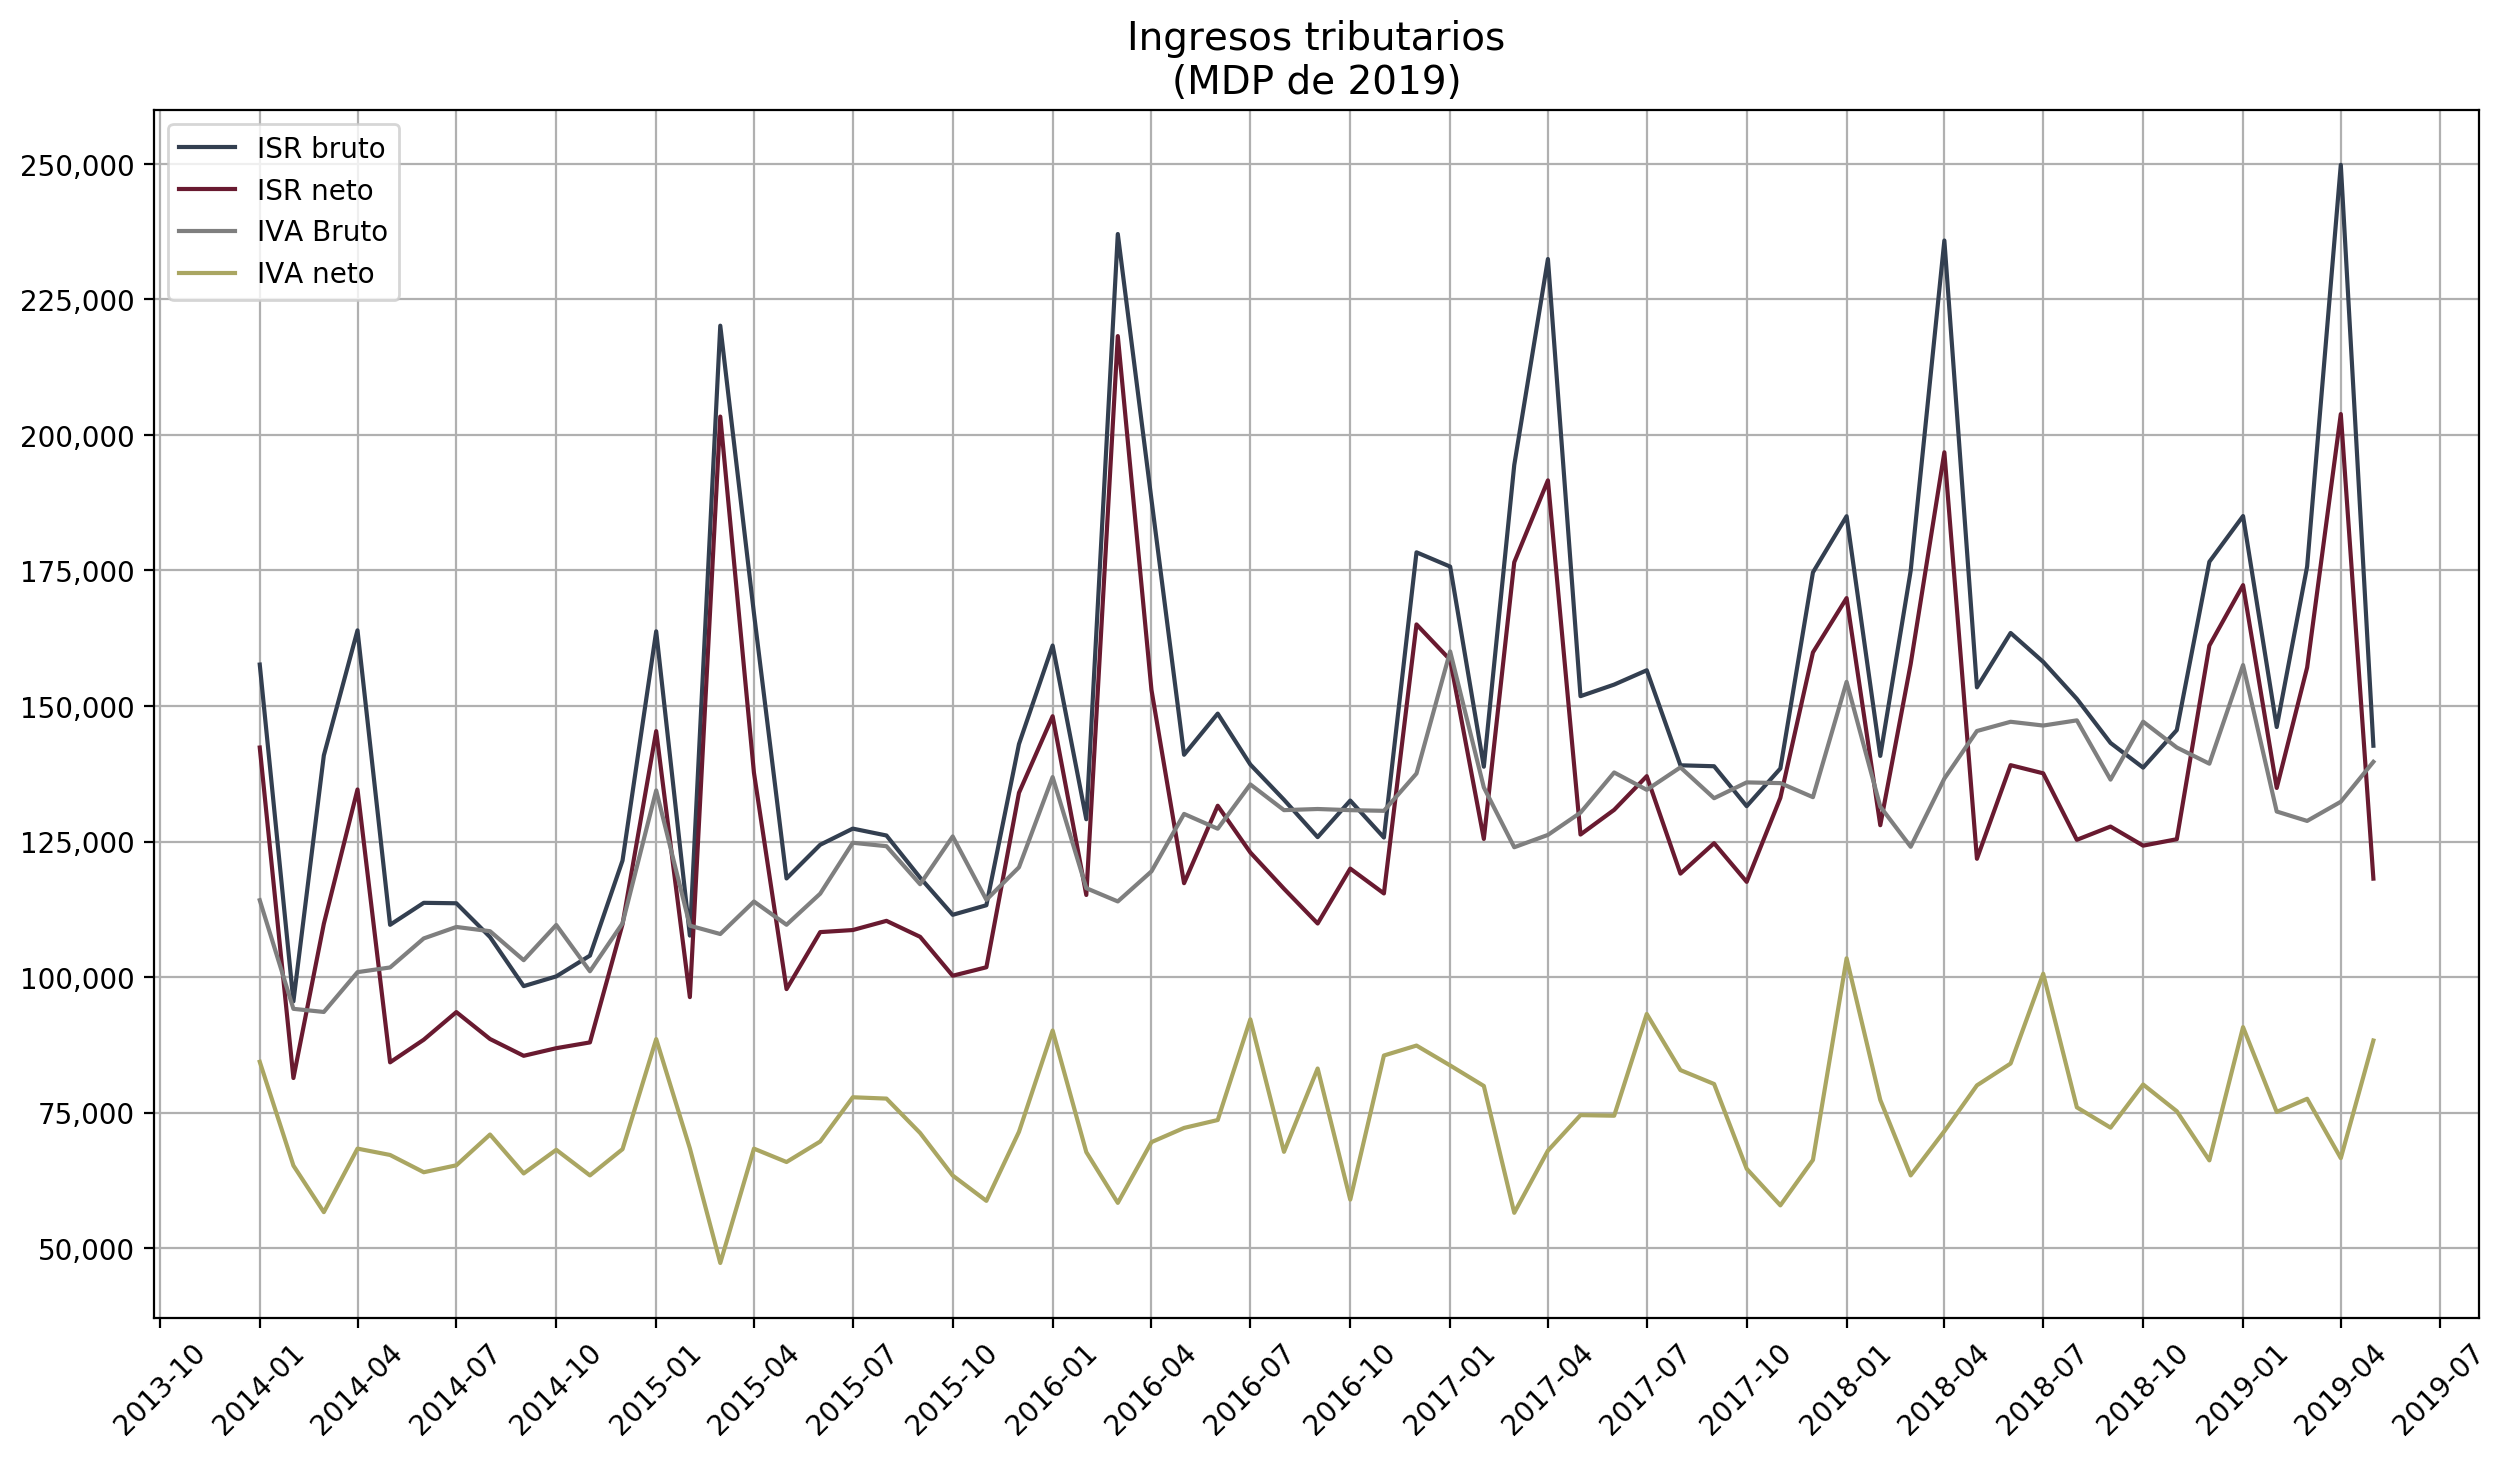

In [12]:
descriptive.plot_series(df = ingresos_sat,
                        cols = ['isr_bruto_(mdp)_r', 'isr_neto_(mdp)_r', 'iva_bruto_(mdp)_r', 'iva_neto_(mdp)_r'],
                        legend= ['ISR bruto', 'ISR neto', 'IVA Bruto', 'IVA neto'],
                        title='Ingresos tributarios', subtitle='(MDP de 2019)',ticks='quarterly')

cross_tab es otra función muy utilizada. Hace una tabla comparativa por año y por mes de las variables indicadas. Argume tos:
- df: DF
- cols: [str]
- years: [int]
- ratios: Bool, Indica que las variables que es están analizando son ratios. Esto es indispensable para calcular los totales. Defaults: False
- cols_for_tot: [[str]] Si las variables son ratios, la función necesita los numeradores y denominadores para calcular el valor de los totales. Por cada variable que se incluya en columns, se debe incluir el par de variables que se usaron para construir. Default: None
- for_plot: Bool.  Sirve para que el resultado tenga los meses como columnas. En dado caso, la tabla es muy sencilla, solo con el objetivo de hacer una gráfica. Default: False
- notna: Bool: Solo incluir meses para los cuales haya valores para todos los años. Default: True
- absolute_change: Bool, calcular el cambio como porcentual o absoluto. Para variables que son ratios, creo que es mejor calcular el cambio como absoluto. Default False
    '''

In [13]:
descriptive.cross_tab(df = ingresos_sat,
                      cols = ['isr_bruto_(mdp)_r', 'isr_neto_(mdp)_r', 'iva_bruto_(mdp)_r', 'iva_neto_(mdp)_r'],
                      years = [2018, 2019],
                      ratios=False)

## Análisis de compensaciones y devoluciones

### MDP de 2019

In [14]:
descriptive.cross_tab(df = ingresos_sat,
                      cols = ['iva_dev_(mdp)_r', 'iva_comp_(mdp)_r', 'isr_dev_(mdp)_r', 'isr_comp_(mdp)_r'],
                      years = [2018, 2019],
                      ratios = False)

Se ve comportamiento a la baja en compensaciones del IVA, cerrando Mayo de 2019 en 7,440 MDP, muy por debajo de la cifra de 2018 de alrededor de 26,484. Devoluciones de IVA, por su parte, incrementan. El valor para Mayo de 2019 es de 40,810 MDP, por encima del valor para mayo del 2018 de 35,359 MDP. En resumen, se observa una disminución en compoensaciones de 19,040 MDP y un incremento en devoluciones de 5,451 MDP, resultando en una reducción neta de 13,589 en los gastos del estado.

### % del Bruto

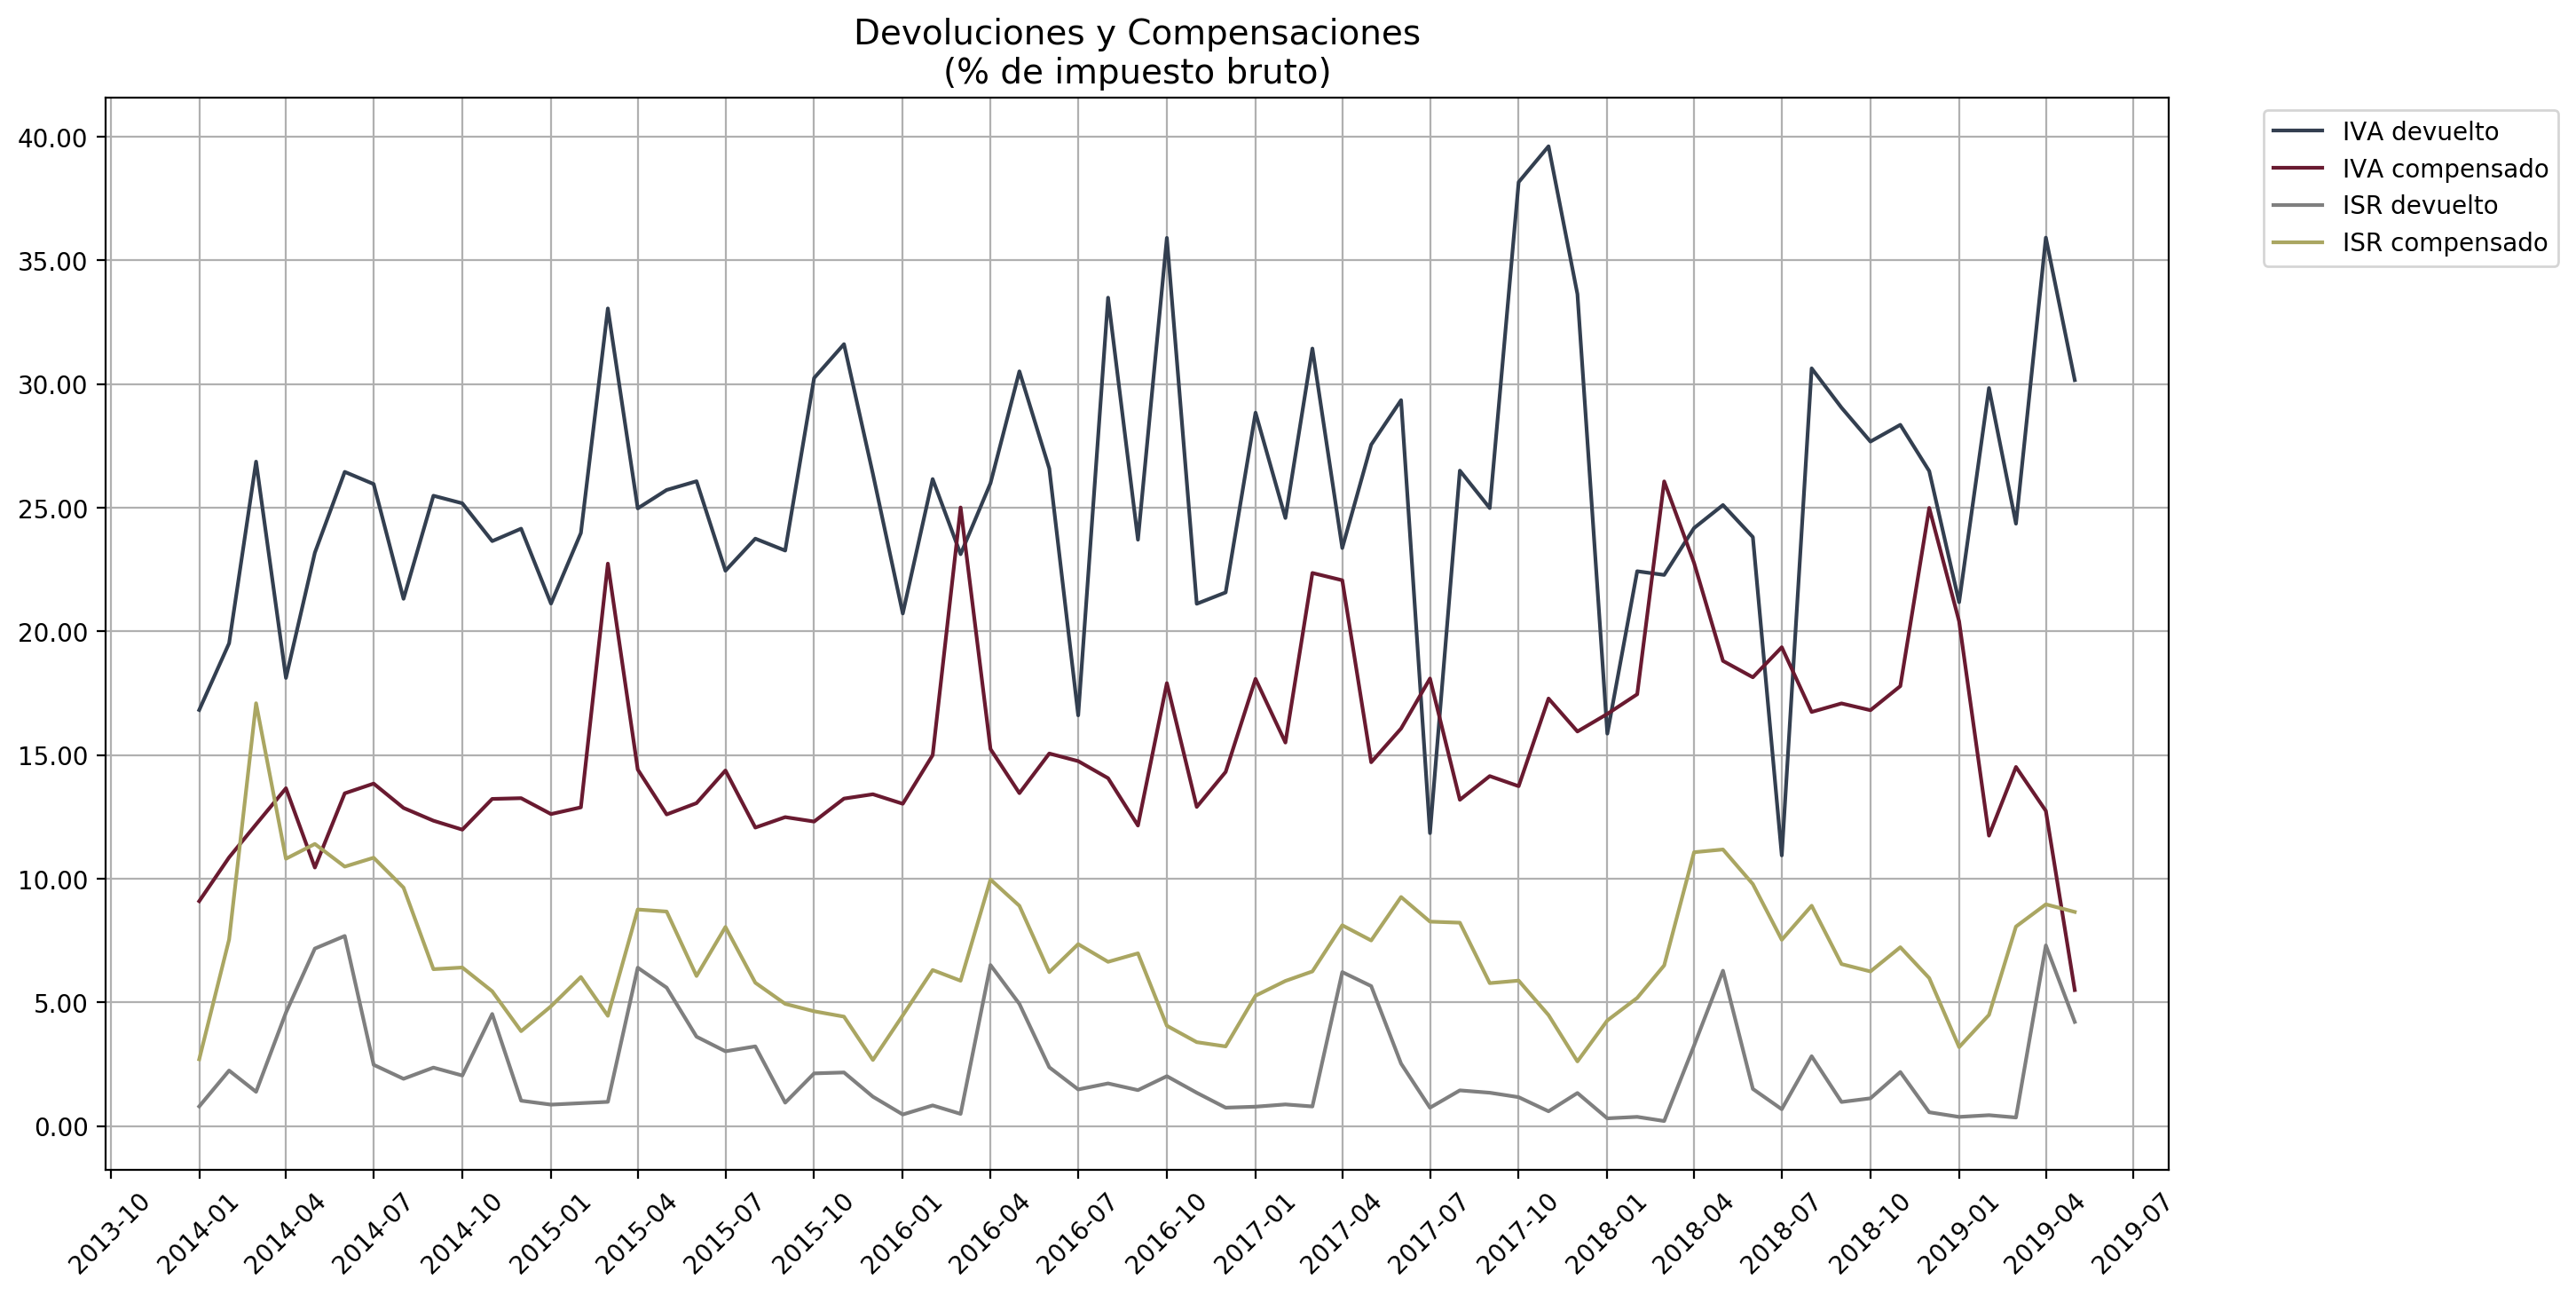

In [15]:
descriptive.plot_series(df = ingresos_sat,
                        cols = ['iva_dev_%bruto', 'iva_comp_%bruto',
                                'isr_dev_%bruto', 'isr_comp_%bruto'],
                        legend= ['IVA devuelto', 'IVA compensado',\
                                 'ISR devuelto', 'ISR compensado'],
                        title='Devoluciones y Compensaciones',
                        subtitle='(% de impuesto bruto)',ticks='quarterly',
                        legend_out=True)

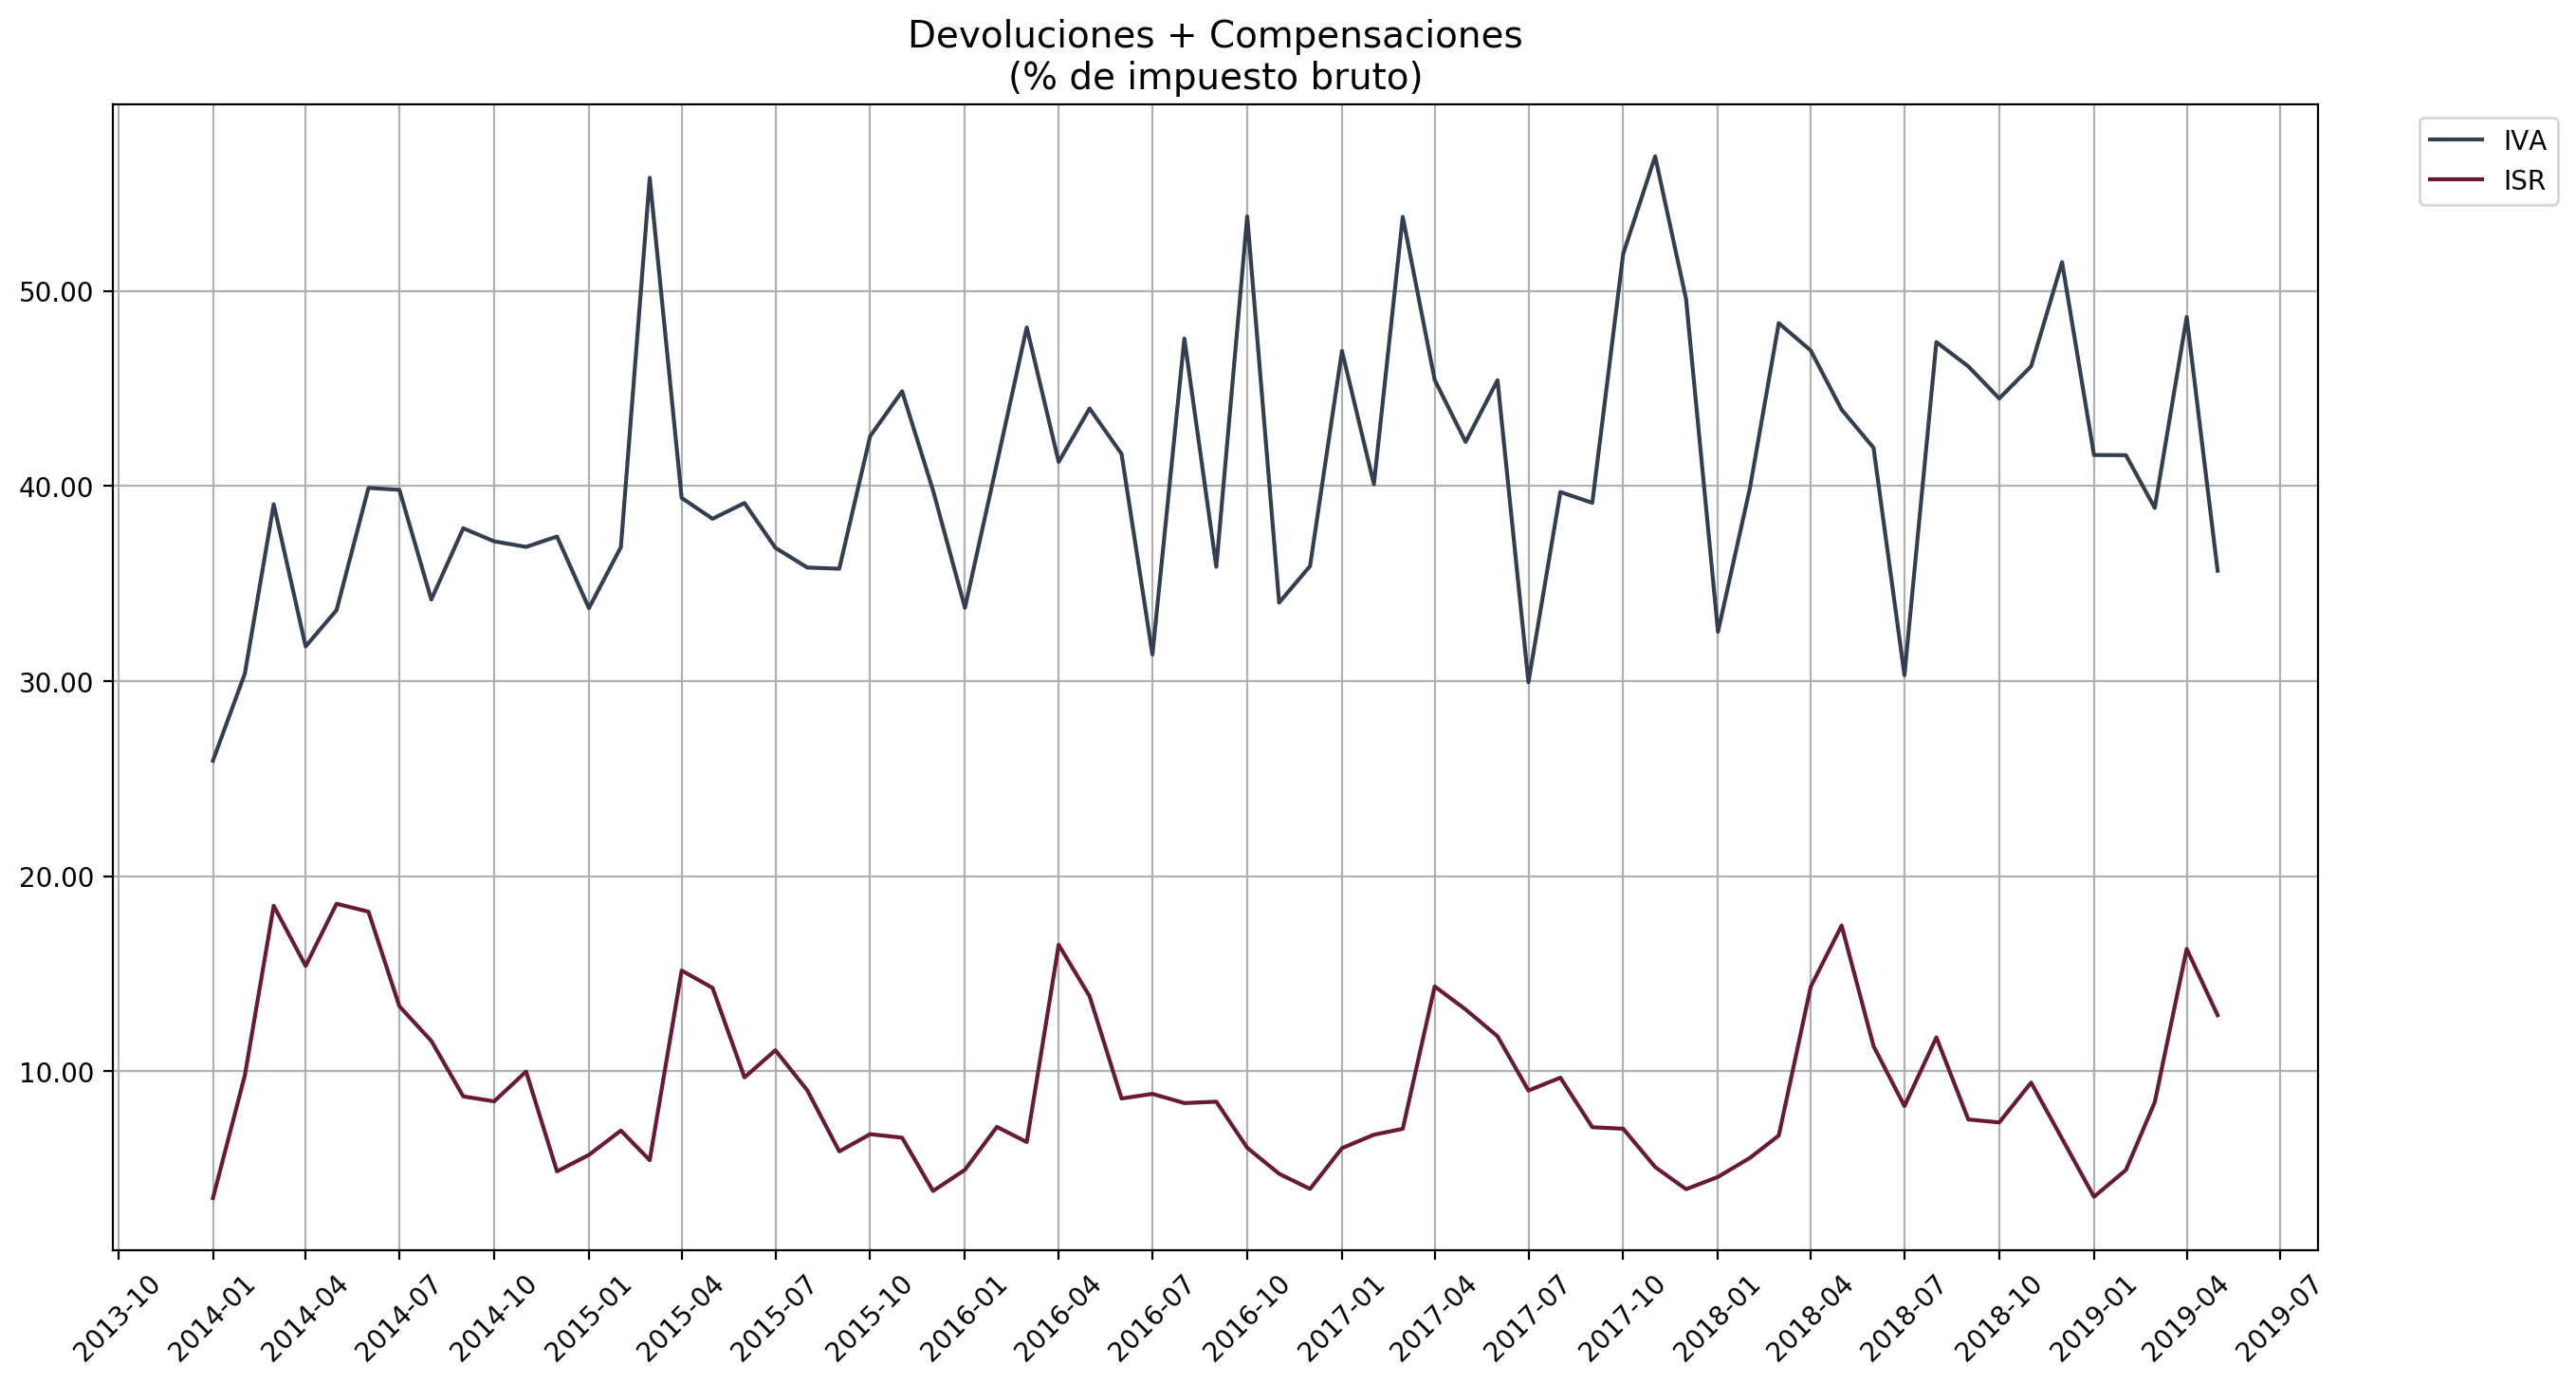

In [16]:
descriptive.plot_series(df = ingresos_sat,
                        cols = ['iva_dev_comp_%bruto', 'isr_dev_comp_%bruto'],
                        legend= ['IVA', 'ISR'],
                        title='Devoluciones + Compensaciones',
                        subtitle='(% de impuesto bruto)',ticks='quarterly',
                        legend_out=True)

In [17]:
display(
descriptive.cross_tab(df = ingresos_sat, 
                      cols = ['iva_dev_%bruto', 'iva_comp_%bruto', 'iva_dev_comp_%bruto'],
                      years=[2018, 2019], ratios=True,
                      cols_for_tot=[['iva_dev_(mdp)_r','iva_bruto_(mdp)_r'],
                                    ['iva_comp_(mdp)_r','iva_bruto_(mdp)_r'],
                                    ['iva_dev_comp_(mdp)_r','iva_bruto_(mdp)_r']],
                      for_plot=False, absolute_change=True))

descriptive.cross_tab(df = ingresos_sat,
                      cols = ['isr_dev_%bruto', 'isr_comp_%bruto', 'isr_dev_comp_%bruto'],
                      years=[2018, 2019], ratios=True,
                      cols_for_tot=[['isr_dev_(mdp)_r','isr_bruto_(mdp)_r'],
                                    ['isr_comp_(mdp)_r','isr_bruto_(mdp)_r'],
                                    ['isr_dev_comp_(mdp)_r','isr_bruto_(mdp)_r']],
                      for_plot=False, absolute_change=True)

Devoluciones y compensaciones como porcentaje de los ingresos brutos por impuesto disminuyeron de 44 a 36% para el IVA y de 17 a 13% para el ISR comparando Mayo 2018 con Mayo 2019. Para lo que va del año, disminuyeron de 42% a 42.23% en IVA, y de 9.96% a 9.74% en ISR. 

# Eficiencia recaudatoria

Para analizar la eficiencia recaudatoria el primer paso es estimar el PIB para el segundo trimestre de 2019. Así podremos obtener un aproximado de eficiencia recaudatoria para Abri y para Mayo. El PIB se aproxima usando el IGAE
   - Usamos el crecimiento del IGAE de Abril 2018 a Abril 2019 para estimar el crecimiento del PIB del segundo trimestre de 2018 al segundo trimestre del 2019. 
   - Calculamos la desviación estándar del crecimiento del IGAE. Hacemos 4 escenarios de crecimiento adicionales: +/- 1 desviación estandar y +/- 0.5 desviaciones estándar

In [18]:
# Creamos cambio porcentual del igae y cambio porcentual del PIB
igae_pct_change = igae.pct_change(12)
# Para obtener el cambio porcentual obtengo el pibr_2019, solo los valores que no son NA (Porque si no, los
# toma como cero) Eso es lo que hago al hacer "pib_r_df.loc[pib_r_df.notna().all(1), 'pibr_2019']"
pib_r_pct_change = pib_r_df.loc[pib_r_df.notna().all(1), 'pibr_2019'].pct_change(12)

In [19]:
# Usamos .tail para ver últimos 5 datos. Se ven diferentes porque uno es un DataFrame y el otro es una Serie, 
# aunque el DataFrame solo es de una columna, así que prácticamente son lo mismo. Más adelante vamos a convertirlo
# todo en DataFrame
display(igae_pct_change.tail())
display(pib_r_pct_change.tail())

igae
fecha               
2018-12-01  0.000241
2019-01-01  0.011959
2019-02-01  0.010638
2019-03-01  0.012942
2019-04-01 -0.014146

fecha
2018-11-01    0.016890
2018-12-01    0.016890
2019-01-01    0.012463
2019-02-01    0.012463
2019-03-01    0.012463
Freq: MS, Name: pibr_2019, dtype: float64

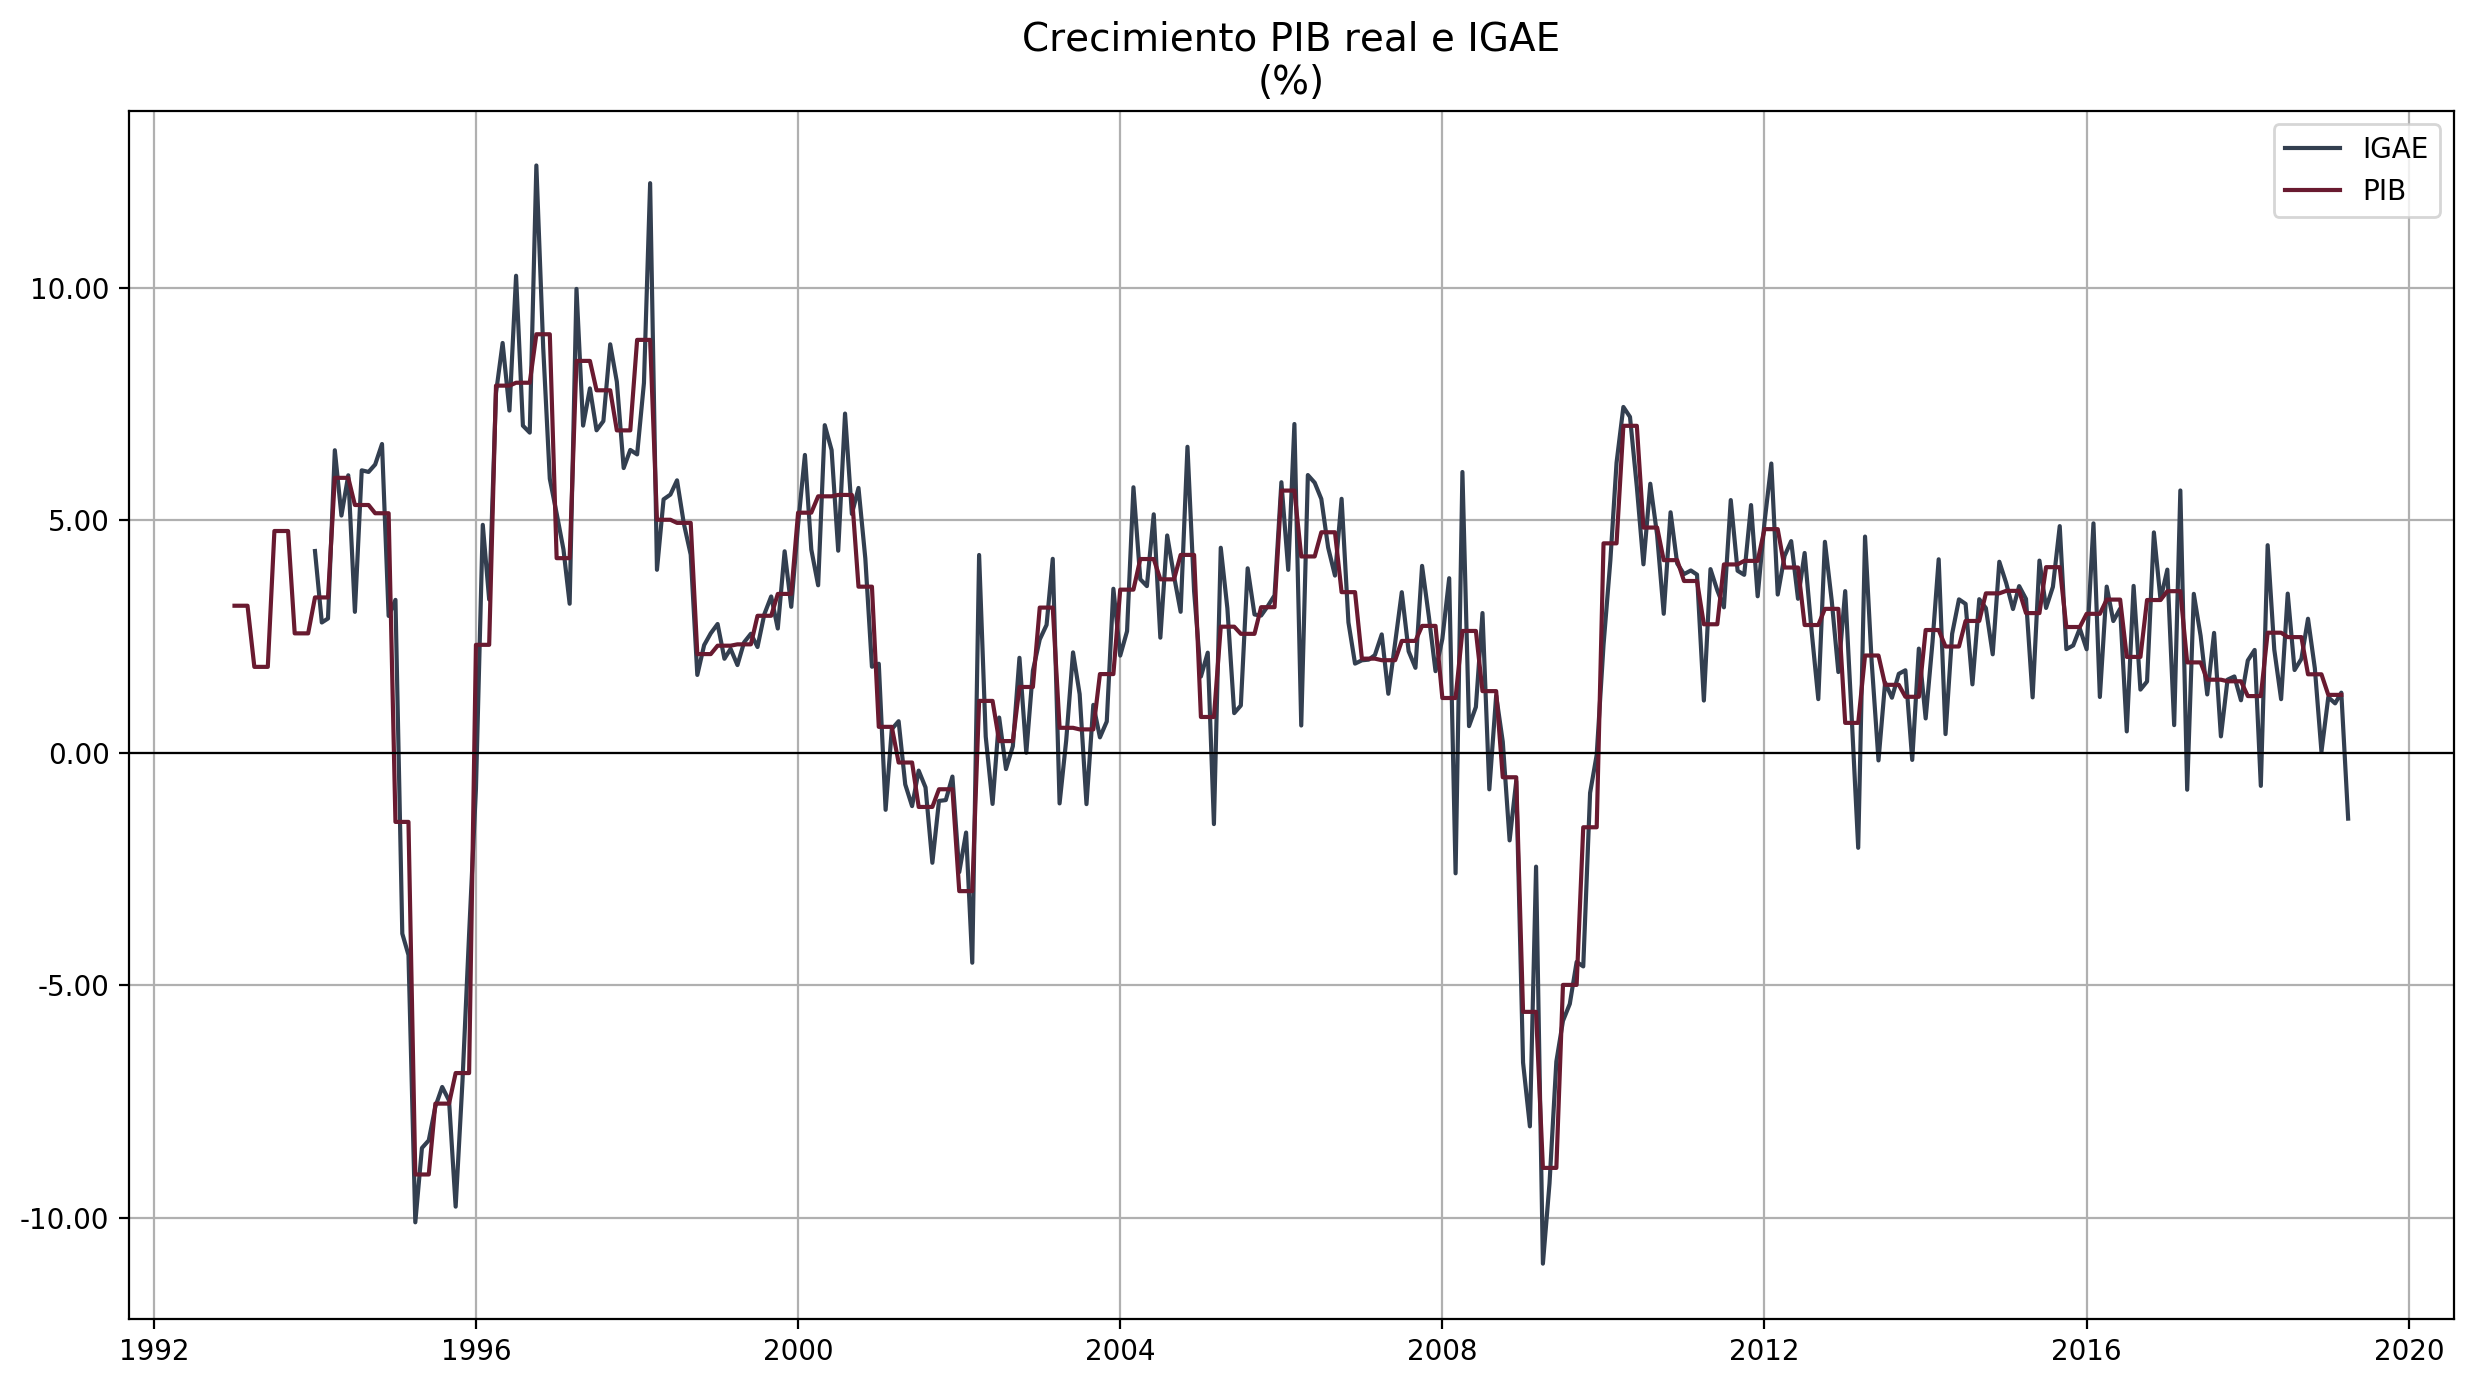

In [20]:
# Pasamos el cambio porcentual a valores porcentuales
igae_pct_change_plot = igae_pct_change * 100
# Juntamos ambos cambios porcentuales en un DF para graficarlos. El  merge es 'left' porque quiero incluir todo
# lo que esté en igae_pct_change aunque no esté en pib_r_pct_change. Al decir left_index = True y right_index=True
# digo que el merge se hará sobre los índices.
igae_pct_change_plot = igae_pct_change_plot.merge(pib_r_pct_change * 100, left_index=True,
                                                  right_index=True, how='left')
# Graficamos
descriptive.plot_series(igae_pct_change_plot, title='Crecimiento PIB real e IGAE',
                        subtitle='(%)', legend=['IGAE', 'PIB'],
                        hline=0)

In [21]:
# Creamos una lista en la que pondremos los nombres de las predicciones
prediction_names_l = ['pibr_2019']
# Obtenemos el último crecimiento porcentual haciendo .iloc[-1]. Lo convertimos a float porque queremos solo el
# número.
last_growth_igae = float(igae_pct_change.iloc[-1])
# Creamos un nuevo DataFrame sobre el cual pondremos las predicciones. SOlo usamos los valores después de 2014.
# Indico .copy() para que Pandas sepa que yo sé que estoy haciendo una copia y no me advierta al hacer
# modicaciones en la nueva DF.
pib_r_df_predict = pib_r_df.loc[pib_r_df.index >= '2014-01-01'].copy()
# Creamos el nombre de la variable que vamos a usar:
prediction_name = 'pib_r_2019_{0:.2f}%'.format(last_growth_igae * 100)
# Ampliamos lista con los nombres de las predicciones, esto lo usaremos mas adelante.
prediction_names_l.append(prediction_name)
# Vamos a crear una lista con los valores de crecimiento, lo usaremos mas adelante:
growth_rates = [last_growth_igae * 100]
# Creamos una nueva columna identica al pibr_2019 con el nombre 'pib_r_2019_igae'
pib_r_df_predict[prediction_name] = pib_r_df_predict['pibr_2019']
# Ampliamos el DataFrame para que incluya abril y mayo de 2019. 'MS' indica Month Start, que son las fechas
# que estamos usando.
pib_r_df_predict = pib_r_df_predict.reindex(pd.date_range('2014-01-01', '2019-05-01', freq='MS'))
# Obtengo el valor del pib que usaremos para predecir, que es el del segundo trimestre de 2018
prediction_pib_base = pib_r_df_predict.loc['2018-04-01', prediction_name]
# Asignamos el valor de la nueva variable para los meses de abril y mayo como la multiplicación de la
# valor base de la predicción * (1 + la tasa de crecimiento). Los convierto a float porque actualmente
# son Pandas Series de 1 observacion, y los necesitamos como numeros.
pib_r_df_predict.loc[pd.date_range('2019-04-01', '2019-05-01', freq='MS'), prediction_name] = \
    float(prediction_pib_base) * (1 + last_growth_igae)

In [22]:
# Veamos los valores predichos
pib_r_df_predict.tail()

pibr_2013     pibr_2019  pib_r_2019_-1.41%
2019-01-01  1.823610e+07  2.247303e+07       2.247303e+07
2019-02-01  1.823610e+07  2.247303e+07       2.247303e+07
2019-03-01  1.823610e+07  2.247303e+07       2.247303e+07
2019-04-01           NaN           NaN       2.262548e+07
2019-05-01           NaN           NaN       2.262548e+07

In [23]:
# Confirmemos que la tasa de crecimiento es la misma que la última tasa de crecimiento de IGAE.
# No hacer caso a la tasa de crecimiento que muestra para las variables sin predicción. 
display(pib_r_df_predict[prediction_name].pct_change(12).tail())
display(last_growth_igae)

2019-01-01    0.012463
2019-02-01    0.012463
2019-03-01    0.012463
2019-04-01   -0.014146
2019-05-01   -0.014146
Freq: MS, Name: pib_r_2019_-1.41%, dtype: float64

-0.01414649335378848

In [24]:
# Añadiremos cuatro predicciones adicionales usando la desviación estándar del crecimiento del IGAE desde 2014
# = 0.015. Incluiremos cuatro predicciones usando crecimientos del IGAE de +/- 0.5std y +/- 1std
igae_pct_change.loc[igae_pct_change.index >= '2014-01-01'].describe()

igae
count  64.000000
mean    0.023552
std     0.014629
min    -0.014146
25%     0.012846
50%     0.023453
75%     0.033367
max     0.056421

In [25]:
# Guardamos la deviación estándard en una variable
igae_growth_std = float(igae_pct_change.loc[igae_pct_change.index >= '2014-01-01'].std())

In [26]:
# repetimos el procedimiento anterior para cada uno de los valores que multiplicarán la desviación estándar.
# Obtenemos el valor del pib que usaremos para predecir, que es el del segundo trimestre de 2018
# este paso lo podemos hacer afuera del loop porque es el mismo para todos los malores
# Vamos a crear una lista con los nombres de las predicciones, esto lo usaremos mas adelante.
prediction_pib_base = pib_r_df_predict.loc['2018-04-01', 'pibr_2019']
for val in [-1, -0.5, 0.5, 1]:
    # Obtenemos último crecimiento
    last_growth_igae = float(igae_pct_change.iloc[-1])
    # Modificamos último crecimiento sumando la multiplicación entre el valor del loop y la desviación estándar
    growth_to_use = last_growth_igae + (val* igae_growth_std)
    # Ampliamos la lista de las tasas de crecimiento
    growth_rates.append(growth_to_use * 100)
    #Creamos el nombre de la variable que vamos a usar. Cuando escribes un string '{}'.format(x), la x 
    # se colocará en lugar de los corchetes. {0:.3f} indica que la x será un numero y que queremos ver
    # solo 2 decimales.
    prediction_name = 'pib_r_2019_{0:.2f}%'.format(growth_to_use * 100)
    # Ampliamos la lista de las predicciones con el nuevo nombre.
    prediction_names_l.append(prediction_name)
    # Creamos una nueva columna identica al pibr_2019 con el nombre 'pib_r_2019_igae'
    pib_r_df_predict[prediction_name] = pib_r_df_predict['pibr_2019']
    # Asignamos el valor de la nueva variable para los meses de abril y mayo como la multiplicación de la
    # valor base de la predicción * (1 + la tasa de crecimiento). Los convierto a float porque actualmente
    # son Pandas Series de 1 observacion, y los necesitamos como numeros.
    pib_r_df_predict.loc[pd.date_range('2019-04-01', '2019-05-01', freq='MS'), prediction_name] = \
        float(prediction_pib_base) * (1 + growth_to_use)

In [27]:
pib_r_df_predict.tail(5)

pibr_2013     pibr_2019  pib_r_2019_-1.41%  pib_r_2019_-2.88%  \
2019-01-01  1.823610e+07  2.247303e+07       2.247303e+07       2.247303e+07   
2019-02-01  1.823610e+07  2.247303e+07       2.247303e+07       2.247303e+07   
2019-03-01  1.823610e+07  2.247303e+07       2.247303e+07       2.247303e+07   
2019-04-01           NaN           NaN       2.262548e+07       2.228975e+07   
2019-05-01           NaN           NaN       2.262548e+07       2.228975e+07   

            pib_r_2019_-2.15%  pib_r_2019_-0.68%  pib_r_2019_0.05%  
2019-01-01       2.247303e+07       2.247303e+07      2.247303e+07  
2019-02-01       2.247303e+07       2.247303e+07      2.247303e+07  
2019-03-01       2.247303e+07       2.247303e+07      2.247303e+07  
2019-04-01       2.245762e+07       2.279334e+07      2.296121e+07  
2019-05-01       2.245762e+07       2.279334e+07      2.296121e+07

## Calculamos valores porcentuales

In [28]:
# Para calcular la eviciencia tributaria, tenemos que hacer un loop sobre cada uno de los impuestos y sobre cada
# una de las predicciones. Para ello, creamos una lista de los impuestos que usaremos, y usaremos la lista que 
# creamos que tiene los nombres de las predicciones. También crearemos un nuevo DataFrame con los valores de
# eficiencia.
eficiencia_df = pd.DataFrame(index=ingresos_sat.index)
impuestos_a_usar = ['iva_bruto_(mdp)_r', 'iva_neto_(mdp)_r', 'isr_bruto_(mdp)_r', 'isr_neto_(mdp)_r']
# Ampliamos la lista de prediction_names_l para que incluya el pib original. Esto serirá para graficar
for tax in impuestos_a_usar:
    for prediction_name in prediction_names_l:
        # Obtenemos el impuesto que usaremos como denominador
        impuesto = ingresos_sat[tax]
        # Obtenemos la predicción que usaremos como denominador
        prediction_pib = pib_r_df_predict[prediction_name]
        # Creamos el nombre de la variable que crearemos. Será por ejemplo: 'iva_bruto_%PIB_-1.4%'
        # Para eso, eliminamos la ultima parte del nombre del impuesto, eliminamos la primera parte del
        # nombre de la predicción, y los juntamos con %PIB en medio
        nombre_variable_ef = tax.replace('(mdp)_r', '') + '%PIB_' + prediction_name.replace('pib_r_2019_', '')
        eficiencia_df[nombre_variable_ef] = (impuesto / prediction_pib) * 100

In [29]:
#Veamos los valores de eficiencia 
eficiencia_df.tail()

iva_bruto_%PIB_pibr_2019  iva_bruto_%PIB_-1.41%  \
fecha                                                         
2019-01-01                  0.701064               0.701064   
2019-02-01                  0.580849               0.580849   
2019-03-01                  0.573134               0.573134   
2019-04-01                       NaN               0.584905   
2019-05-01                       NaN               0.617440   

            iva_bruto_%PIB_-2.88%  iva_bruto_%PIB_-2.15%  \
fecha                                                      
2019-01-01               0.701064               0.701064   
2019-02-01               0.580849               0.580849   
2019-03-01               0.573134               0.573134   
2019-04-01               0.593715               0.589277   
2019-05-01               0.626740               0.622056   

            iva_bruto_%PIB_-0.68%  iva_bruto_%PIB_0.05%  \
fecha                                                     
2019-01-01               0.701064              0.701064   
2019-02-01               0.580849              0.580849   
2019-03-01               0.573134              0.573134   
2019-04-01               0.580598              0.576353   
2019-05-01               0.612893              0.608412   

            iva_neto_%PIB_pibr_2019  iva_neto_%PIB_-1.41%  \
fecha                                                       
2019-01-01                 0.403915              0.403915   
2019-02-01                 0.334320              0.334320   
2019-03-01                 0.345094              0.345094   
2019-04-01                      NaN              0.294372   
2019-05-01                      NaN              0.390275   

            iva_neto_%PIB_-2.88%  iva_neto_%PIB_-2.15%  iva_neto_%PIB_-0.68%  \
fecha                                                                          
2019-01-01              0.403915              0.403915              0.403915   
2019-02-01              0.334320              0.334320              0.334320   
2019-03-01              0.345094              0.345094              0.345094   
2019-04-01              0.298806              0.296572              0.292204   
2019-05-01              0.396153              0.393192              0.387401   

            iva_neto_%PIB_0.05%  isr_bruto_%PIB_pibr_2019  \
fecha                                                       
2019-01-01             0.403915                  0.823330   
2019-02-01             0.334320                  0.650203   
2019-03-01             0.345094                  0.781945   
2019-04-01             0.290068                       NaN   
2019-05-01             0.384569                       NaN   

            isr_bruto_%PIB_-1.41%  isr_bruto_%PIB_-2.88%  \
fecha                                                      
2019-01-01               0.823330               0.823330   
2019-02-01               0.650203               0.650203   
2019-03-01               0.781945               0.781945   
2019-04-01               1.104118               1.120748   
2019-05-01               0.630580               0.640078   

            isr_bruto_%PIB_-2.15%  isr_bruto_%PIB_-0.68%  \
fecha                                                      
2019-01-01               0.823330               0.823330   
2019-02-01               0.650203               0.650203   
2019-03-01               0.781945               0.781945   
2019-04-01               1.112371               1.095986   
2019-05-01               0.635293               0.625936   

            isr_bruto_%PIB_0.05%  isr_neto_%PIB_pibr_2019  \
fecha                                                       
2019-01-01              0.823330                 0.766659   
2019-02-01              0.650203                 0.600215   
2019-03-01              0.781945                 0.699040   
2019-04-01              1.087974                      NaN   
2019-05-01              0.621360                      NaN   

            isr_neto_%PIB_-1.41%  isr_neto_%PIB_

# Gráfica 1
### Eficiencia recaudartoria de IVA e ISR bruto

In [65]:
## Para graficar, necesitamos varias cosas:
## 1. Crear un nuevo DF que tenga NAN para todas las variables predichas hasta febrero 2019. Esto es para
## que la variable observada pueda llevar el color primario.
eficiencia_df_to_plot = eficiencia_df.copy()
base_vars = (['iva_bruto_%PIB_pibr_2019', 'iva_neto_%PIB_pibr_2019',
              'isr_bruto_%PIB_pibr_2019', 'isr_neto_%PIB_pibr_2019'])
# prediction_vars van a ser las variables en eficiencia_df que no están en base_vars. Esas serán las que se cambien
# por NAs
prediction_vars = [col for col in eficiencia_df.columns if col not in base_vars]

# Cambiando por NA's
eficiencia_df_to_plot.loc[pd.date_range('2014-01-01', '2019-02-01', freq='MS'), prediction_vars] = np.nan

## 2. Lista de las variables que vamos a graficar en cada gráfica.
## 3. Lista de los nombre que queremos que las variables lleven en la legenda.

#Vamos a usar la lista de tasas de crecimiento en orden ascendente
growth_rates = sorted(growth_rates)

# Vamos a crear un diccionario de graficas:
graph_vars_dict = {}

# Hacer un loop para cada una de las siguientes variables:
for tax in ['iva_bruto', 'iva_neto', 'isr_bruto', 'isr_neto']:
    # Para cada una de las variables, añadiremos al diccionario una lista con los diferentes nombres de las variables
    # de eficiencia. [tax + '_%PIB_{0:.2f}%'.format(g) for g in growth_rates] crea una lista que se verá así:
    # ['iva_bruto__%PIB_-2.88%', iva_bruto__%PIB_-2.15%...]
    # A esa lista le faltará la eficiencia sin predicciones, y por eso hacemos append después.
    graph_vars_dict[tax] = [tax + '_%PIB_pibr_2019']
    graph_vars_dict[tax] += [tax + '_%PIB_{0:.2f}%'.format(g) for g in growth_rates]


# Para los labels, seguiremos un procedimiento simiar
graph_labels = ['PIB Observado']
graph_labels += ['Predicción PIB: {0:.2f}%'.format(g) for g in growth_rates]


In [66]:
# graph_vars_dict

In [67]:
# graph_labels_dict

In [68]:
# Vamos a escribir el footnote de las gráficas
footnote = '''
Pronóstico del PIB igual al crecimiento anual del IGAE de Abril 2019 de {0:.2f}%
+/- 0.5 y 1 desviaciones estándar del crecimiento del IGAE de {1:.2f}%'''\
.format(last_growth_igae * 100, igae_growth_std * 100)

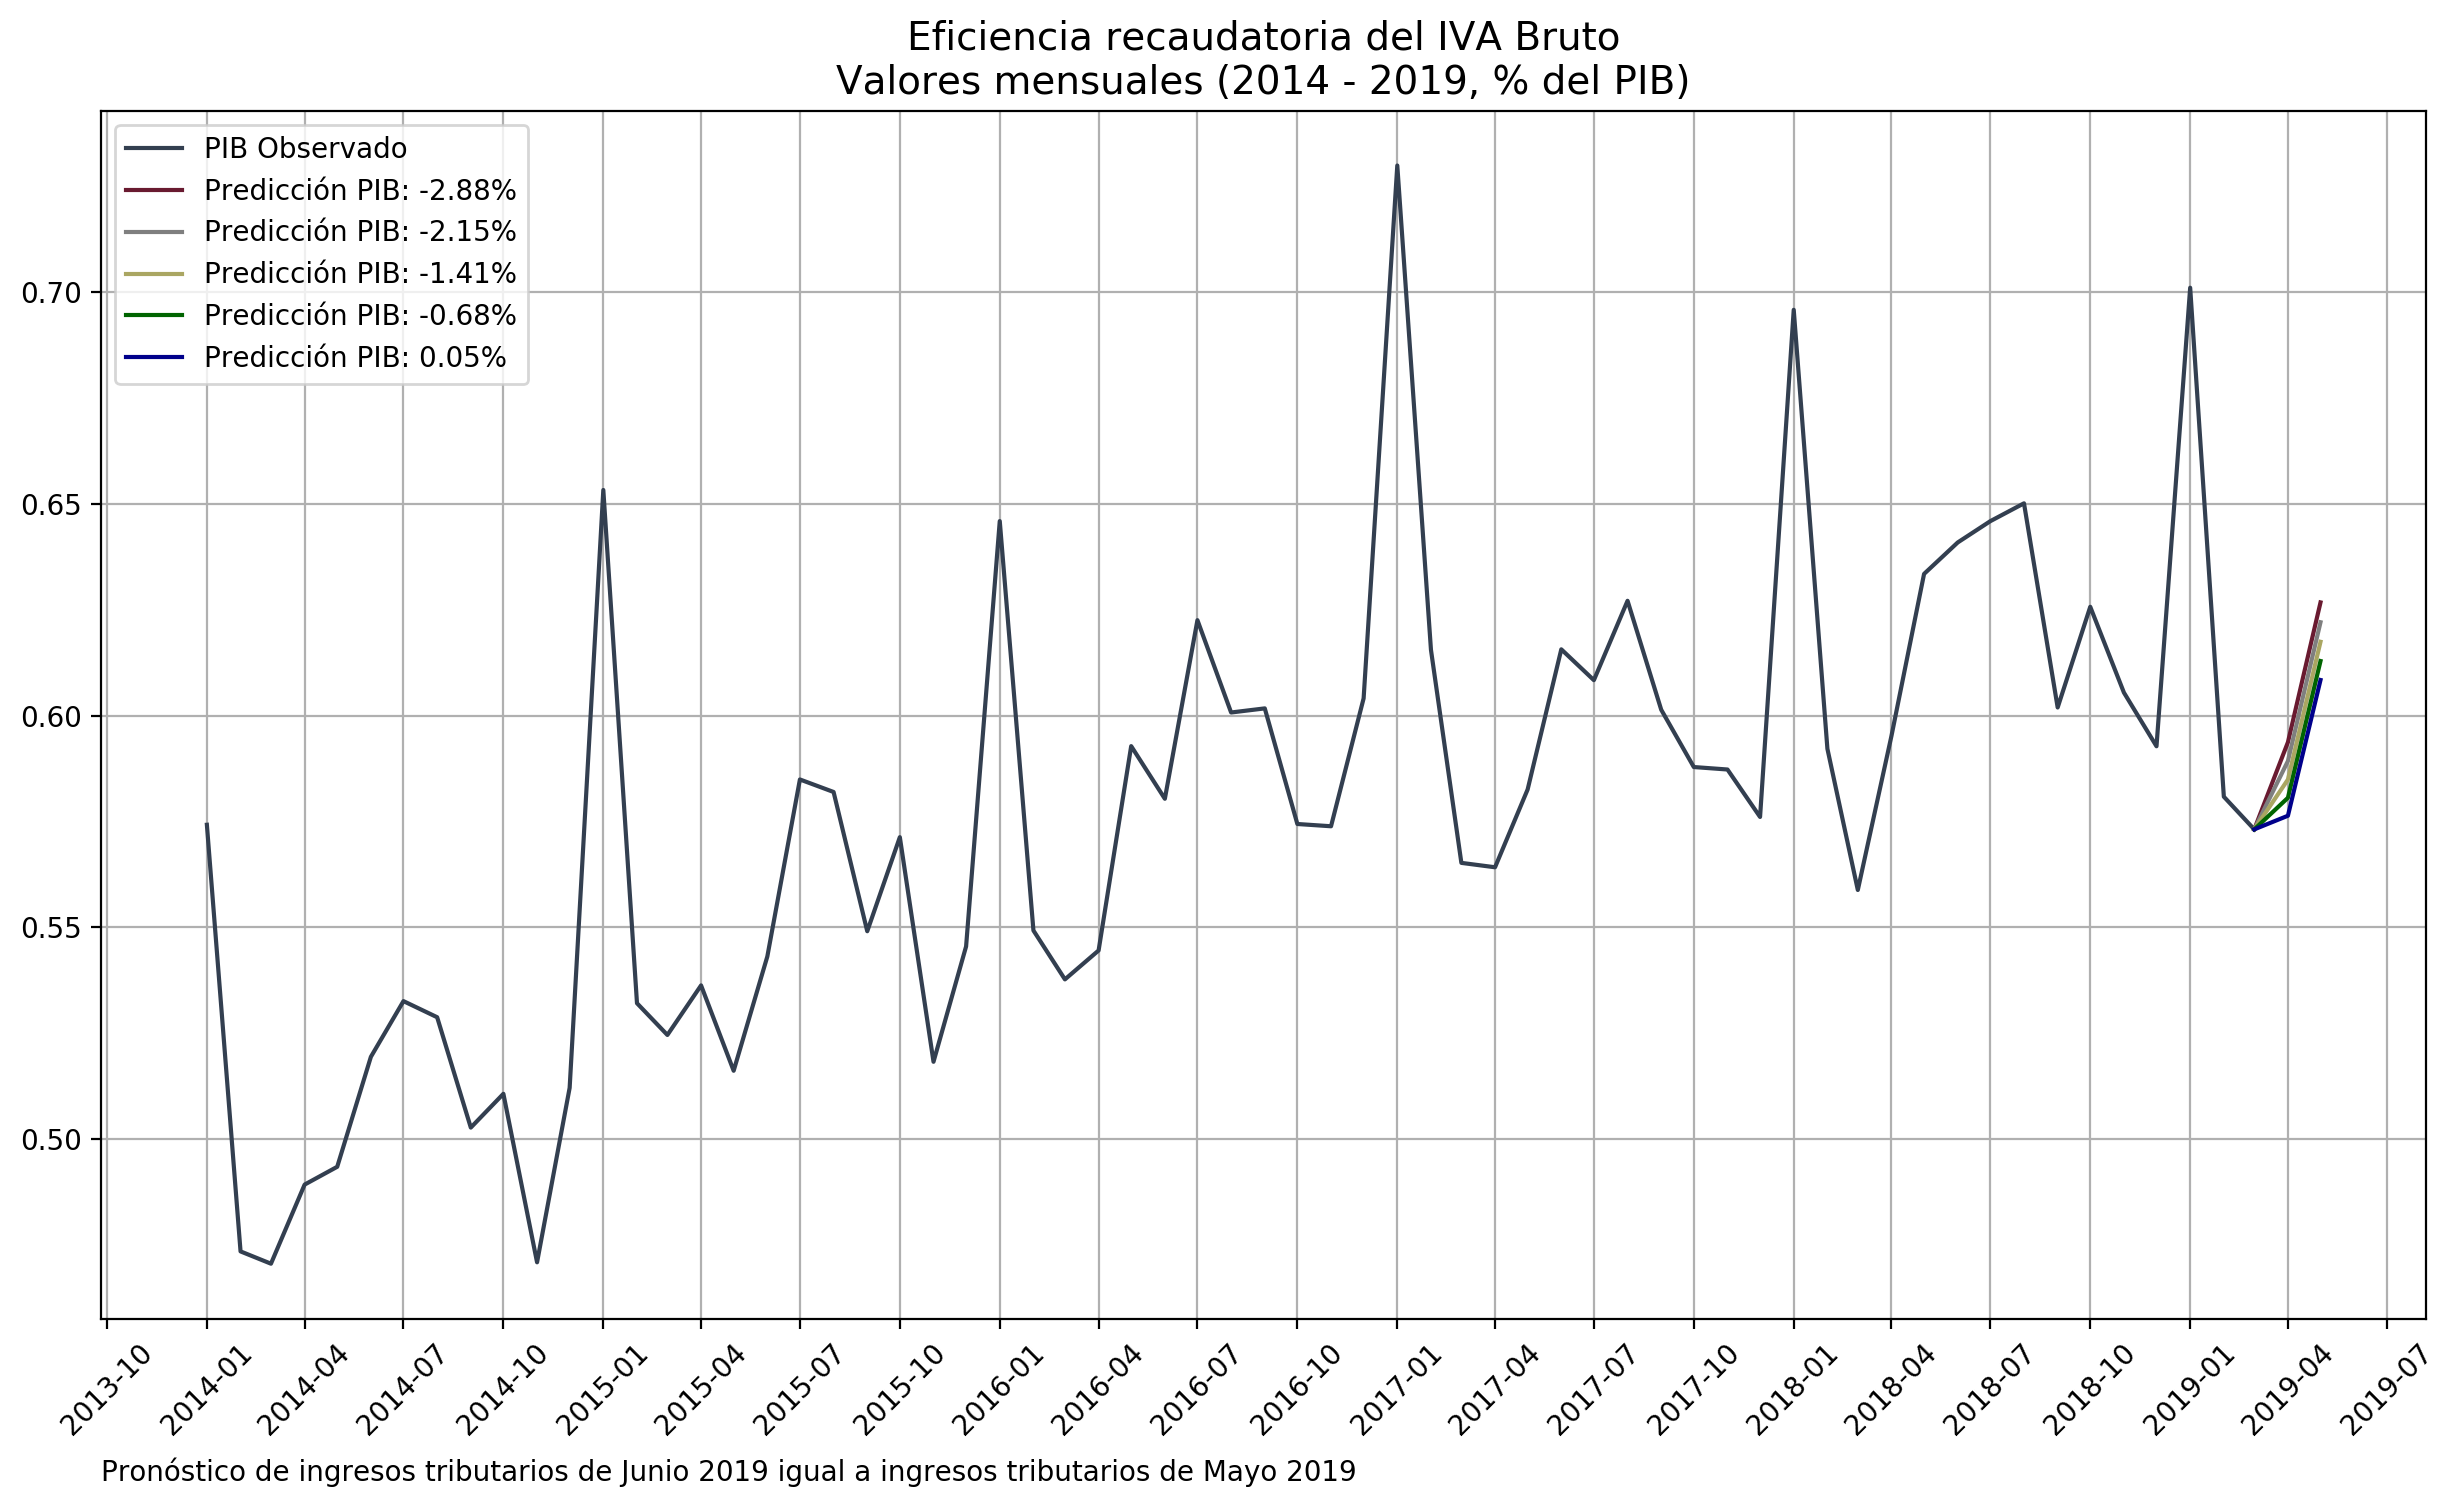

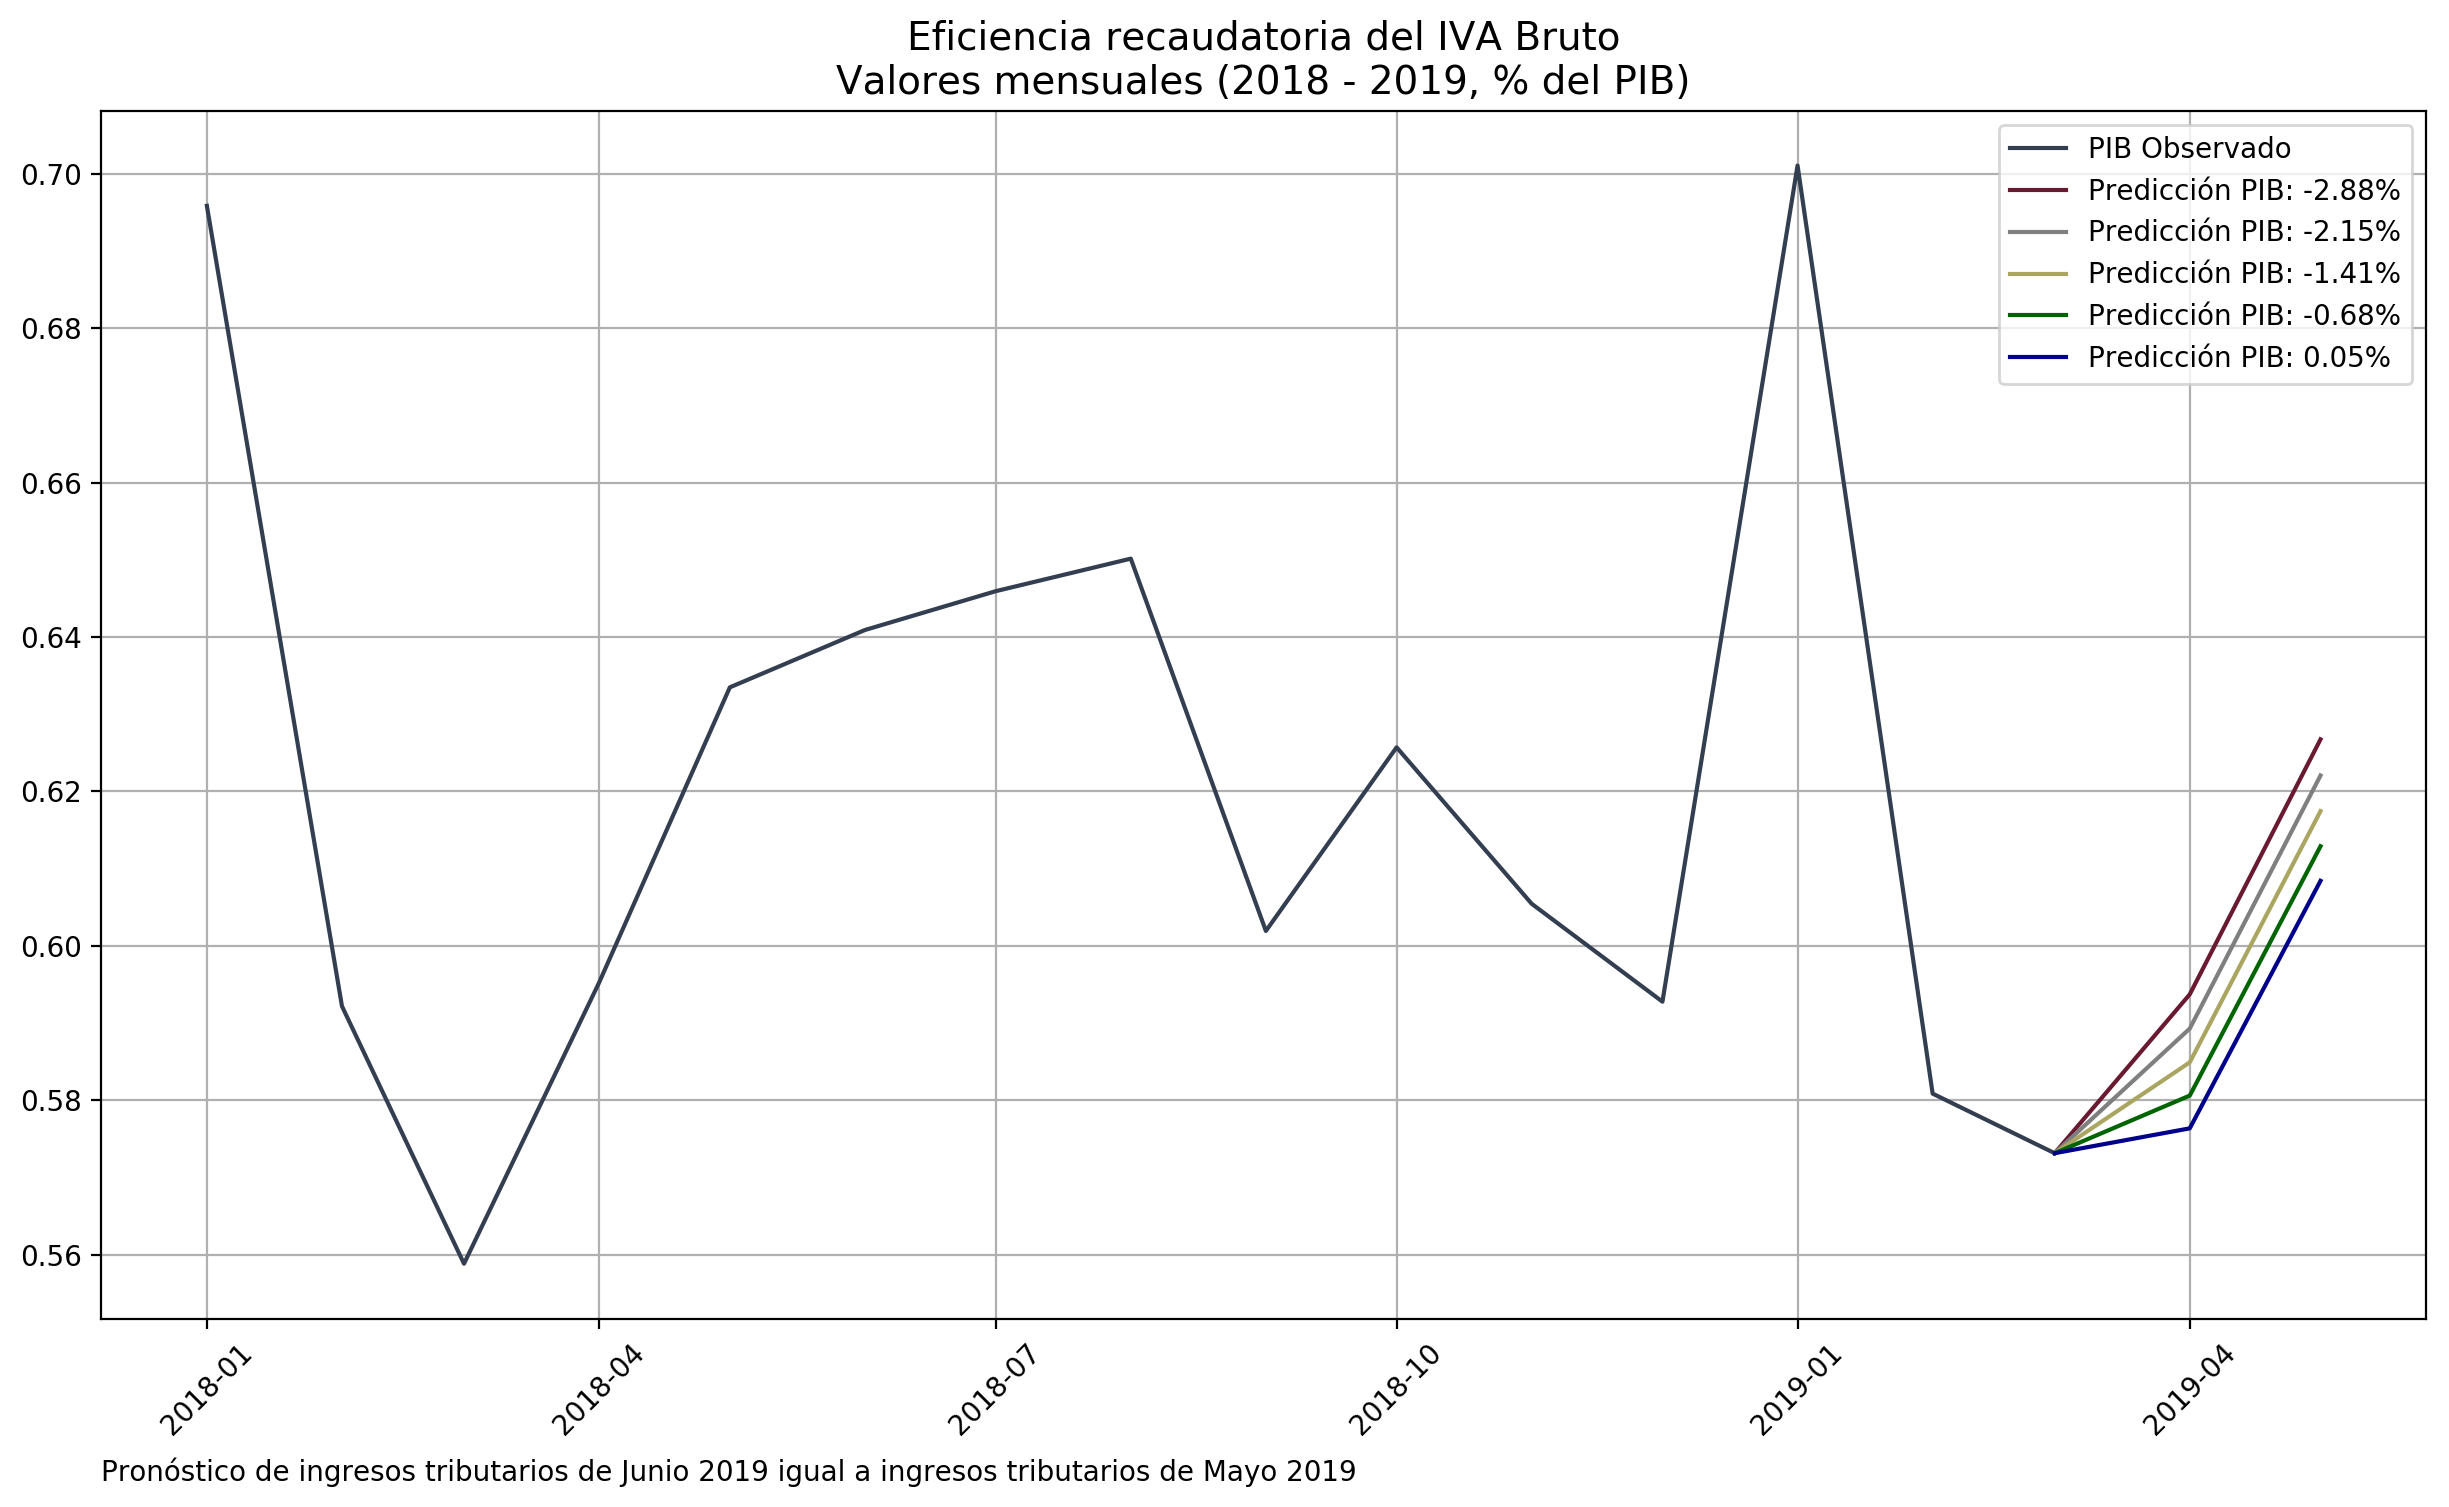

In [105]:
# Hacemos graficas para IVA
descriptive.plot_series(df=eficiencia_df_to_plot, 
                        cols=graph_vars_dict['iva_bruto'], 
                        legend=graph_labels,
                        title='Eficiencia recaudatoria del IVA Bruto',
                        subtitle='Valores mensuales (2014 - 2019, % del PIB)', ticks='quarterly', 
                        save_to='../figures/eficiencia_iva_bruto_mens_2014-01-01.png',
                        footnote=footnote)

descriptive.plot_series(df=eficiencia_df_to_plot, 
                        cols=graph_vars_dict['iva_bruto'], 
                        legend=graph_labels,
                        title='Eficiencia recaudatoria del IVA Bruto',
                        subtitle='Valores mensuales (2018 - 2019, % del PIB)', ticks='quarterly',
                        min_date='2018-01-01',
#                         save_to='../figures/eficiencia_iva_bruto_mens_2014-01-01.png',
                        footnote=footnote)

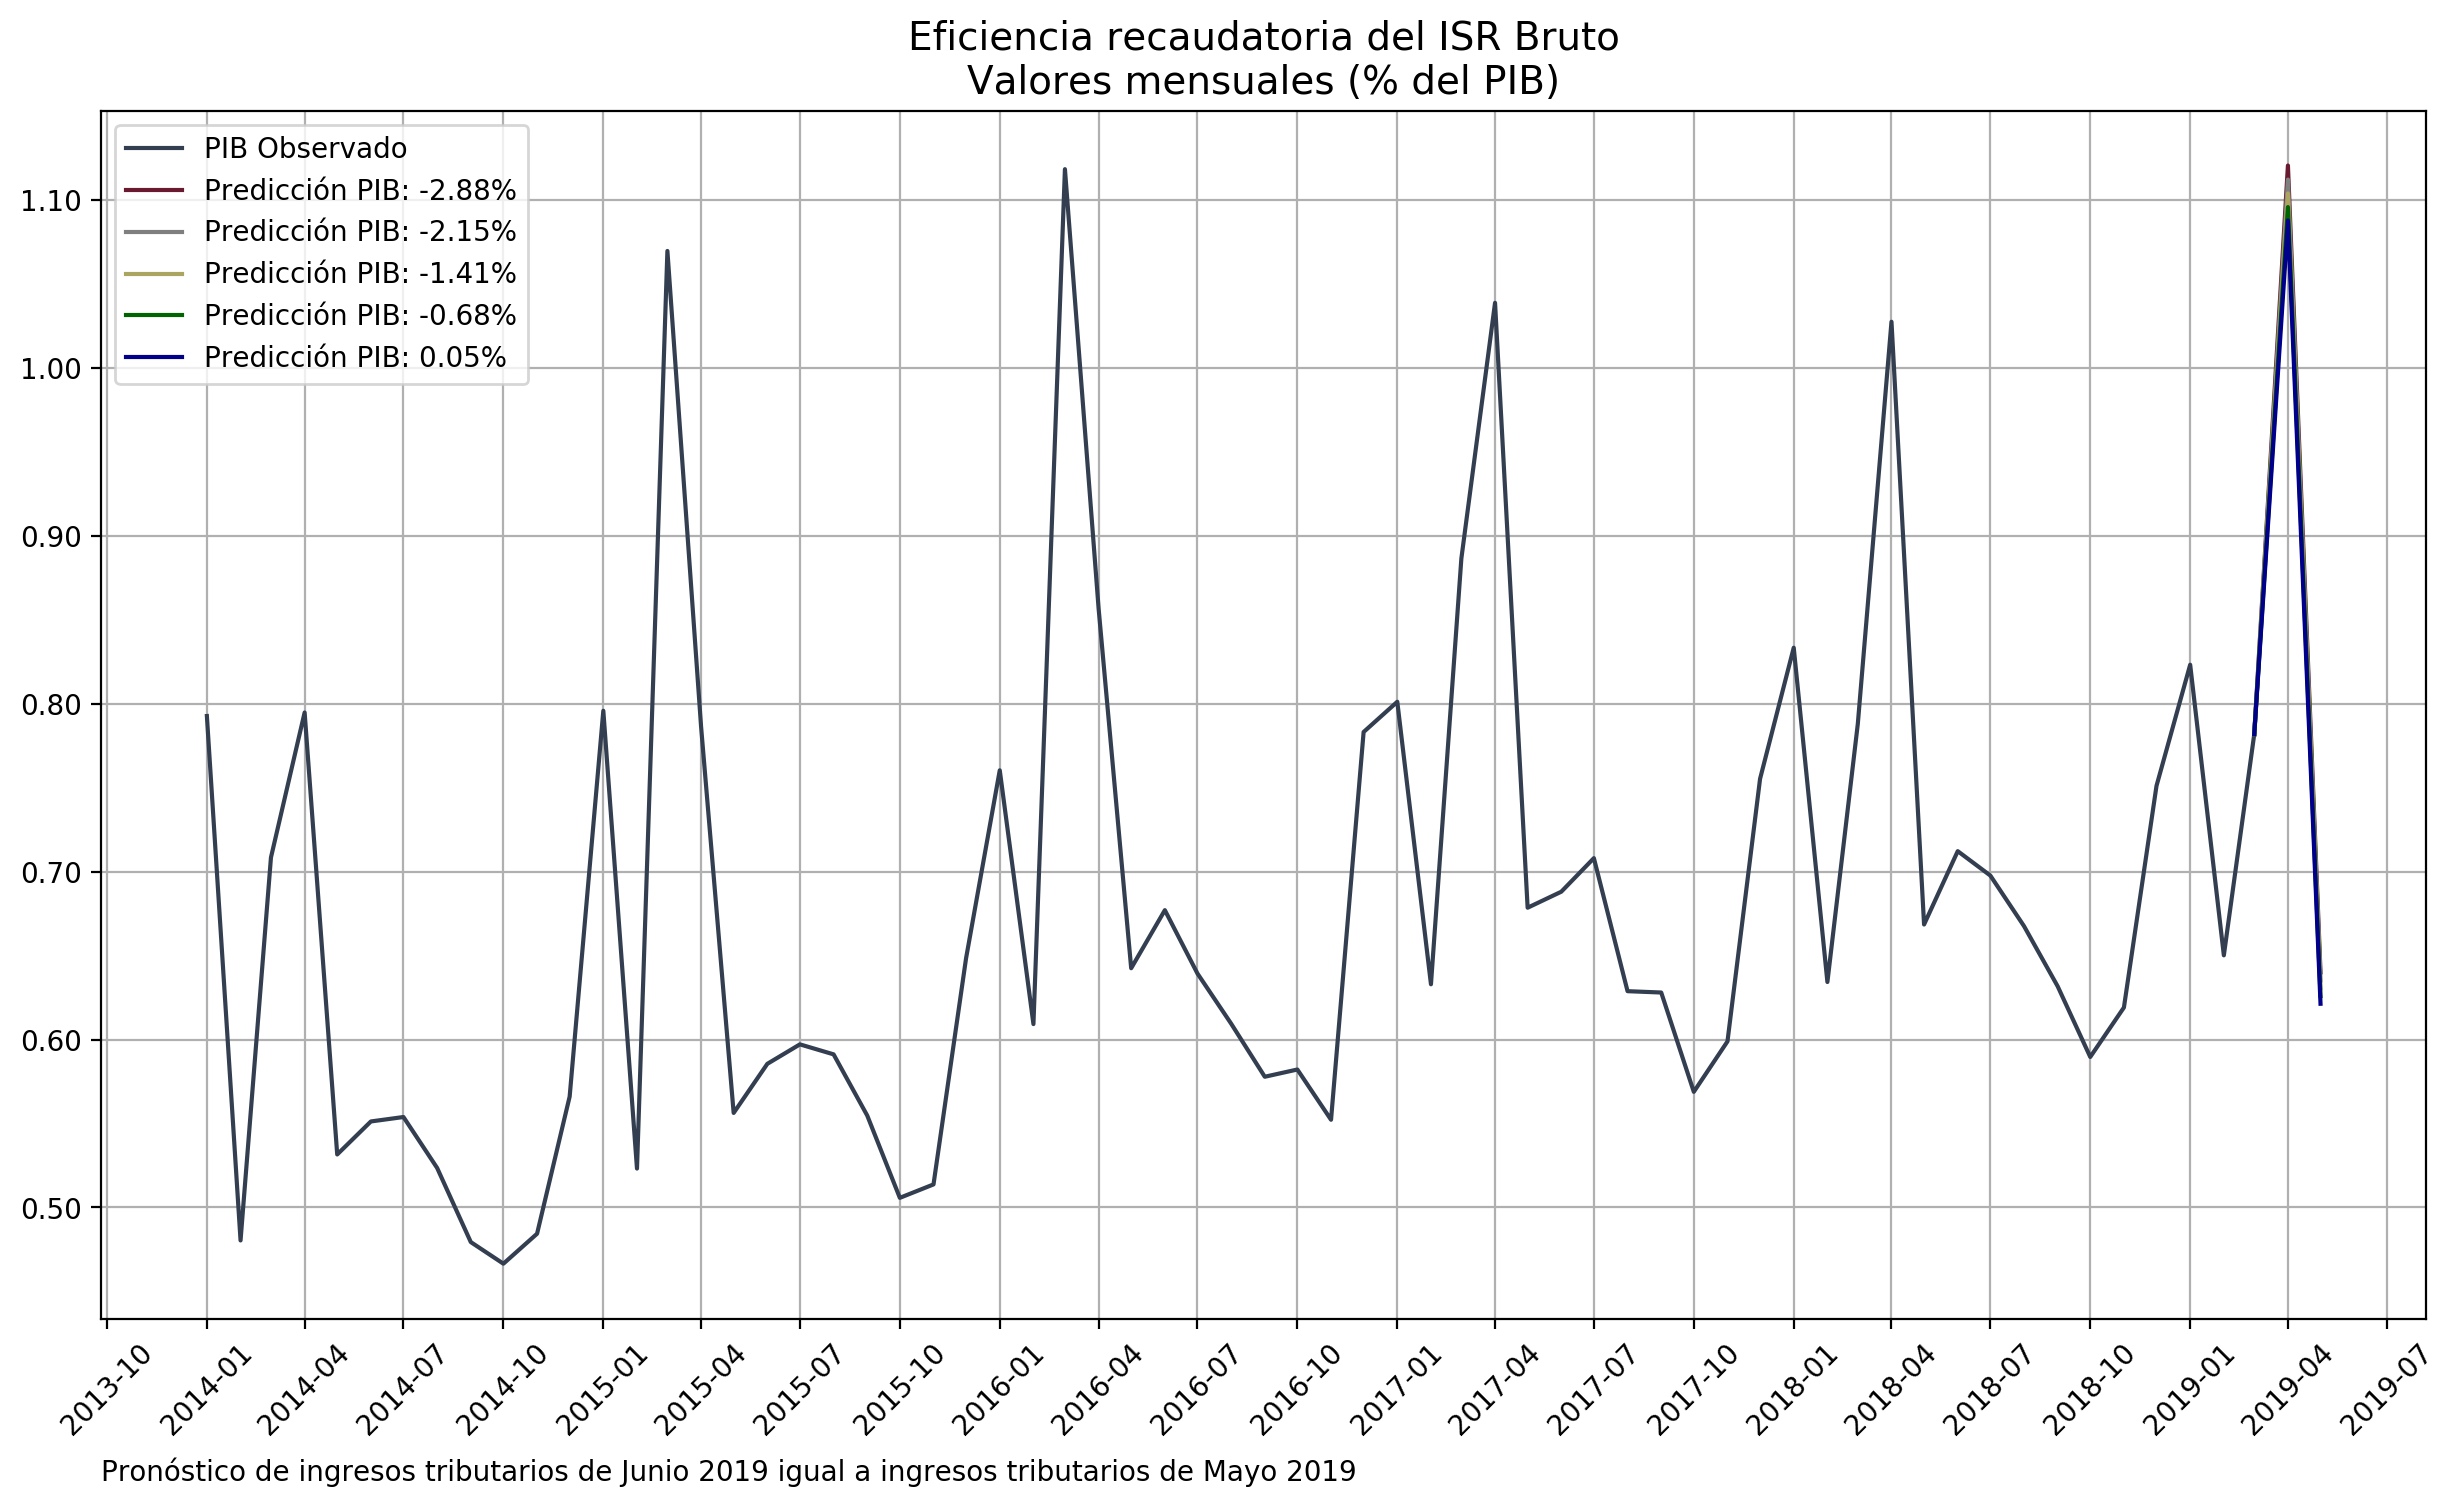

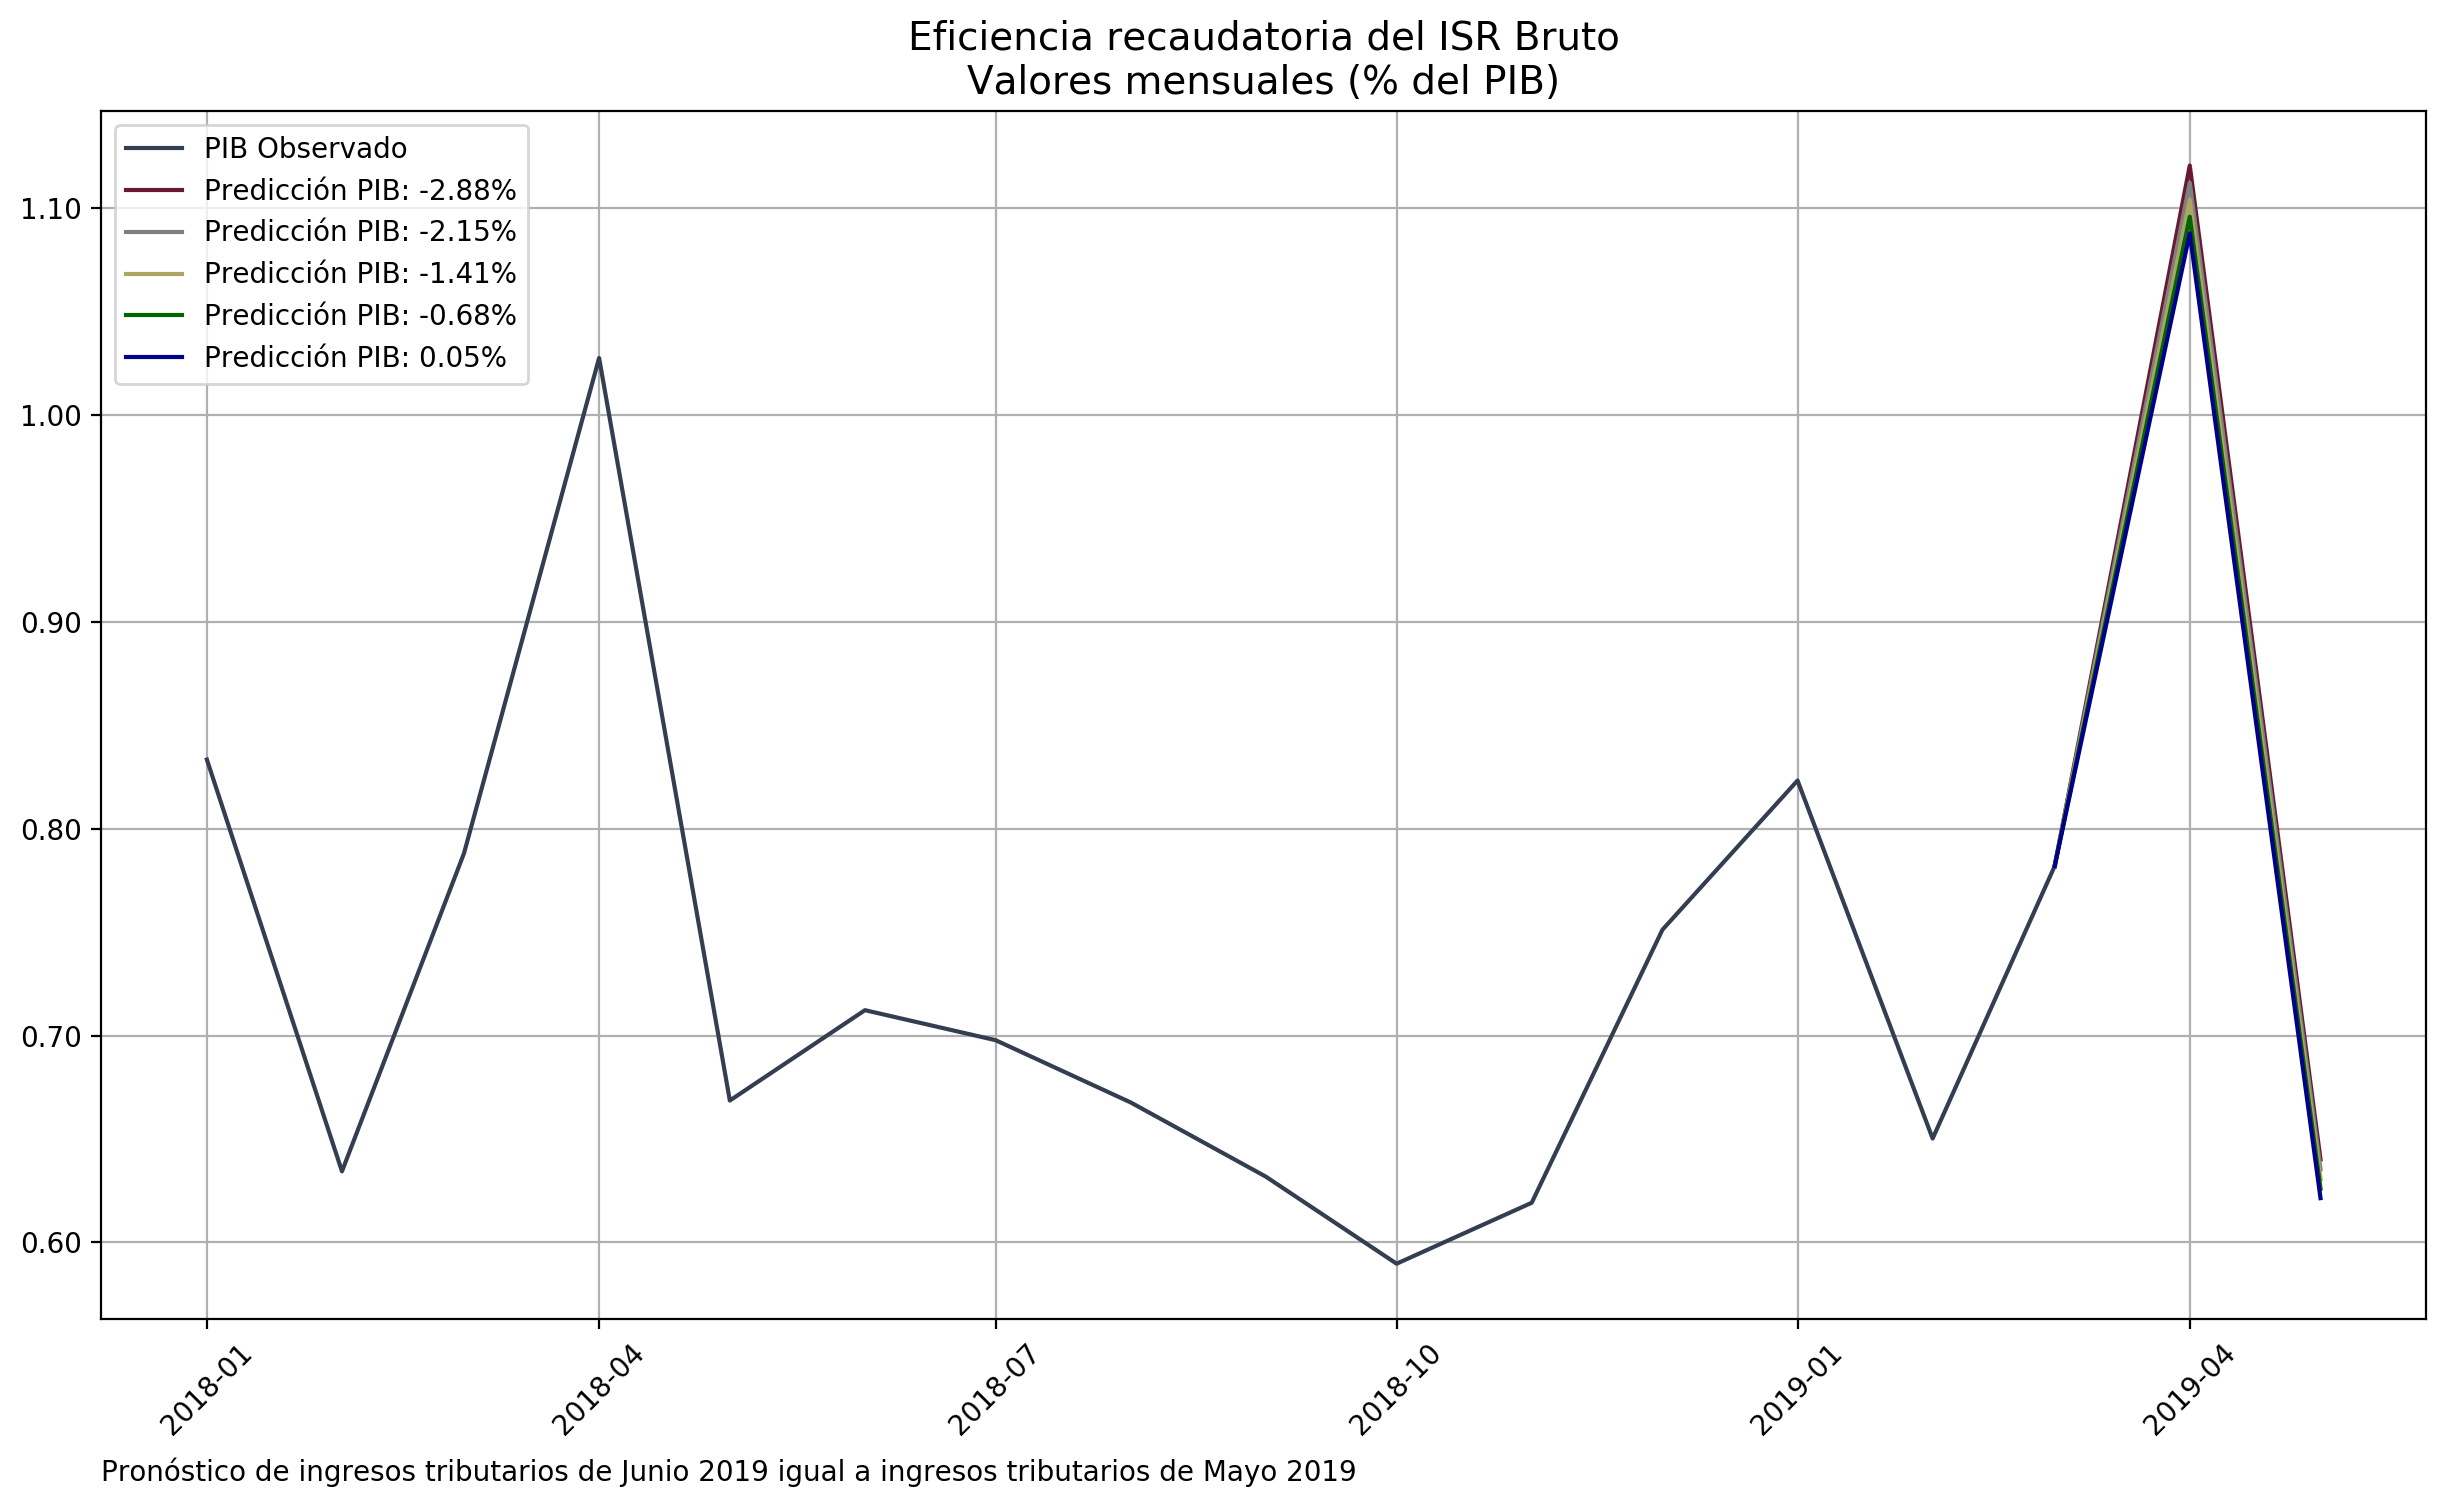

In [101]:
# HAcemos graficas para ISR

descriptive.plot_series(df=eficiencia_df_to_plot, 
                        cols=graph_vars_dict['isr_bruto'], 
                        legend=graph_labels,
                        title='Eficiencia recaudatoria del ISR Bruto',
                        subtitle='Valores mensuales (% del PIB)', ticks='quarterly',
                        save_to='../figures/eficiencia_isr_bruto_mens_2014-01-01.png',
                        footnote=footnote)
descriptive.plot_series(df=eficiencia_df_to_plot, 
                        cols=graph_vars_dict['isr_bruto'], 
                        legend=graph_labels,
                        title='Eficiencia recaudatoria del ISR Bruto',
                        subtitle='Valores mensuales (% del PIB)', ticks='quarterly',
                        min_date='2018-01-01',
#                         save_to='../figures/eficiencia_isr_bruto_mens_2014-01-01.png',
                        footnote=footnote)

# Grafica 2
### Cambio en eficiencia recaudatoria IVA e ISR brutos

In [71]:
# Calculamos diferencias en eficiencia
cambio_eficiencia_df = eficiencia_df.diff(12)

In [72]:
# De nuevo, creamos un DF especifico para plot
cambio_eficiencia_df_to_plot = cambio_eficiencia_df.copy()
# Reemplazamos por NaN las variables que estan en la lista prediction vars (La lista se creó antes)
cambio_eficiencia_df_to_plot.loc[pd.date_range('2014-01-01', '2019-02-01', freq='MS'), prediction_vars] = np.nan


# Para los labels, seguiremos un procedimiento simiar al anterior
graph_change_labels = ['PIB Observado']
graph_change_labels += ['Predicción PIB: {0:.2f}%'.format(g) for g in growth_rates]

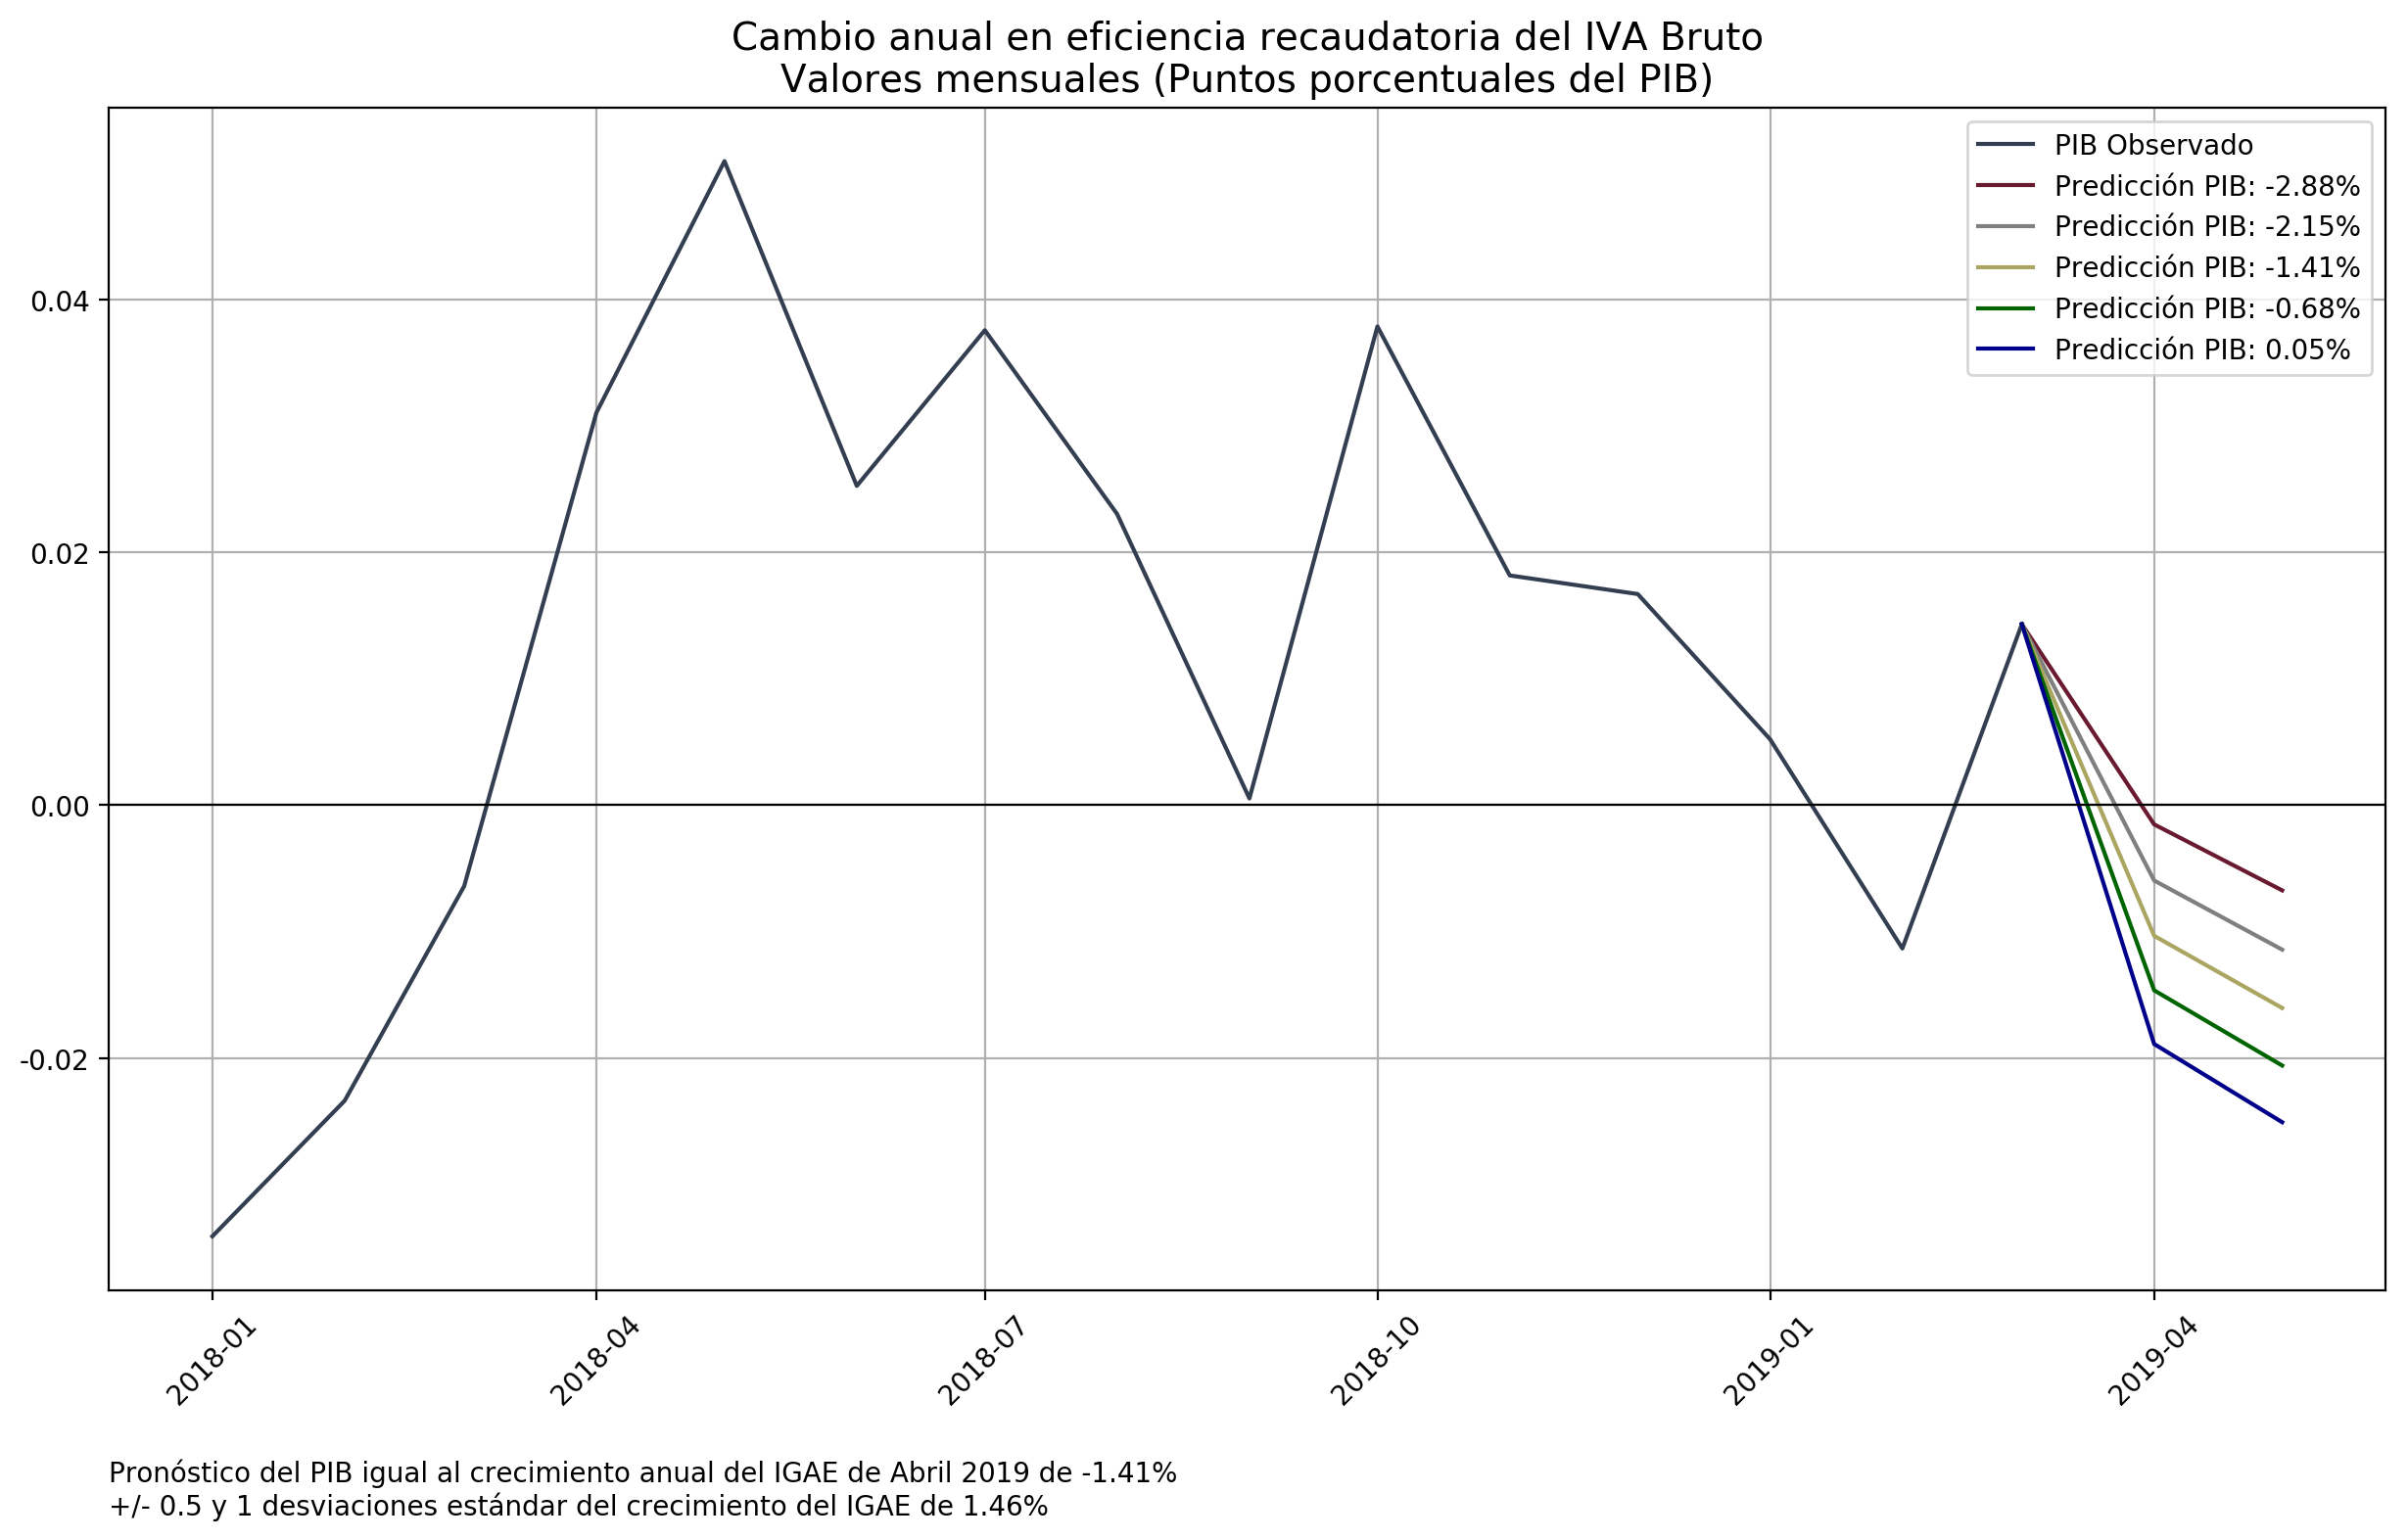

In [73]:
# Hacemos graficas para IVA
descriptive.plot_series(cambio_eficiencia_df_to_plot,
                        graph_vars_dict['iva_bruto'], 
                        legend=graph_change_labels,
                        title='Cambio anual en eficiencia recaudatoria del IVA Bruto',
                        subtitle='Valores mensuales (Puntos porcentuales del PIB)', ticks='quarterly',
                        min_date='2018-01-01',
                        hline=0,
#                         save_to='../figures/cambio_eficiencia_iva_bruto_mens_2014-01-01.png',
                        footnote=footnote)

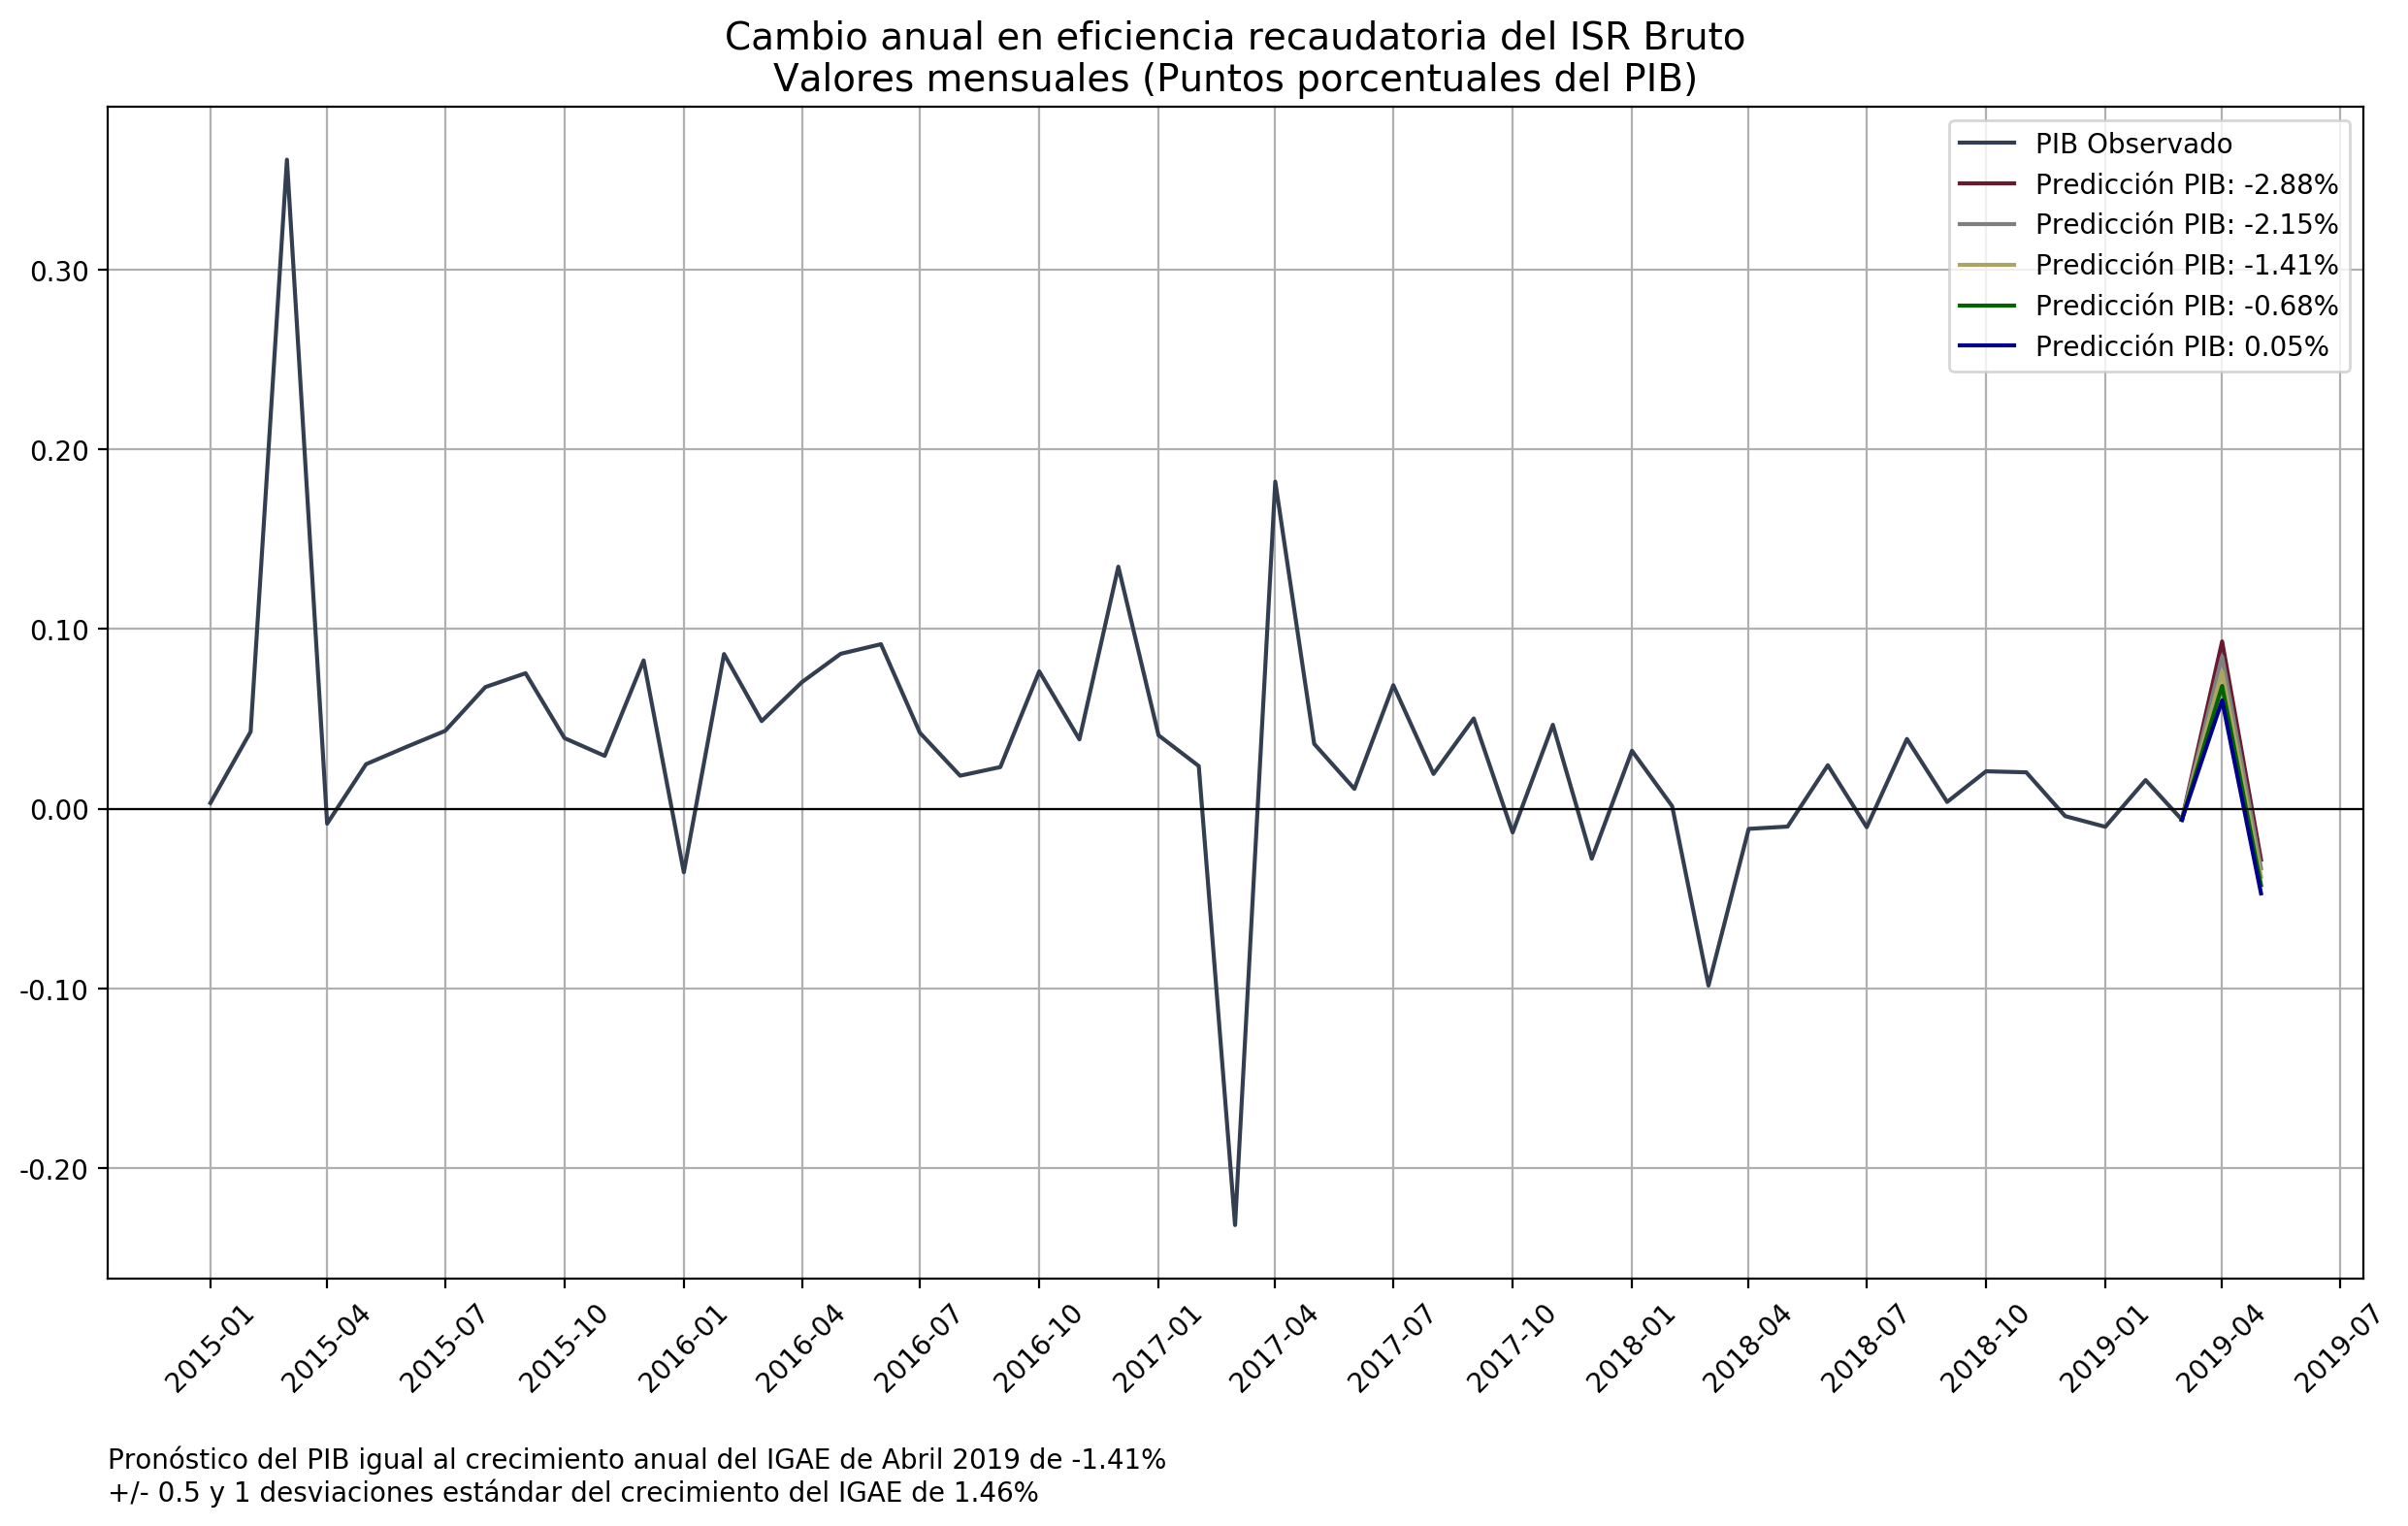

In [74]:
# HAcemos graficas para ISR
descriptive.plot_series(cambio_eficiencia_df_to_plot,
                        graph_vars_dict['isr_bruto'], 
                        legend=graph_change_labels,
                        title='Cambio anual en eficiencia recaudatoria del ISR Bruto',
                        subtitle='Valores mensuales (Puntos porcentuales del PIB)', ticks='quarterly',
                        hline=0,
                        save_to='../figures/cambio_eficiencia_isr_bruto_mens_2014-01-01.png',
                        footnote=footnote)

# Análisis trimestral

In [75]:
# Regresamos el PIB a valores trimestrales
pib_r_df_predict_q = pib_r_df_predict.resample('3MS').mean()

In [76]:
# Veamos la lista de predicciones de PIB
prediction_names_l

['pibr_2019',
 'pib_r_2019_-1.41%',
 'pib_r_2019_-2.88%',
 'pib_r_2019_-2.15%',
 'pib_r_2019_-0.68%',
 'pib_r_2019_0.05%',
 'pibr_2019',
 'pibr_2019']

## Escenario optimista - Ingresos Junio = Promedio Abril Mayo

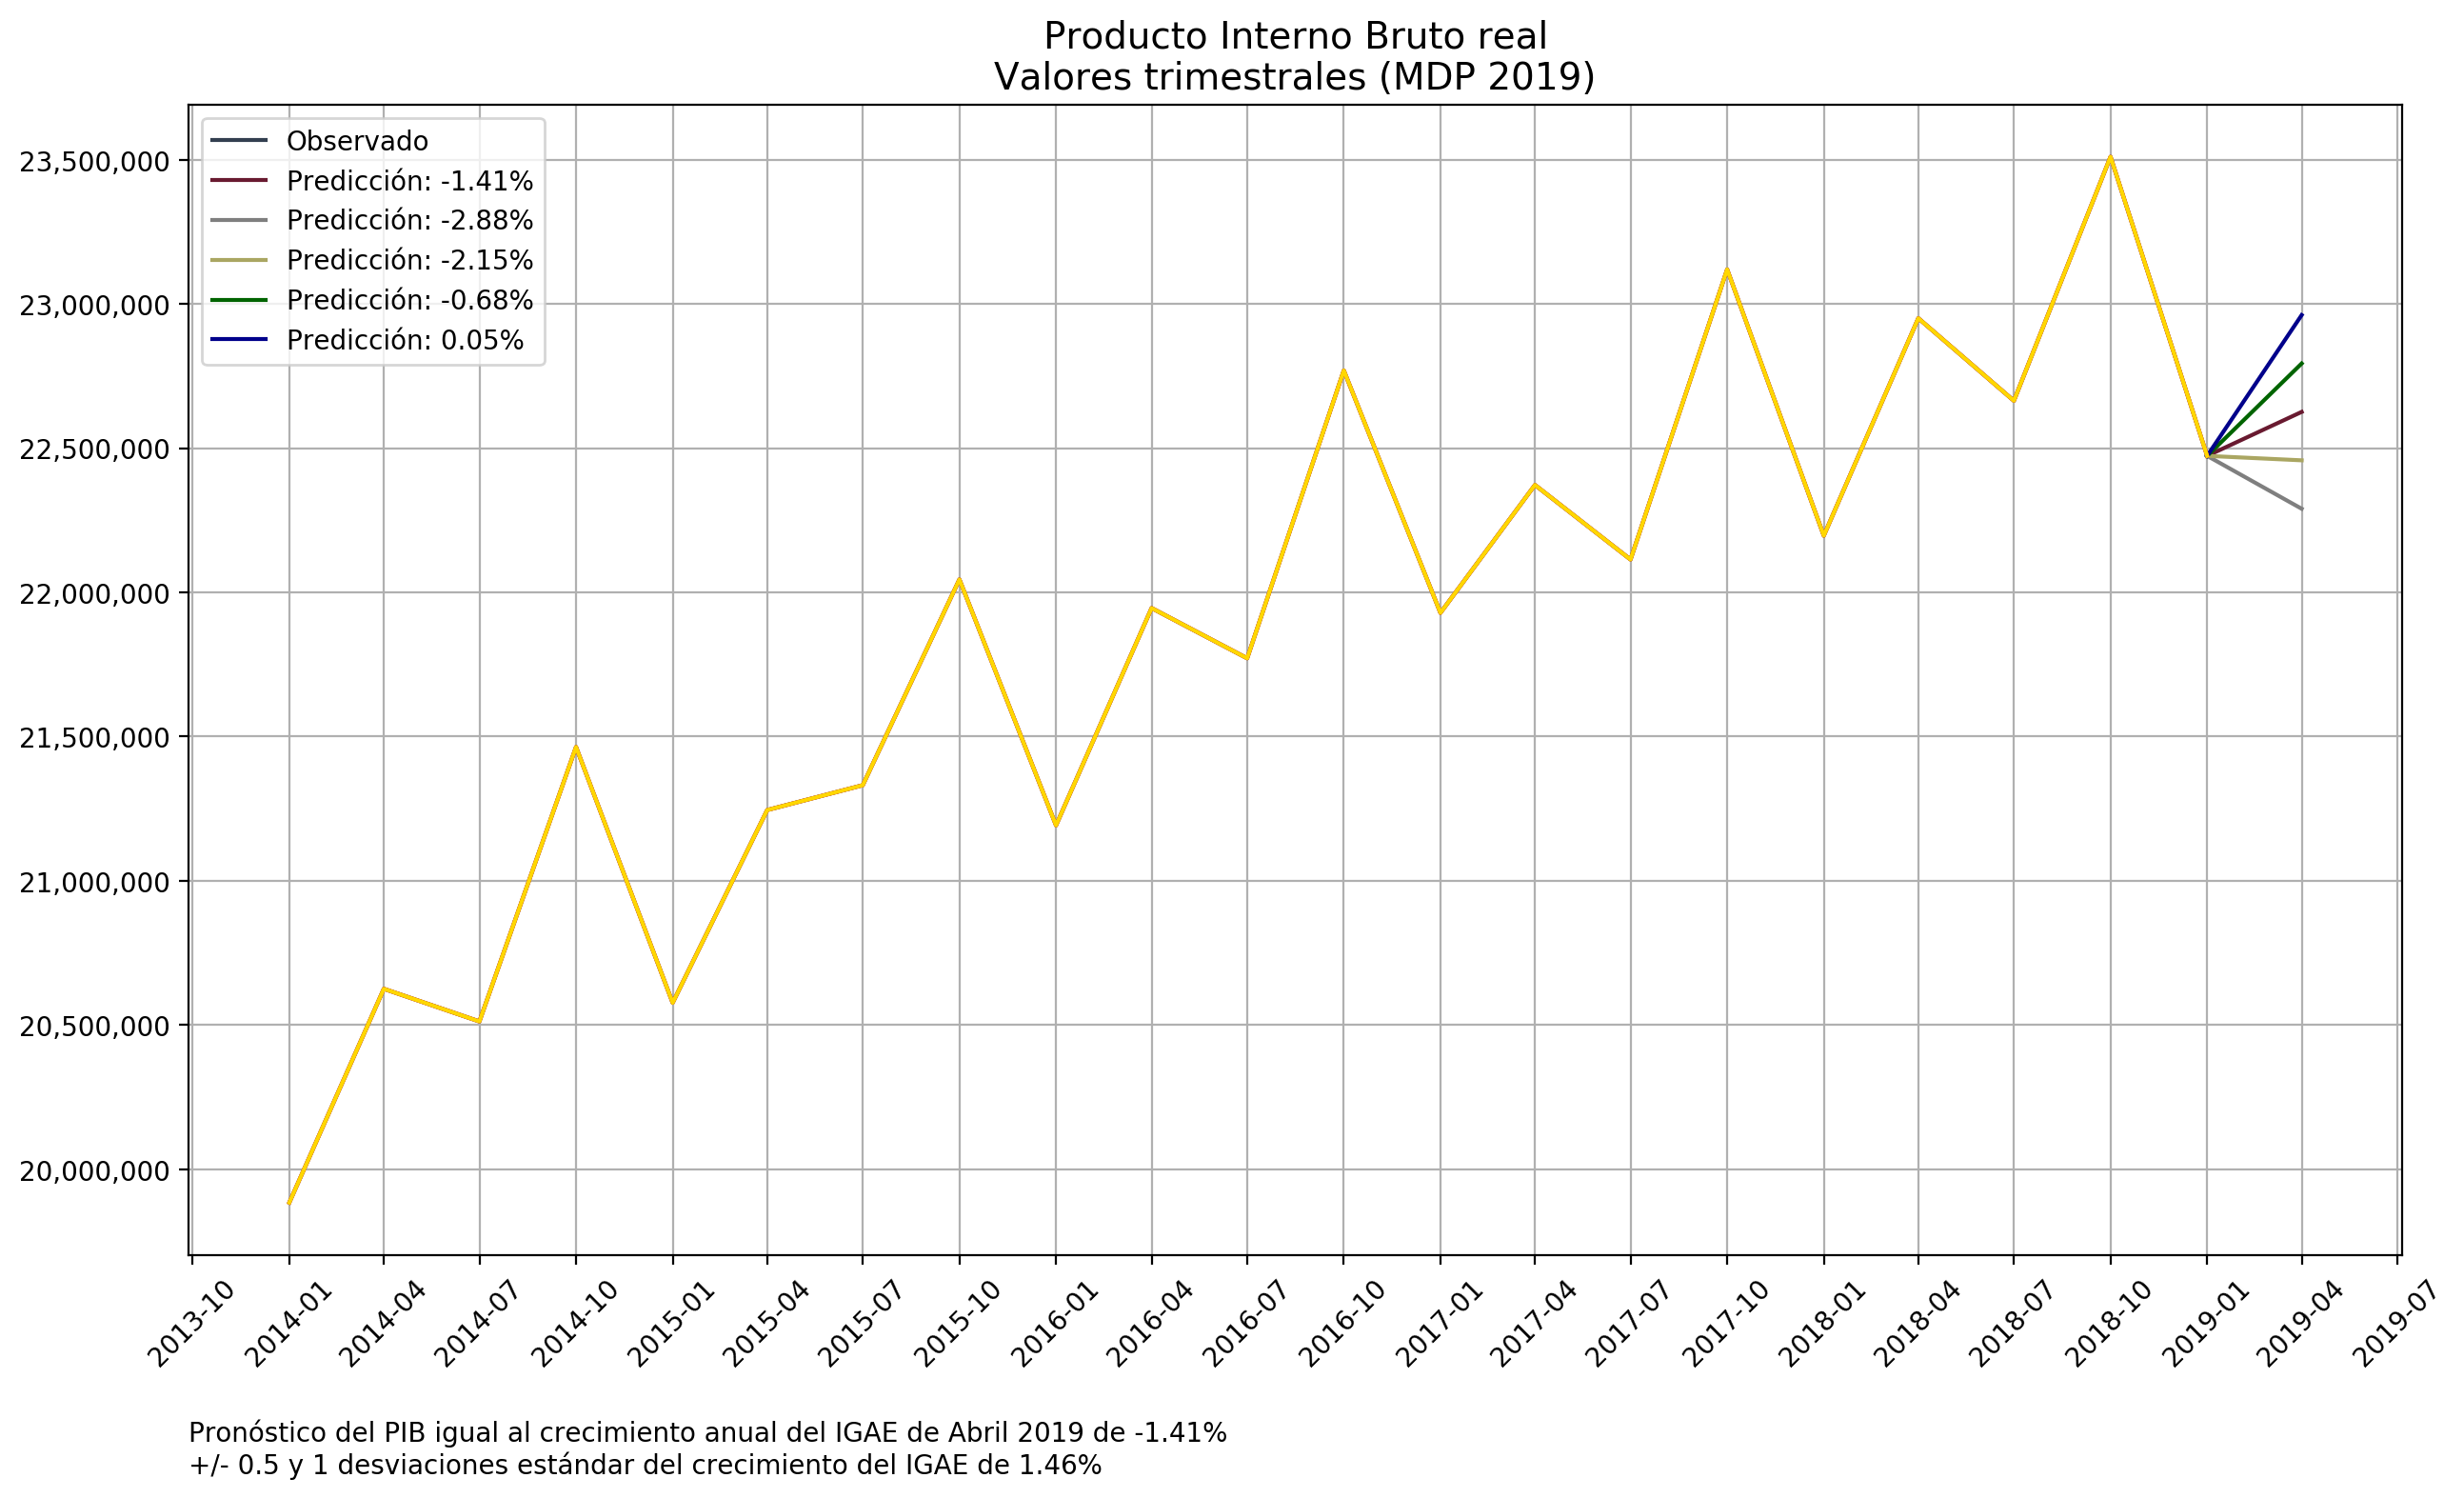

In [77]:
# Hacemos un DF específico para graficar también el PIB
pib_r_df_predict_q_to_plot = pib_r_df_predict_q.copy()
# Hacemos una lista con las variables que vamos a reemplazar por NaN antes del periodo de precicción
pib_predictions = [col for col in prediction_names_l if col != 'pibr_2019']
# Reemplazamos por NaN
pib_r_df_predict_q_to_plot.loc[pd.date_range('2014-01-01', '2018-10-01', freq='QS'), pib_predictions] = np.nan

# Creamos lista de labels
pib_labels = ['Observado']
pib_labels += [col.replace('pib_r_2019_', 'Predicción: ') for col in prediction_names_l if\
              col.startswith('pib_r_2019_')]

descriptive.plot_series(df=pib_r_df_predict_q_to_plot,
                        cols=prediction_names_l,
                        legend=pib_labels,
                        title='Producto Interno Bruto real', subtitle='Valores trimestrales (MDP 2019)',
                        ticks='quarterly', 
                        save_to='../figures/pib_real.png',
                        footnote=footnote)

In [78]:
footnote = '''Pronóstico de ingresos tributarios de Junio 2019 igual al promedio de ingresos tributarios
de Abril y Mayo 2019'''

In [79]:
# Para convertir la recaudación a valores trimestrales tenemos que asignar un valor a Junio. Una opeción es el
# promedio de Abril y Mayo, pero viendo la serie eso parece muy optimista porque Abril es excepcionalmente alto.
# Utilizaremos ese método por ahora, pero habrá que pensar mejor. 

# Copiamos los ingresos a una nueva DF
ingresos_sat_to_trim = ingresos_sat.copy()
# Obtenemos los valores promedio de Abril y Mayo
mean_vals = ingresos_sat_to_trim.loc[pd.date_range('2019-04-01', '2019-05-01', freq='MS')].mean()
# Hacemos un append de estos valores promedio al final del DF
ingresos_sat_to_trim = ingresos_sat_to_trim.append(mean_vals, ignore_index=True)
# El paso anterior modificó el indice y lo volvió un contador. Lo volvemos a poner como fecha, incluyendo junio.
ingresos_sat_to_trim.index = (pd.date_range('2014-01-01', '2019-06-01', freq='MS'))
# Creamos ingresos tributarios trimestrales como la suma de los meses que componen cada trimestre
ingresos_sat_q = ingresos_sat_to_trim.resample('3MS').sum()
ingresos_sat_q.replace({0: np.nan}, inplace=True)

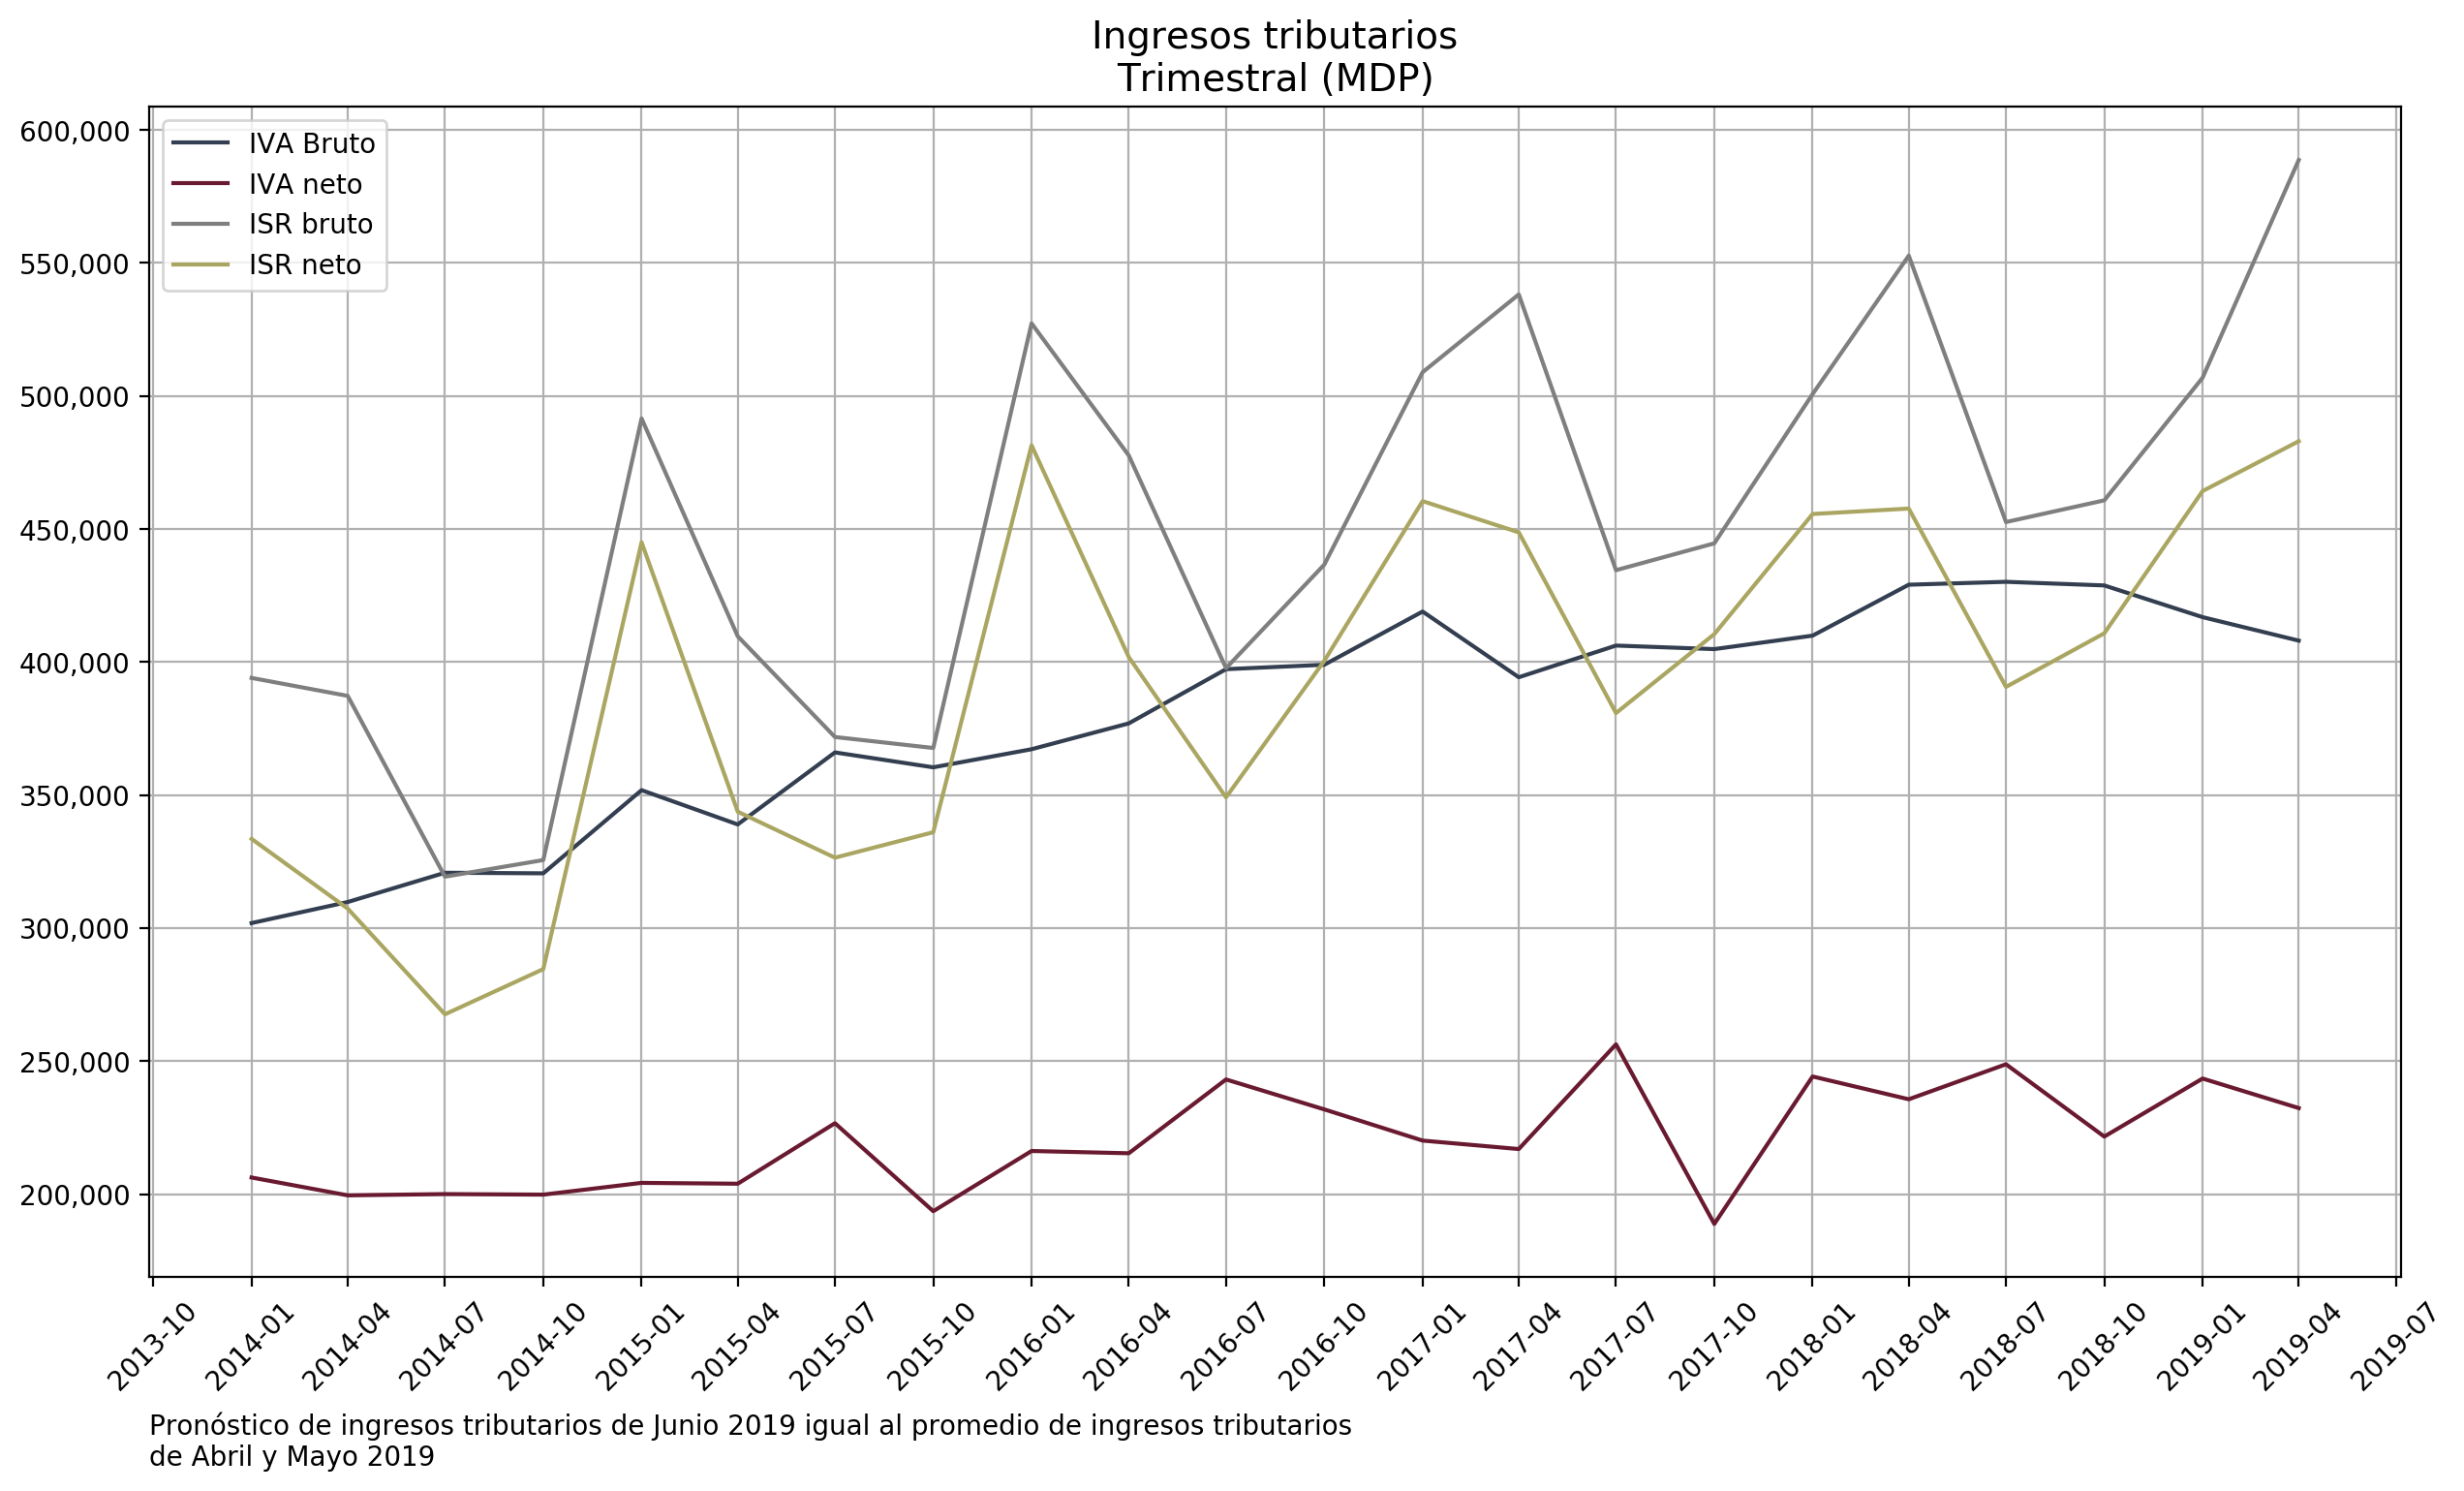

In [80]:
descriptive.plot_series(df=ingresos_sat_q,
                        cols=['iva_bruto_(mdp)_r', 'iva_neto_(mdp)_r','isr_bruto_(mdp)_r', 'isr_neto_(mdp)_r'],
                        legend= ['IVA Bruto', 'IVA neto','ISR bruto', 'ISR neto'],
                        title='Ingresos tributarios', subtitle='Trimestral (MDP)',ticks='quarterly',
                        footnote=footnote)

## Volvemos a calcular valores porcentuales

In [81]:
# Para calcular la eficiencia tributaria, tenemos que hacer un loop sobre cada uno de los impuestos y sobre cada
# una de las predicciones. Para ello, creamos una lista de los impuestos que usaremos, y usaremos la lista que 
# creamos que tiene los nombres de las predicciones. También crearemos un nuevo DataFrame con los valores de
# eficiencia.
eficiencia_df_q = pd.DataFrame(index=ingresos_sat_q.index)
impuestos_a_usar = ['iva_bruto_(mdp)_r', 'iva_neto_(mdp)_r', 'isr_bruto_(mdp)_r', 'isr_neto_(mdp)_r']
# Ampliamos la lista de prediction_names_l para que incluya el pib original. Esto serirá para graficar
prediction_names_l.append('pibr_2019')
for tax in impuestos_a_usar:
    for prediction_name in prediction_names_l:
        # Obtenemos el impuesto que usaremos como denominador
        impuesto = ingresos_sat_q[tax]
        # Obtenemos la predicción que usaremos como denominador
        prediction_pib = pib_r_df_predict_q[prediction_name]
        # Creamos el nombre de la variable que crearemos. Será por ejemplo: 'iva_bruto_%PIB_-1.4%'
        # Para eso, eliminamos la ultima parte del nombre del impuesto, eliminamos la primera parte del
        # nombre de la predicción, y los juntamos con %PIB en medio
        nombre_variable_ef = tax.replace('(mdp)_r', '') + '%PIB_' + prediction_name.replace('pib_r_2019_', '')
        eficiencia_df_q[nombre_variable_ef] = (impuesto / prediction_pib) * 100

# Gráfica 1

In [82]:
footnote_q = '''
Pronóstico del PIB igual al crecimiento anual del IGAE de Abril 2019 de {0:.2f}%
+/- 0.5 y 1 desviaciones estándar del crecimiento del IGAE de {1:.2f}%

Pronóstico de ingresos tributarios de Junio 2019 igual al promedio de ingresos tributarios
de Abril y Mayo 2019'''\
.format(last_growth_igae * 100, igae_growth_std * 100)

In [83]:
# De nuevo hacemos un DF específico para el plot
eficiencia_df_q_to_plot = eficiencia_df_q.copy()
# Reemplazamos por NA las variables en prediction_vars para el periodo observado
eficiencia_df_q_to_plot.loc[pd.date_range('2014-01-01', '2018-10-01', freq='QS'), prediction_vars] = np.nan

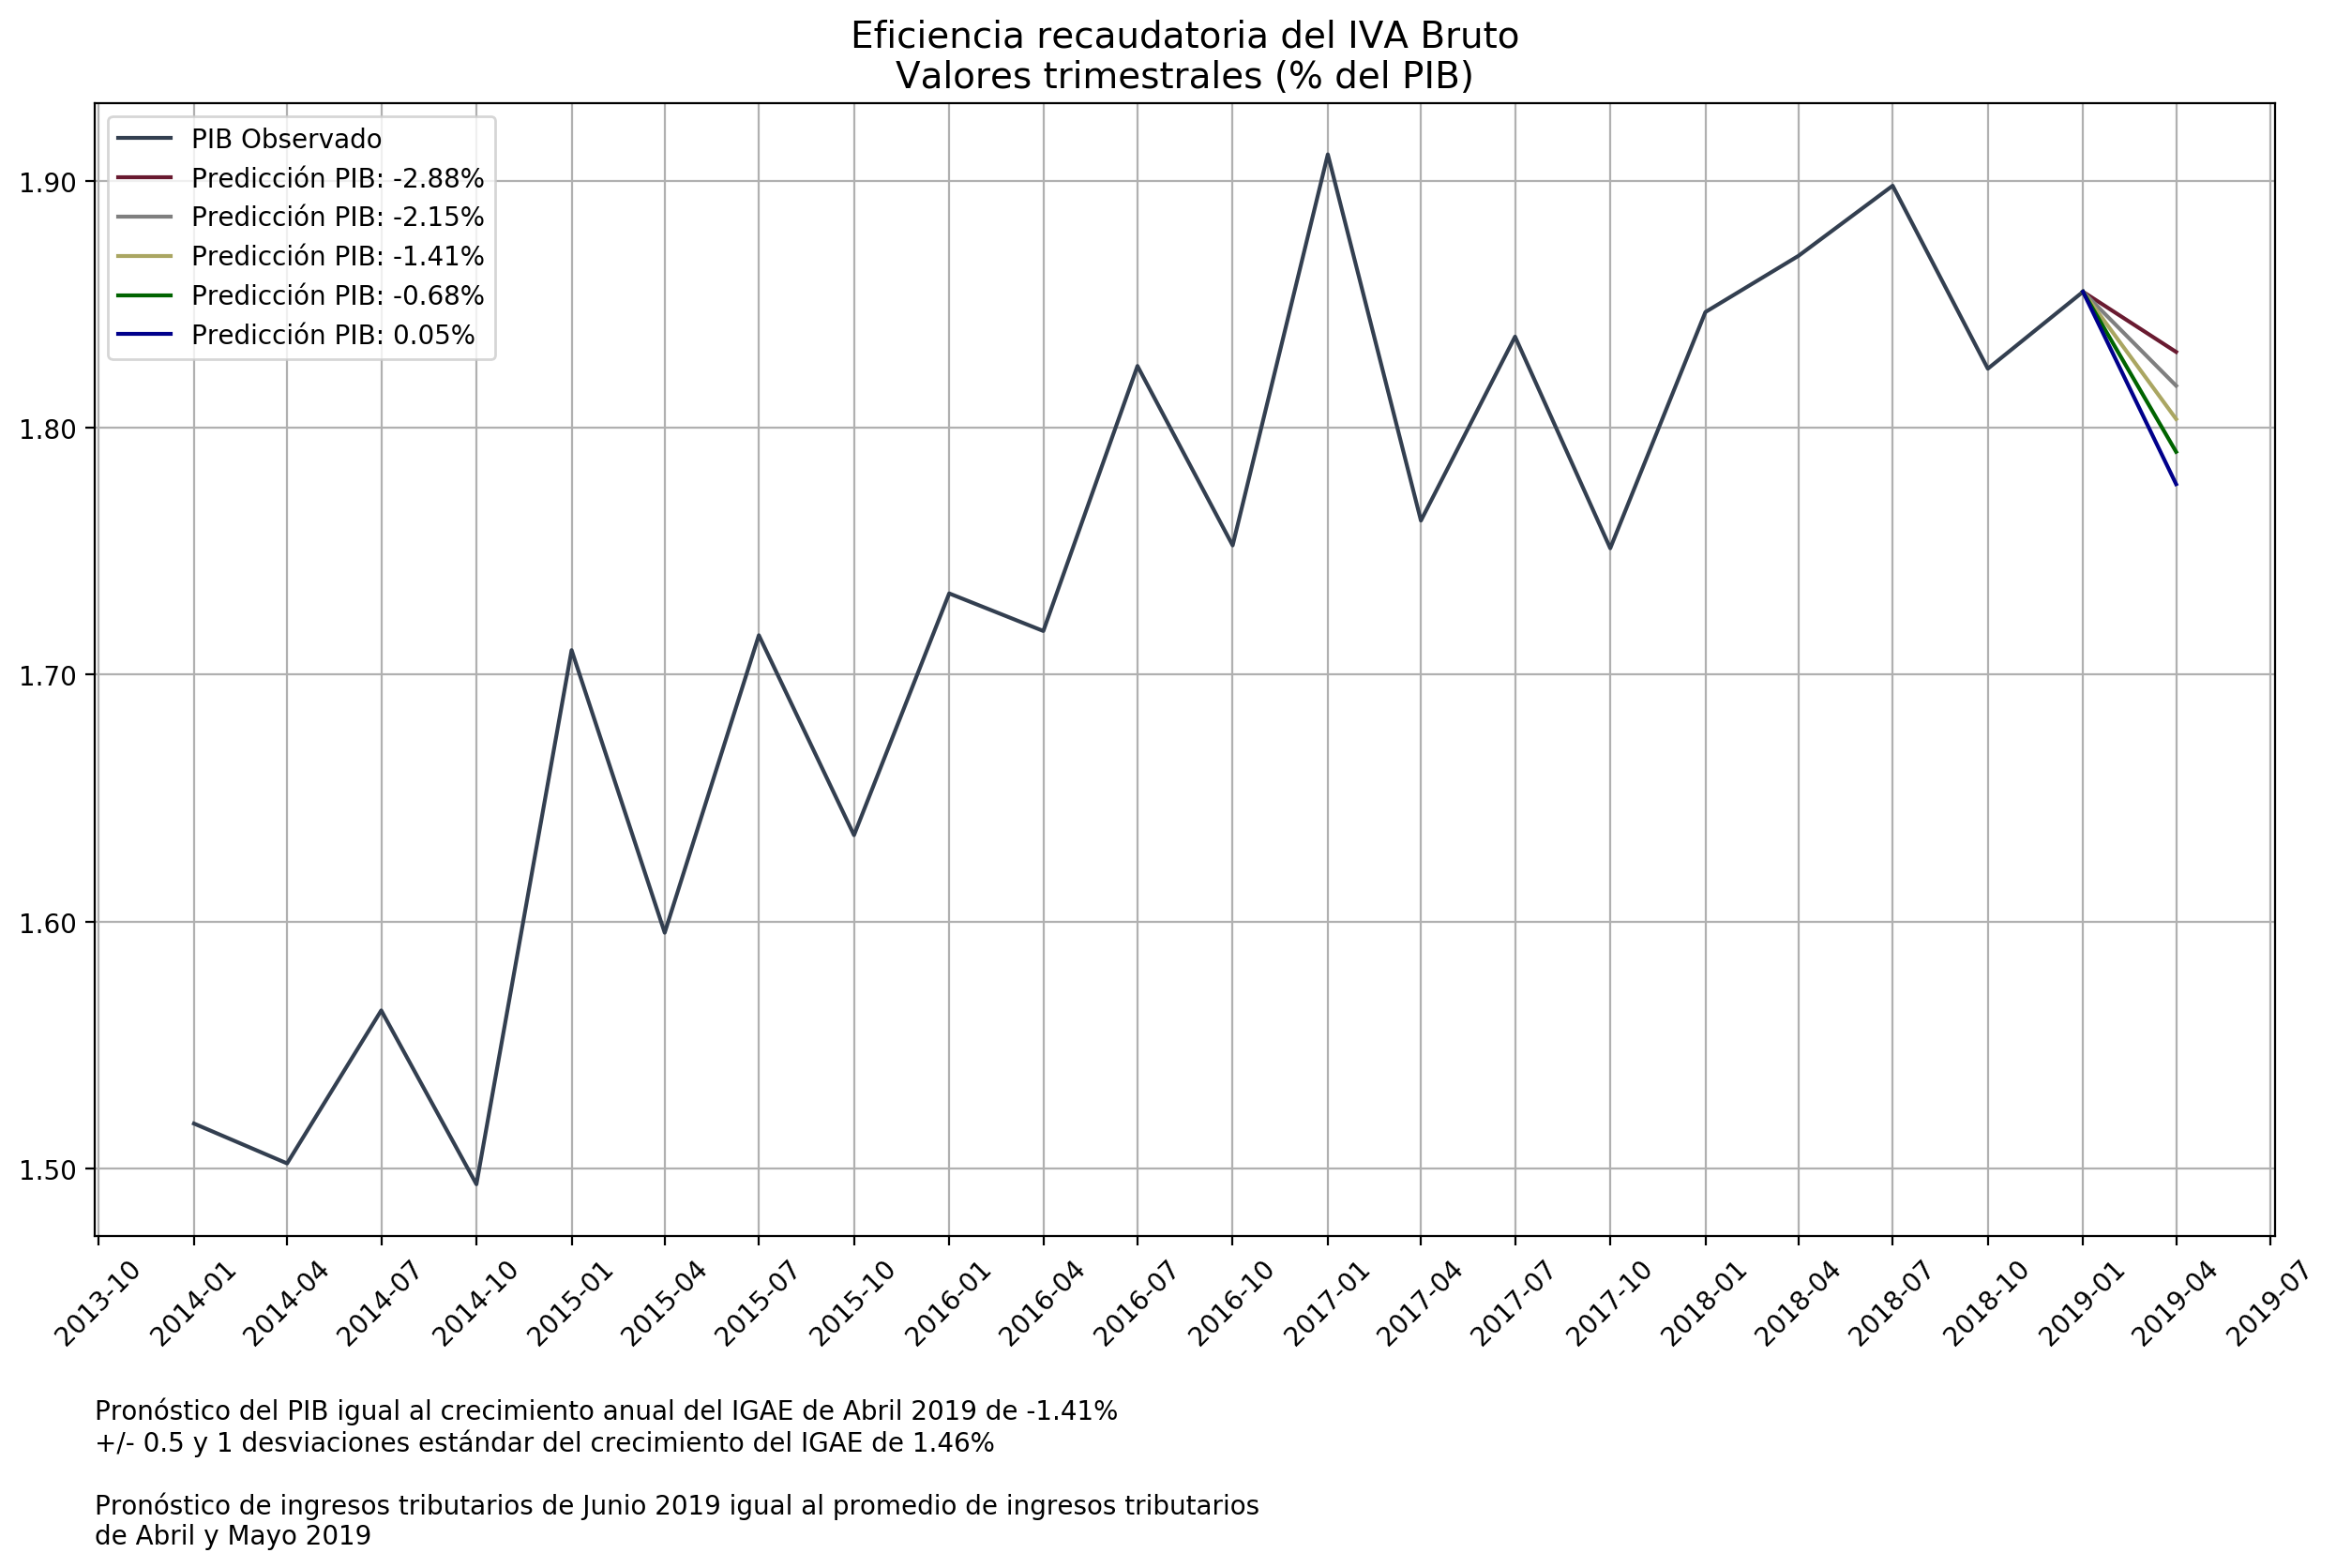

In [84]:
# Hacemos graficas para IVA
descriptive.plot_series(df=eficiencia_df_q_to_plot,
                        cols=graph_vars_dict['iva_bruto'], 
                        legend=graph_labels,
                        title='Eficiencia recaudatoria del IVA Bruto',
                        subtitle='Valores trimestrales (% del PIB)', ticks='quarterly',
                        save_to='../figures/eficiencia_iva_bruto_trim_2014-01-01.png',
                        footnote=footnote_q)

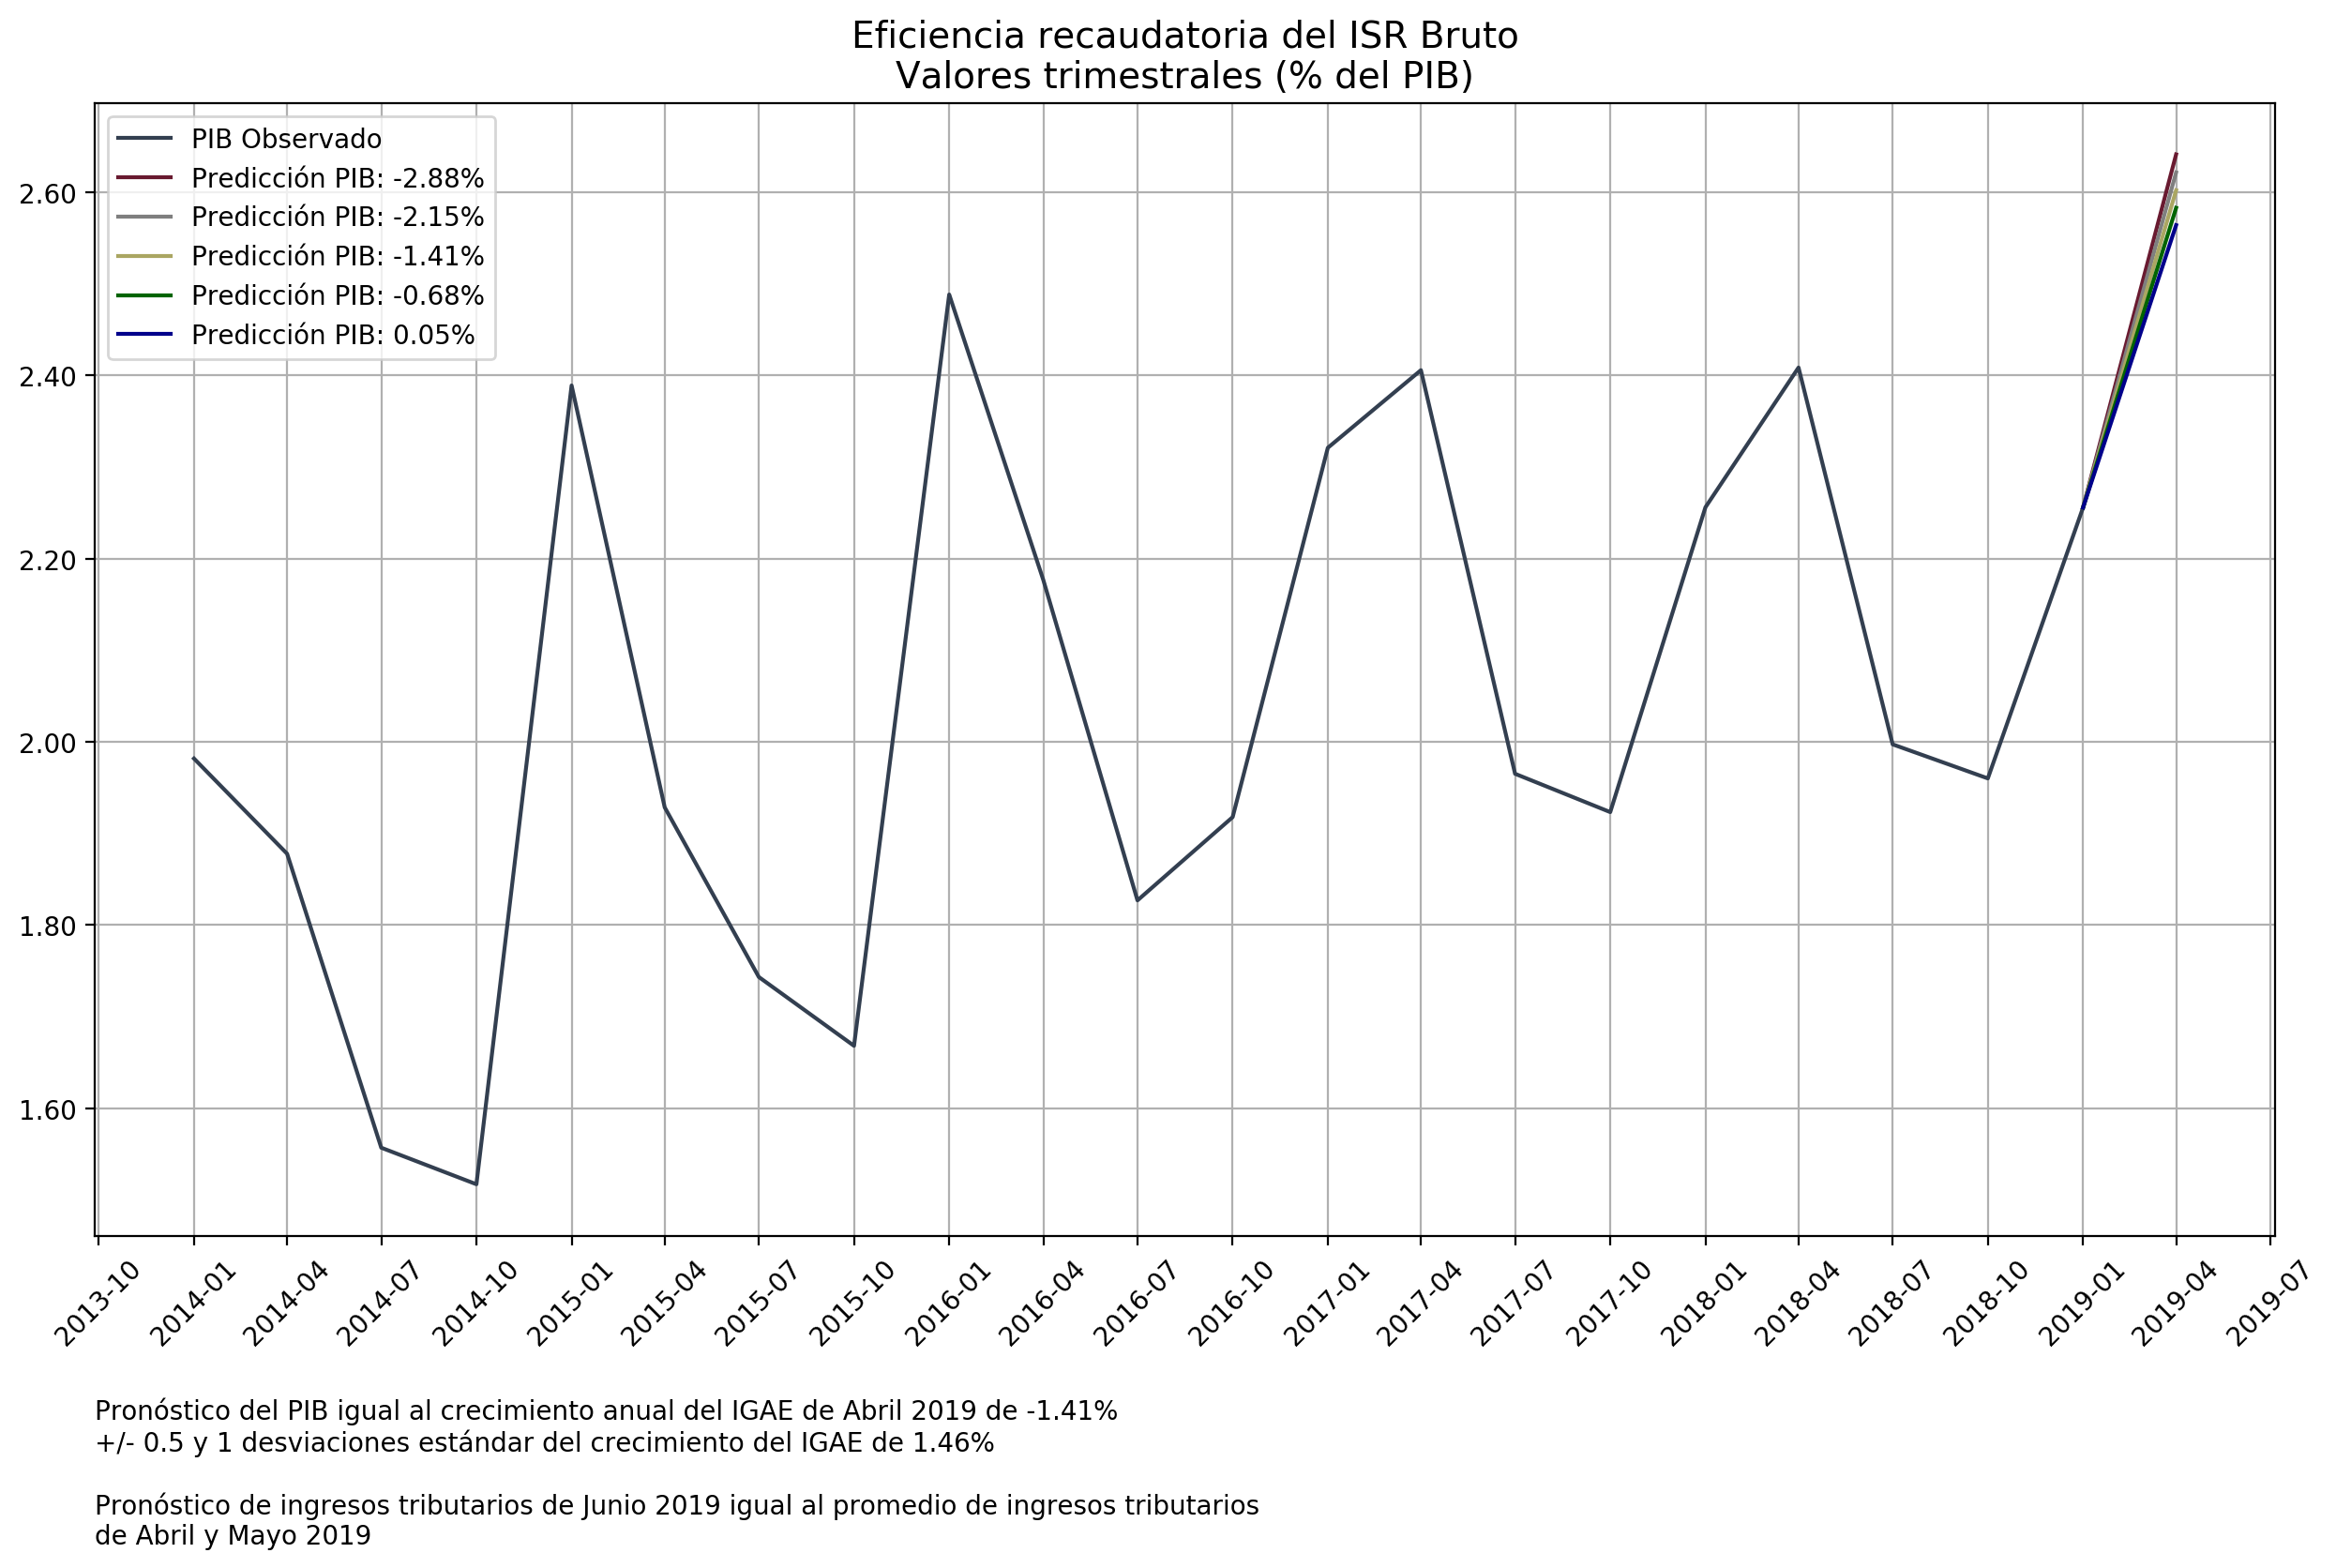

In [85]:
# HAcemos graficas para ISR
descriptive.plot_series(df=eficiencia_df_q_to_plot,
                        cols=graph_vars_dict['isr_bruto'], 
                        legend=graph_labels,
                        title='Eficiencia recaudatoria del ISR Bruto',
                        subtitle='Valores trimestrales (% del PIB)', ticks='quarterly',
                        save_to='../figures/eficiencia_isr_bruto_trim_2014-01-01.png',
                        footnote=footnote_q)

# Grafica 2
### Cambio en eficiencia recaudatoria IVA e ISR brutos

In [86]:
# Calculamos diferencias en eficiencia
cambio_eficiencia_df_q = eficiencia_df_q.diff(4)

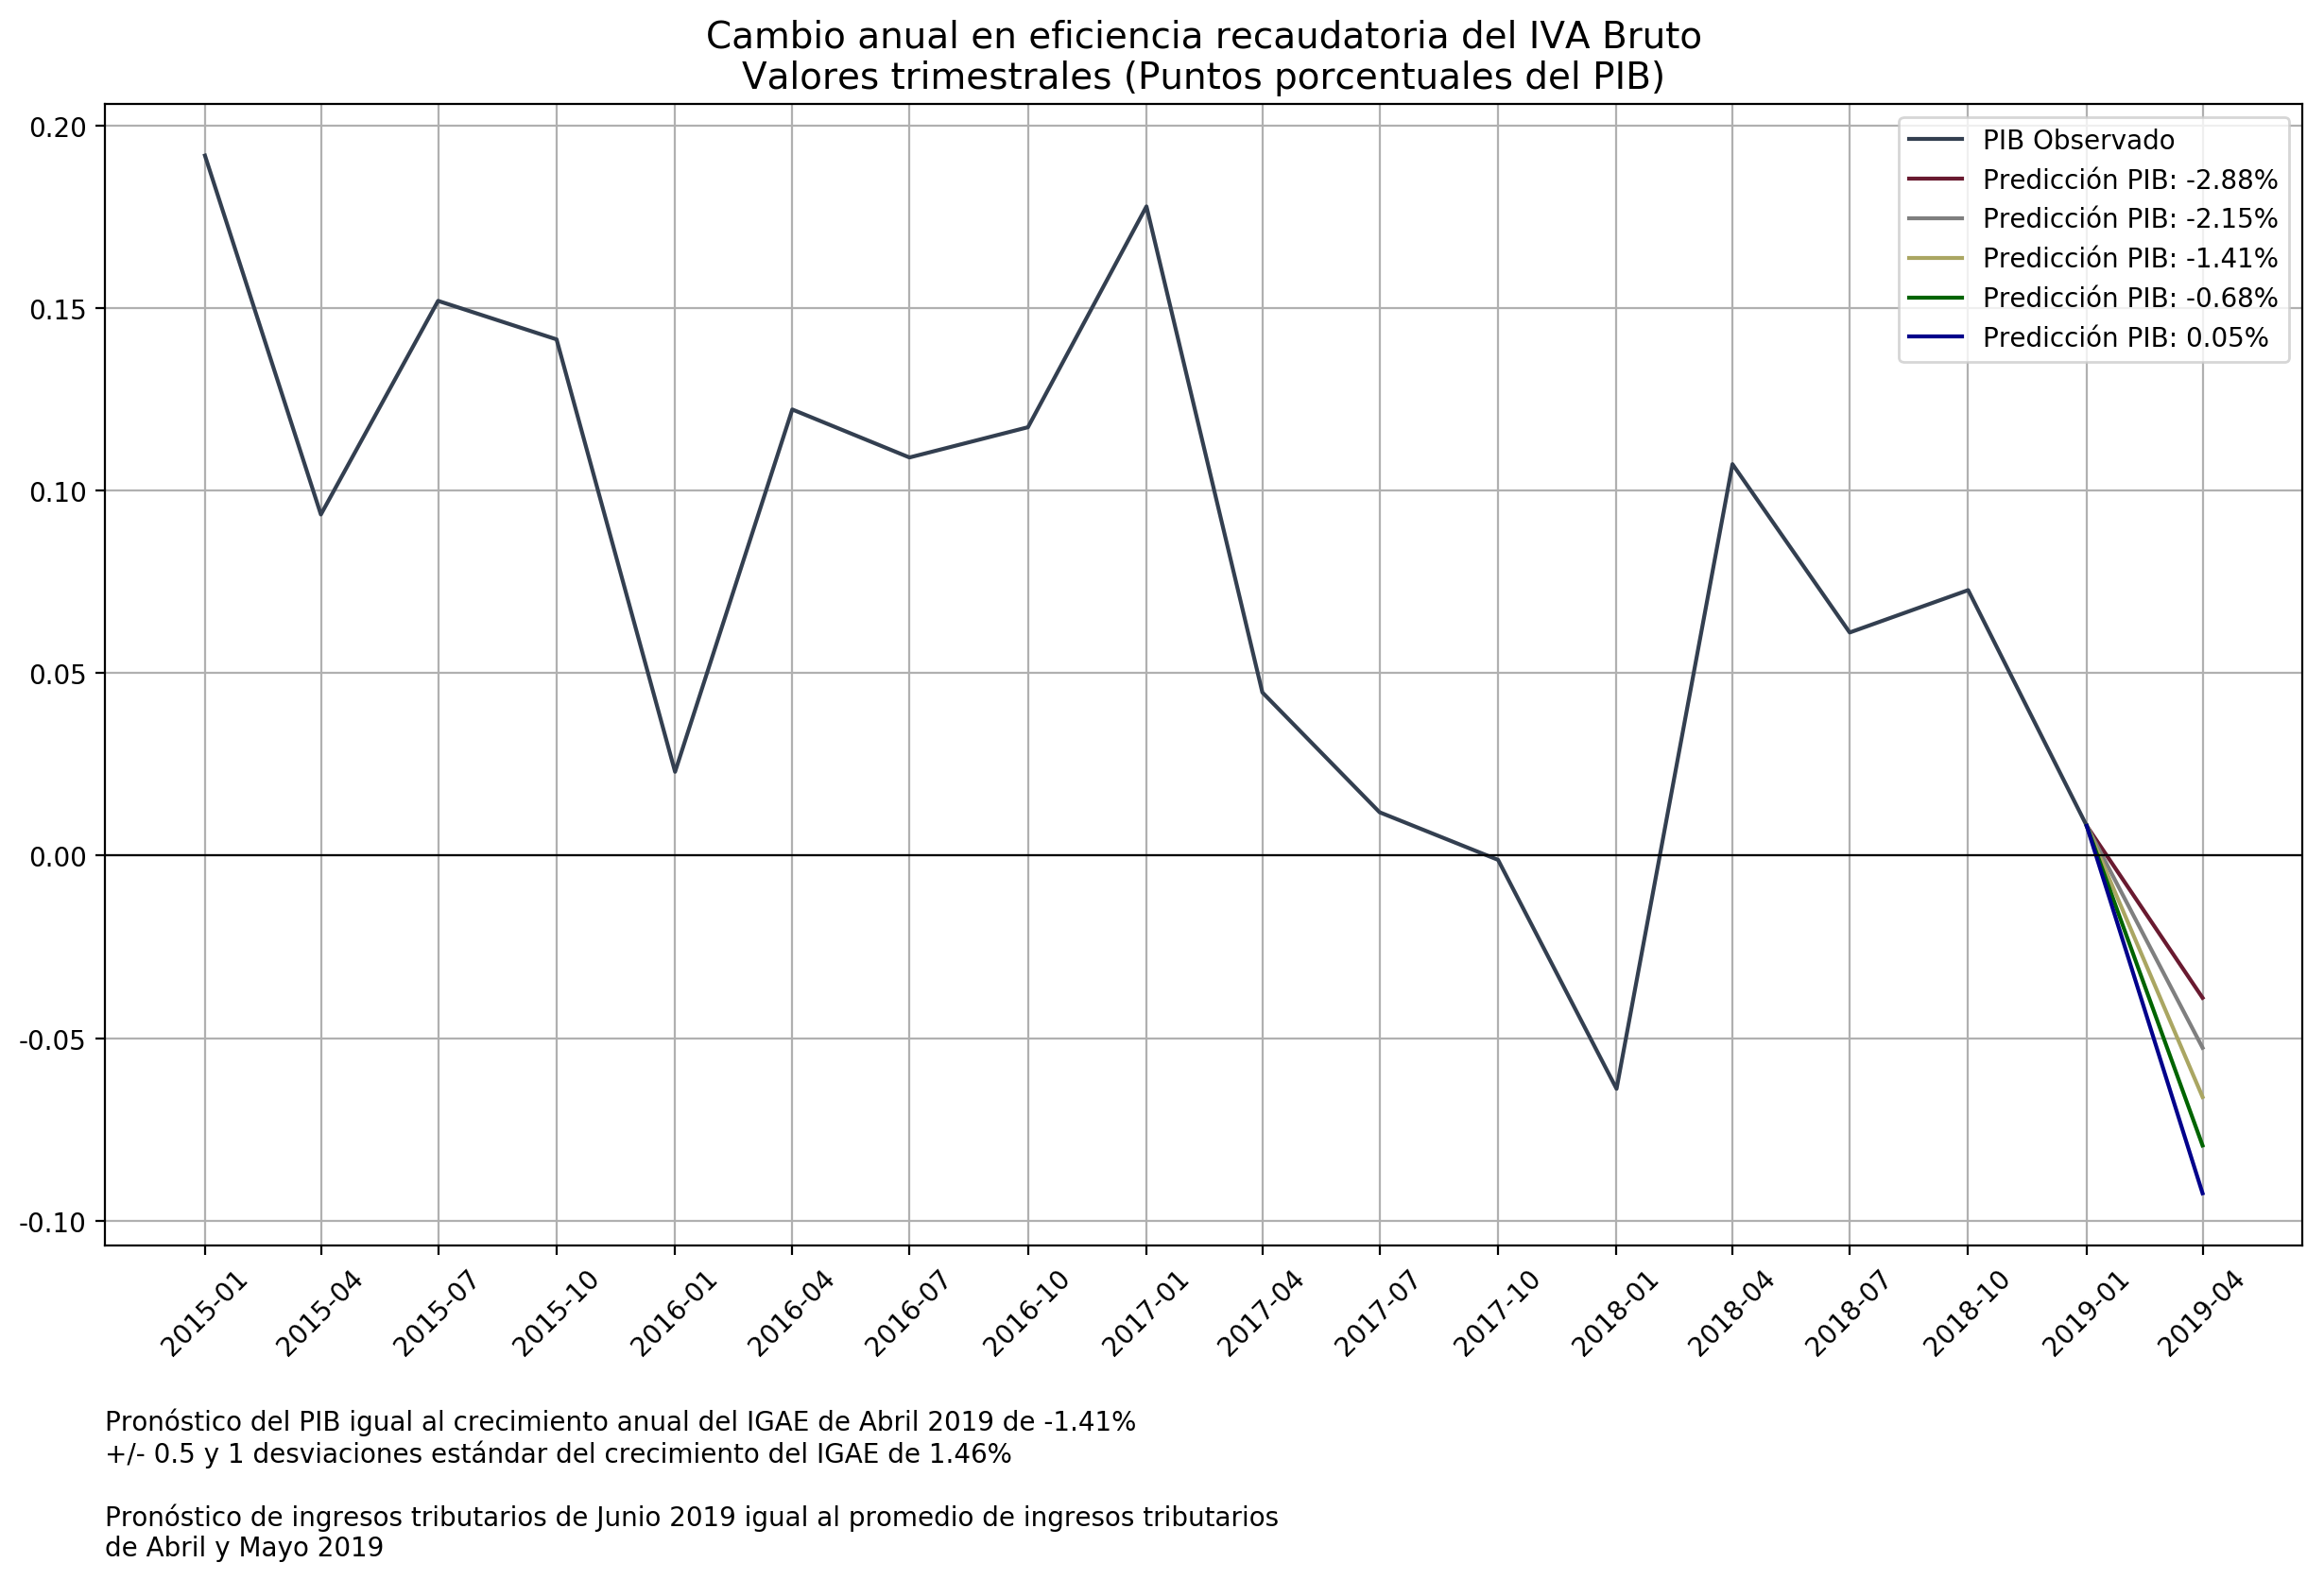

In [87]:
# HAcemos graficas para IVA
cambio_eficiencia_df_q_to_plot = cambio_eficiencia_df_q.copy()
cambio_eficiencia_df_q_to_plot.loc[pd.date_range('2014-01-01', '2018-10-01', freq='QS'), prediction_vars] = np.nan

descriptive.plot_series(cambio_eficiencia_df_q_to_plot,
                        graph_vars_dict['iva_bruto'], 
                        legend=graph_change_labels,
                        title='Cambio anual en eficiencia recaudatoria del IVA Bruto',
                        subtitle='Valores trimestrales (Puntos porcentuales del PIB)', ticks='quarterly',
                        hline=0,
                        save_to='../figures/cambio_eficiencia_iva_bruto_trim_2014-01-01.png',
                        footnote=footnote_q)

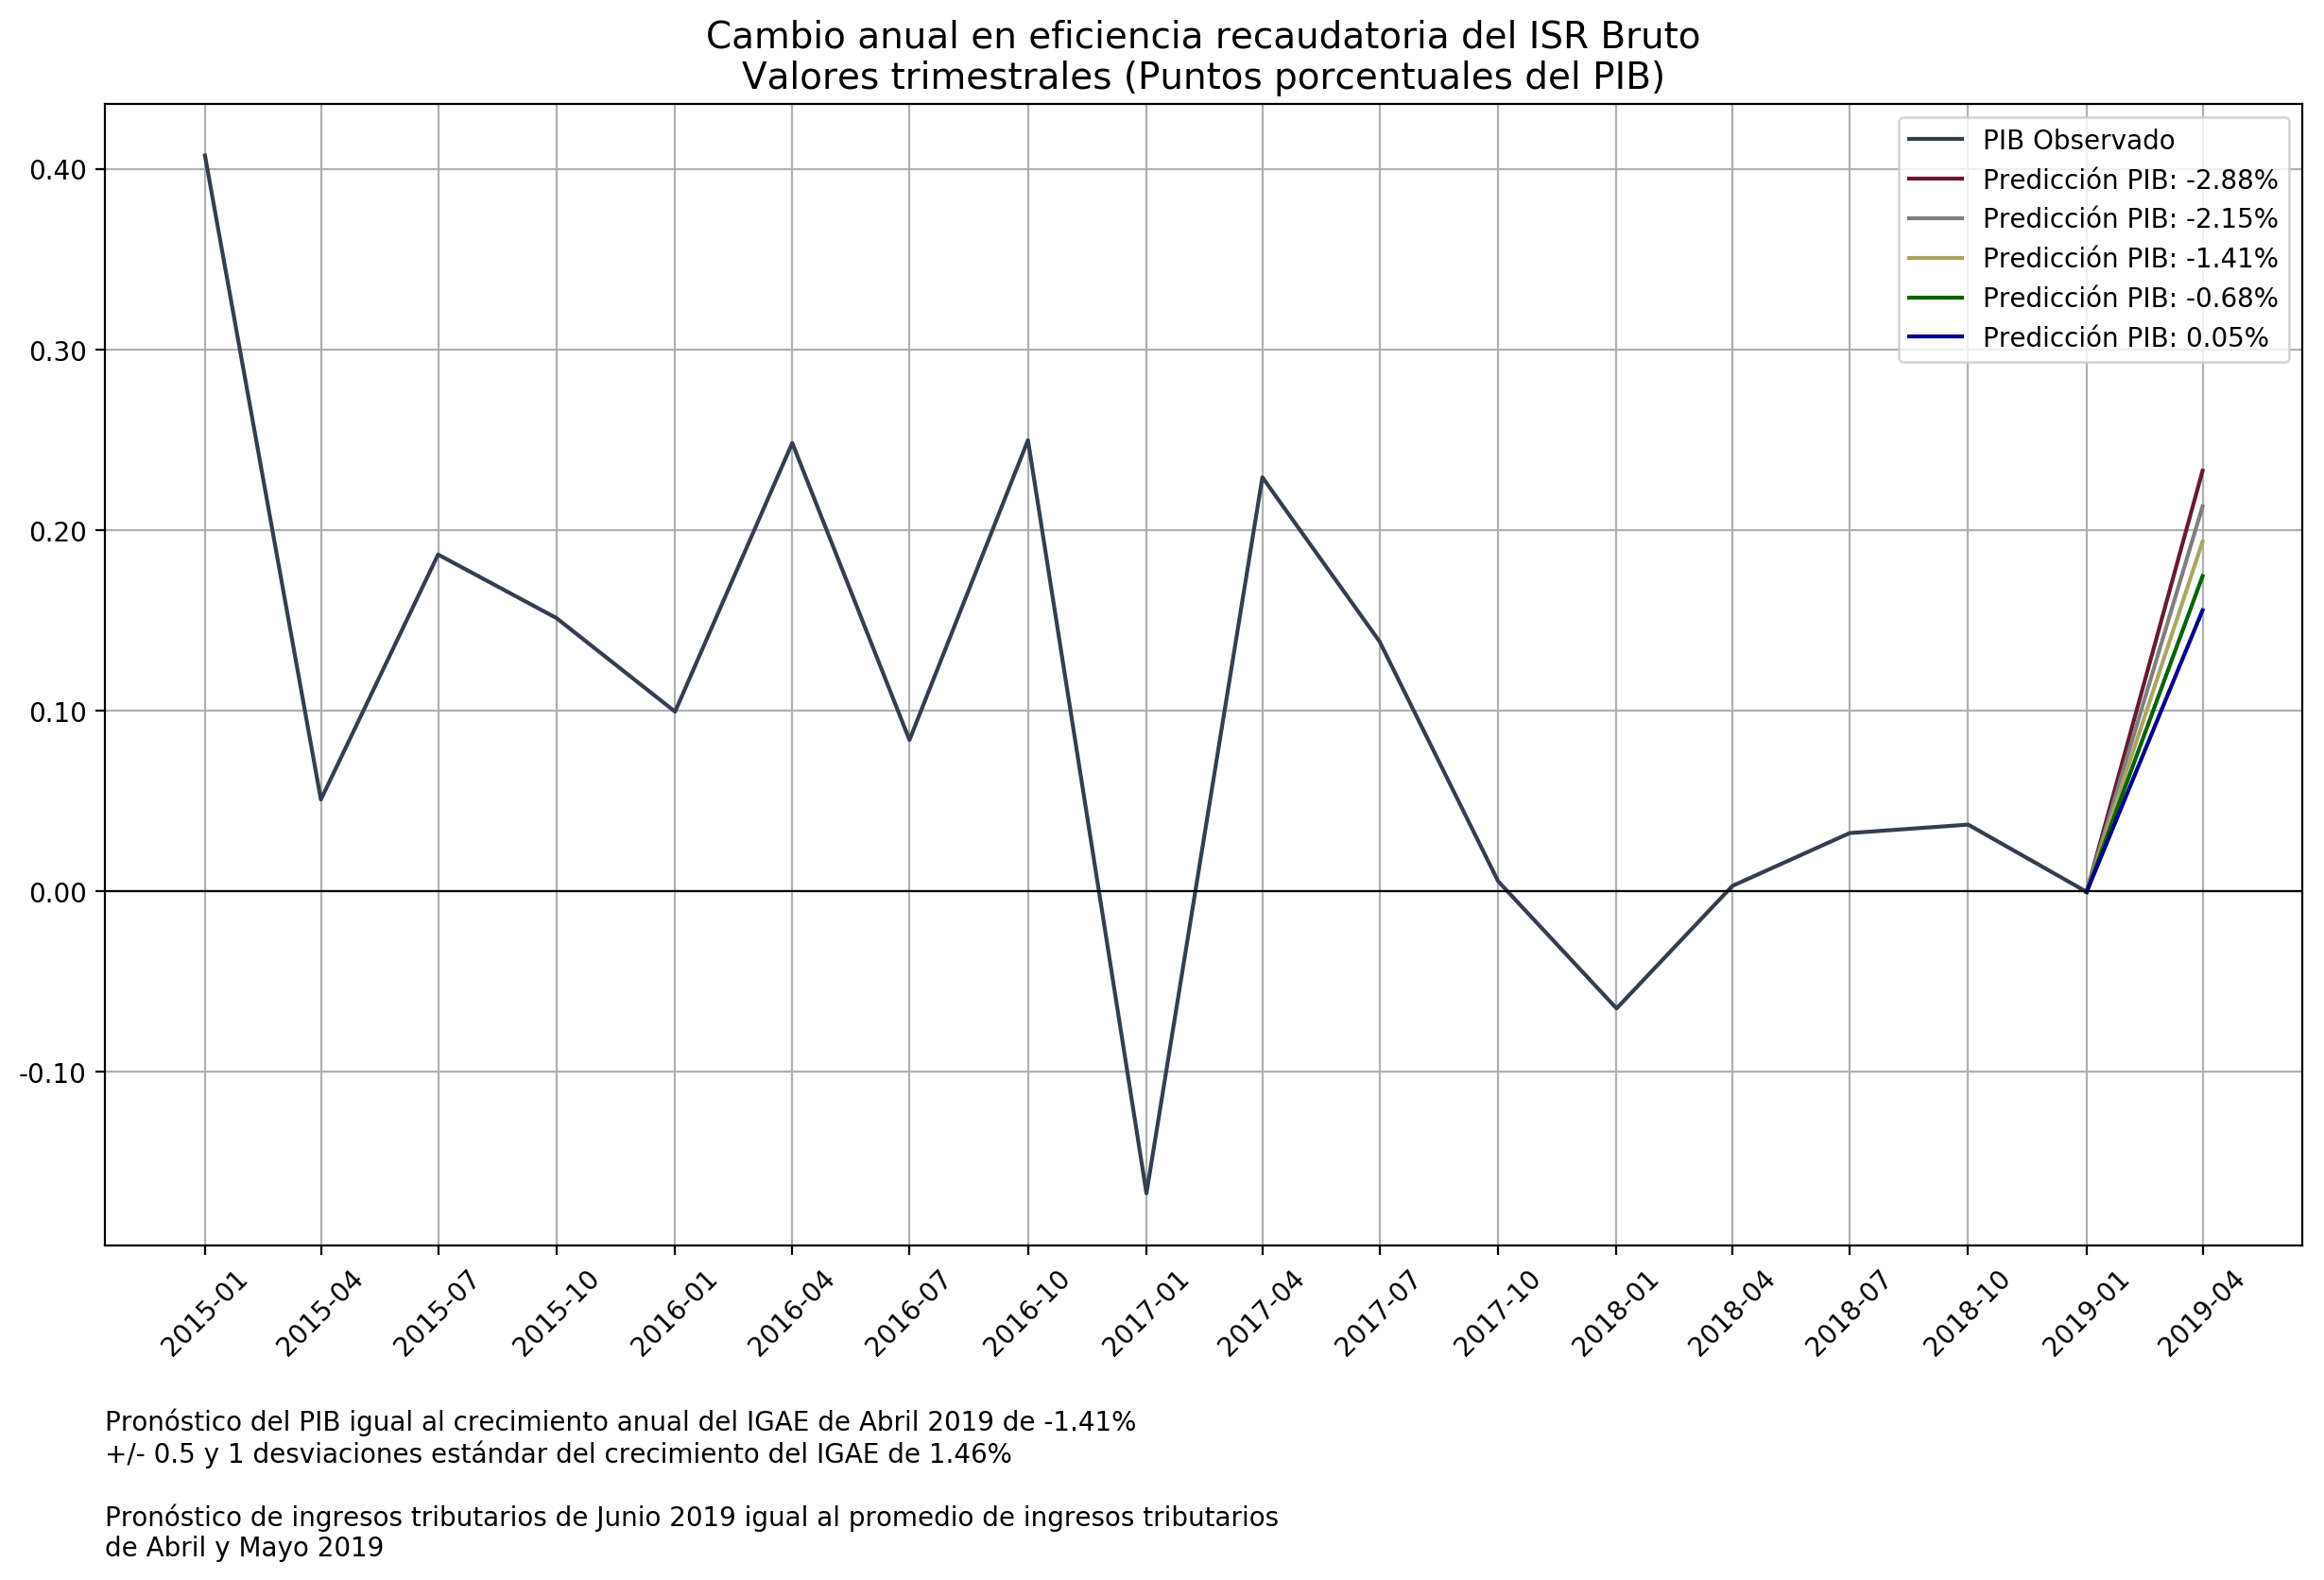

In [88]:
# Hacemos graficas para ISR
descriptive.plot_series(cambio_eficiencia_df_q_to_plot,
                        graph_vars_dict['isr_bruto'], 
                        legend=graph_change_labels,
                        title='Cambio anual en eficiencia recaudatoria del ISR Bruto',
                        subtitle='Valores trimestrales (Puntos porcentuales del PIB)', ticks='quarterly',
                        hline=0,
                        save_to='../figures/cambio_eficiencia_isr_bruto_trim_2014-01-01.png',
                        footnote=footnote_q)

## Escenario conservador - Ingresos Junio = Ingresos Mayo

In [89]:
footnote = '''Pronóstico de ingresos tributarios de Junio 2019 igual a ingresos tributarios de Mayo 2019'''

In [90]:
# Para convertir la recaudación a valores trimestrales tenemos que asignar un valor a Junio. Una opeción es el
# promedio de Abril y Mayo, pero viendo la serie eso parece muy optimista porque Abril es excepcionalmente alto.
# Utilizaremos ese método por ahora, pero habrá que pensar mejor. 

# Copiamos los ingresos a una nueva DF
ingresos_sat_to_trim = ingresos_sat.copy()
# Obtenemos los valores promedio de Abril y Mayo
may_vals = ingresos_sat_to_trim.loc['2019-05-01']
# Hacemos un append de estos valores promedio al final del DF
ingresos_sat_to_trim = ingresos_sat_to_trim.append(may_vals, ignore_index=True)
# El paso anterior modificó el indice y lo volvió un contador. Lo volvemos a poner como fecha, incluyendo junio.
ingresos_sat_to_trim.index = (pd.date_range('2014-01-01', '2019-06-01', freq='MS'))
# Creamos ingresos tributarios trimestrales como la suma de los meses que componen cada trimestre
ingresos_sat_q = ingresos_sat_to_trim.resample('3MS').sum()
ingresos_sat_q.replace({0: np.nan}, inplace=True)

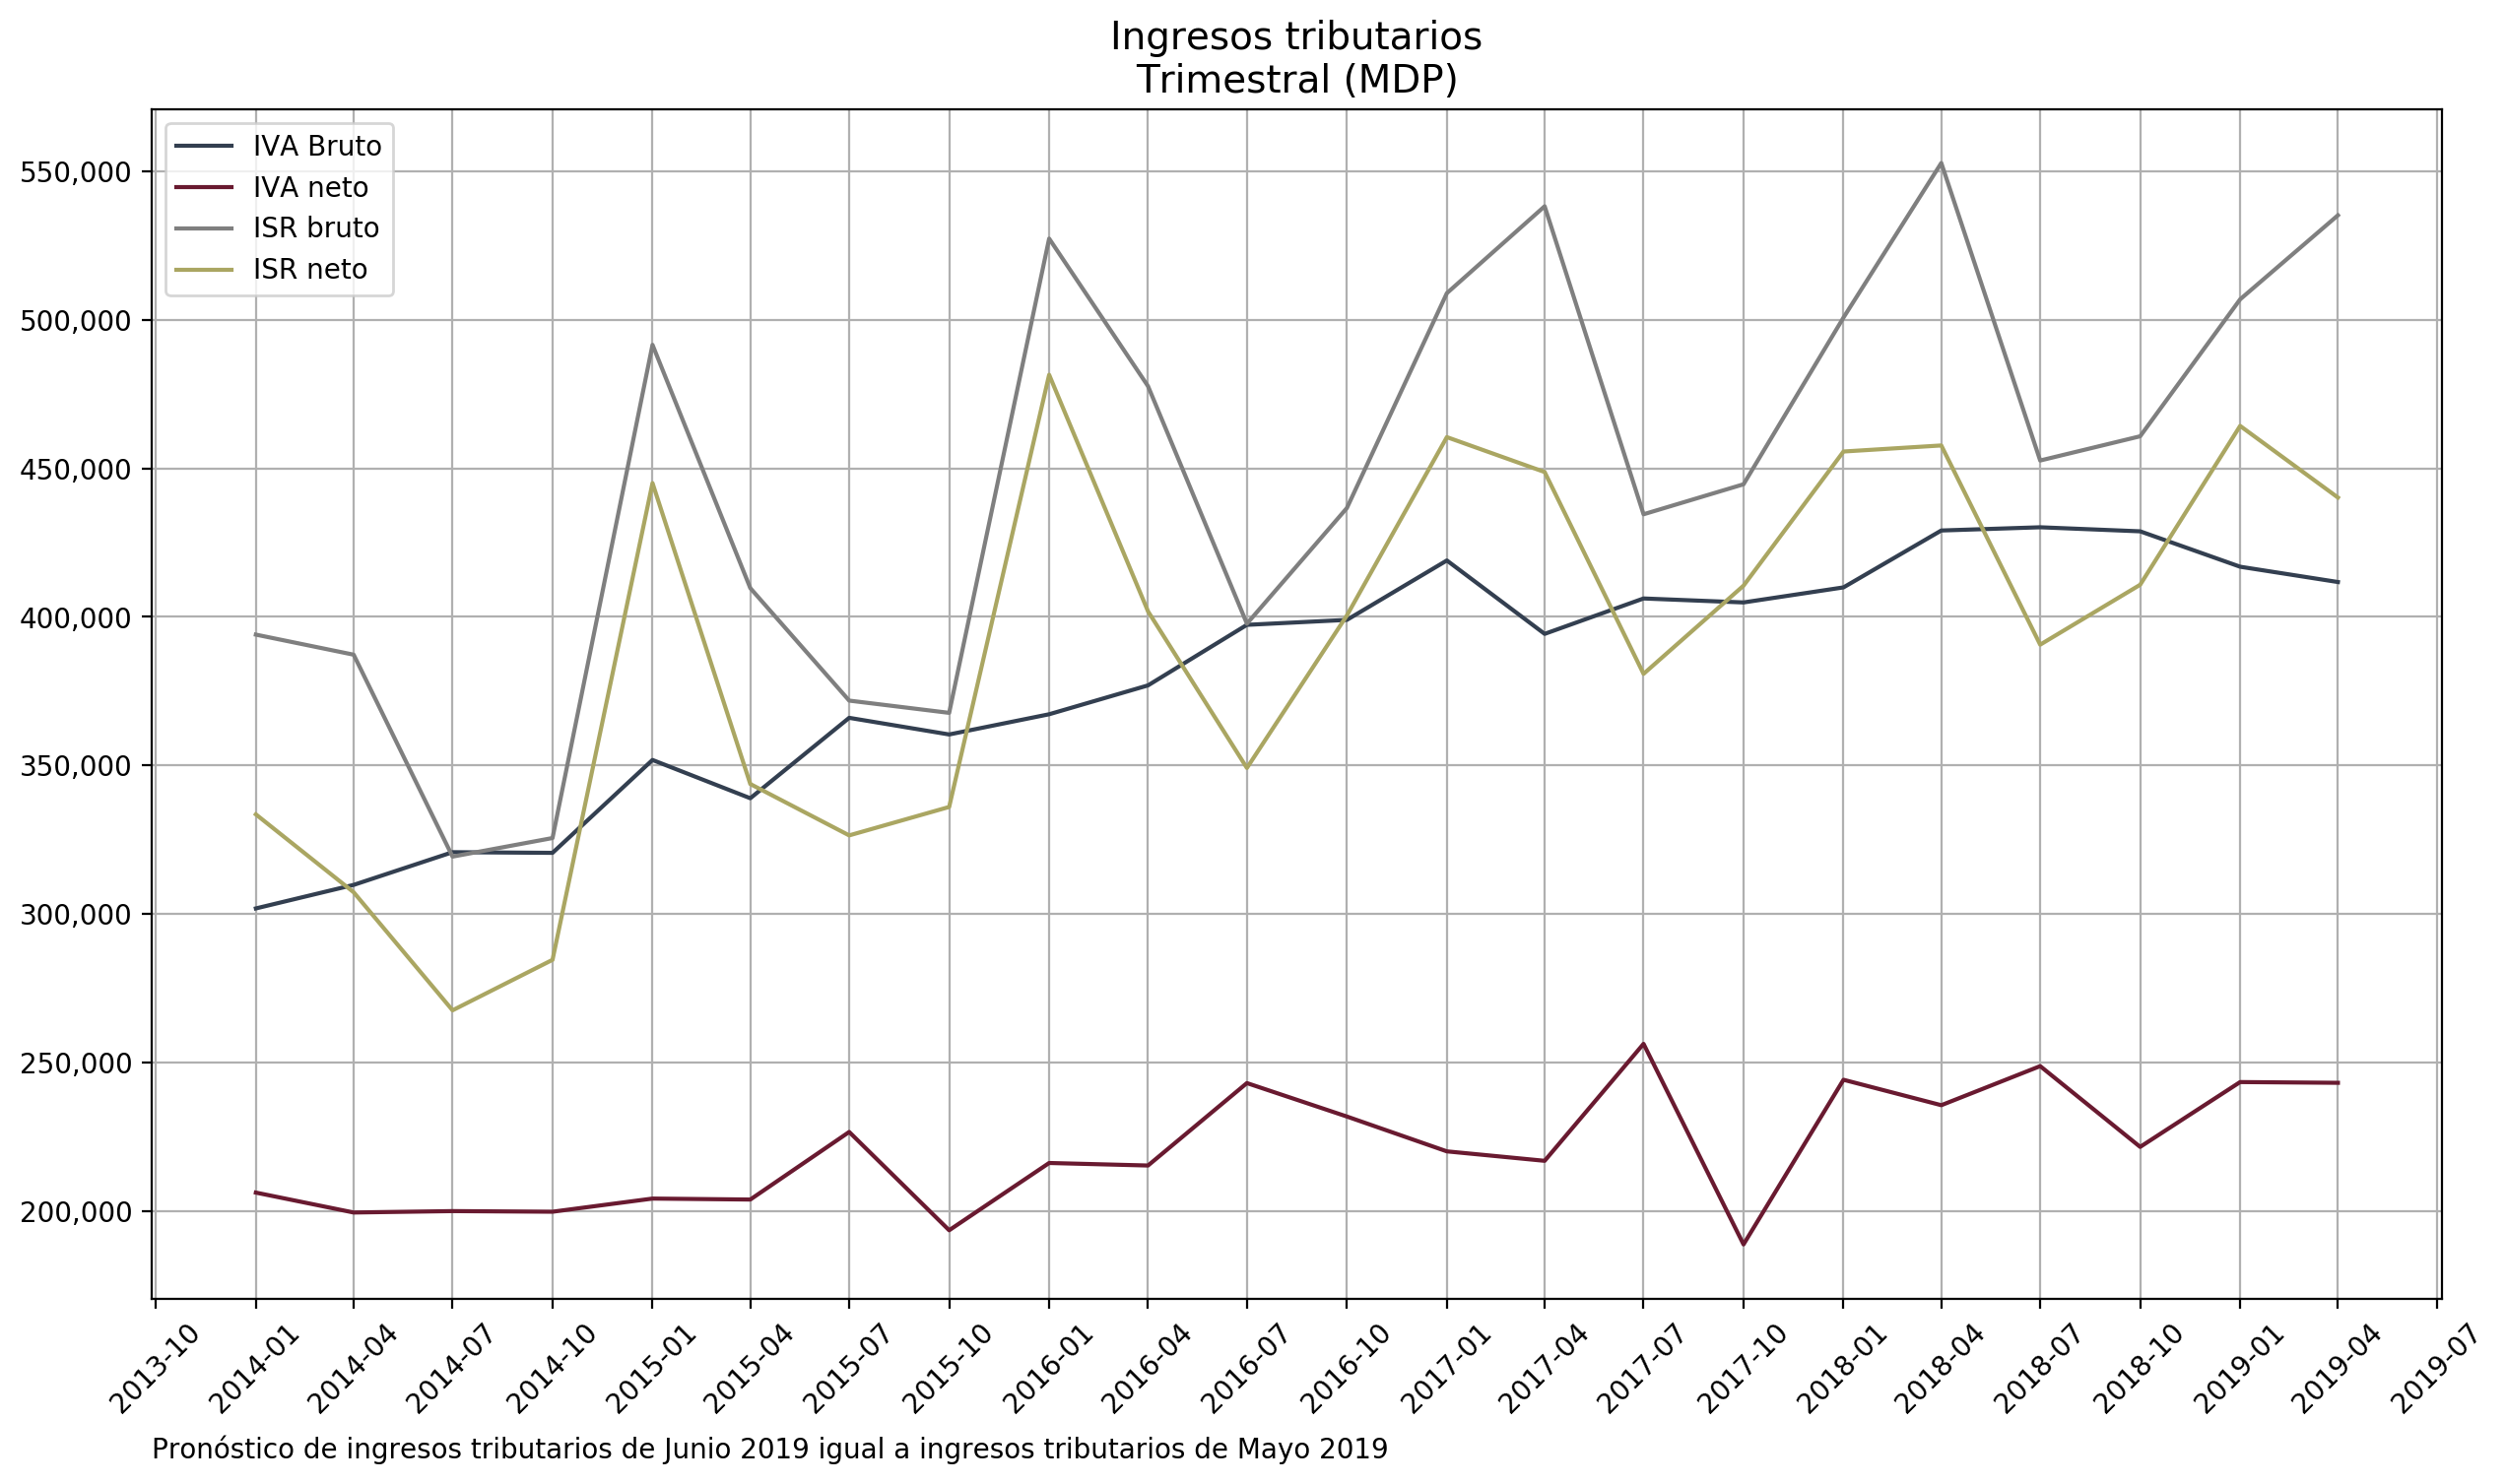

In [91]:
descriptive.plot_series(df=ingresos_sat_q,
                        cols=['iva_bruto_(mdp)_r', 'iva_neto_(mdp)_r','isr_bruto_(mdp)_r', 'isr_neto_(mdp)_r'],
                        legend= ['IVA Bruto', 'IVA neto','ISR bruto', 'ISR neto'],
                        title='Ingresos tributarios', subtitle='Trimestral (MDP)',ticks='quarterly',
                        footnote=footnote)

## Volvemos a calcular valores porcentuales

In [92]:
# Para calcular la eficiencia tributaria, tenemos que hacer un loop sobre cada uno de los impuestos y sobre cada
# una de las predicciones. Para ello, creamos una lista de los impuestos que usaremos, y usaremos la lista que 
# creamos que tiene los nombres de las predicciones. También crearemos un nuevo DataFrame con los valores de
# eficiencia.
eficiencia_df_q = pd.DataFrame(index=ingresos_sat_q.index)
impuestos_a_usar = ['iva_bruto_(mdp)_r', 'iva_neto_(mdp)_r', 'isr_bruto_(mdp)_r', 'isr_neto_(mdp)_r']
# Ampliamos la lista de prediction_names_l para que incluya el pib original. Esto serirá para graficar
prediction_names_l.append('pibr_2019')
for tax in impuestos_a_usar:
    for prediction_name in prediction_names_l:
        # Obtenemos el impuesto que usaremos como denominador
        impuesto = ingresos_sat_q[tax]
        # Obtenemos la predicción que usaremos como denominador
        prediction_pib = pib_r_df_predict_q[prediction_name]
        # Creamos el nombre de la variable que crearemos. Será por ejemplo: 'iva_bruto_%PIB_-1.4%'
        # Para eso, eliminamos la ultima parte del nombre del impuesto, eliminamos la primera parte del
        # nombre de la predicción, y los juntamos con %PIB en medio
        nombre_variable_ef = tax.replace('(mdp)_r', '') + '%PIB_' + prediction_name.replace('pib_r_2019_', '')
        eficiencia_df_q[nombre_variable_ef] = (impuesto / prediction_pib) * 100

# Gráfica 1

In [93]:
footnote_q = '''
Pronóstico del PIB igual al crecimiento anual del IGAE de Abril 2019 de {0:.2f}%
+/- 0.5 y 1 desviaciones estándar del crecimiento del IGAE de {1:.2f}%

Pronóstico de ingresos tributarios de Junio 2019 igual ingresos tributarios de Mayo 2019'''\
.format(last_growth_igae * 100, igae_growth_std * 100)

In [94]:
# De nuevo hacemos un DF específico para el plot
eficiencia_df_q_to_plot = eficiencia_df_q.copy()
# Reemplazamos por NA las variables en prediction_vars para el periodo observado
eficiencia_df_q_to_plot.loc[pd.date_range('2014-01-01', '2018-10-01', freq='QS'), prediction_vars] = np.nan

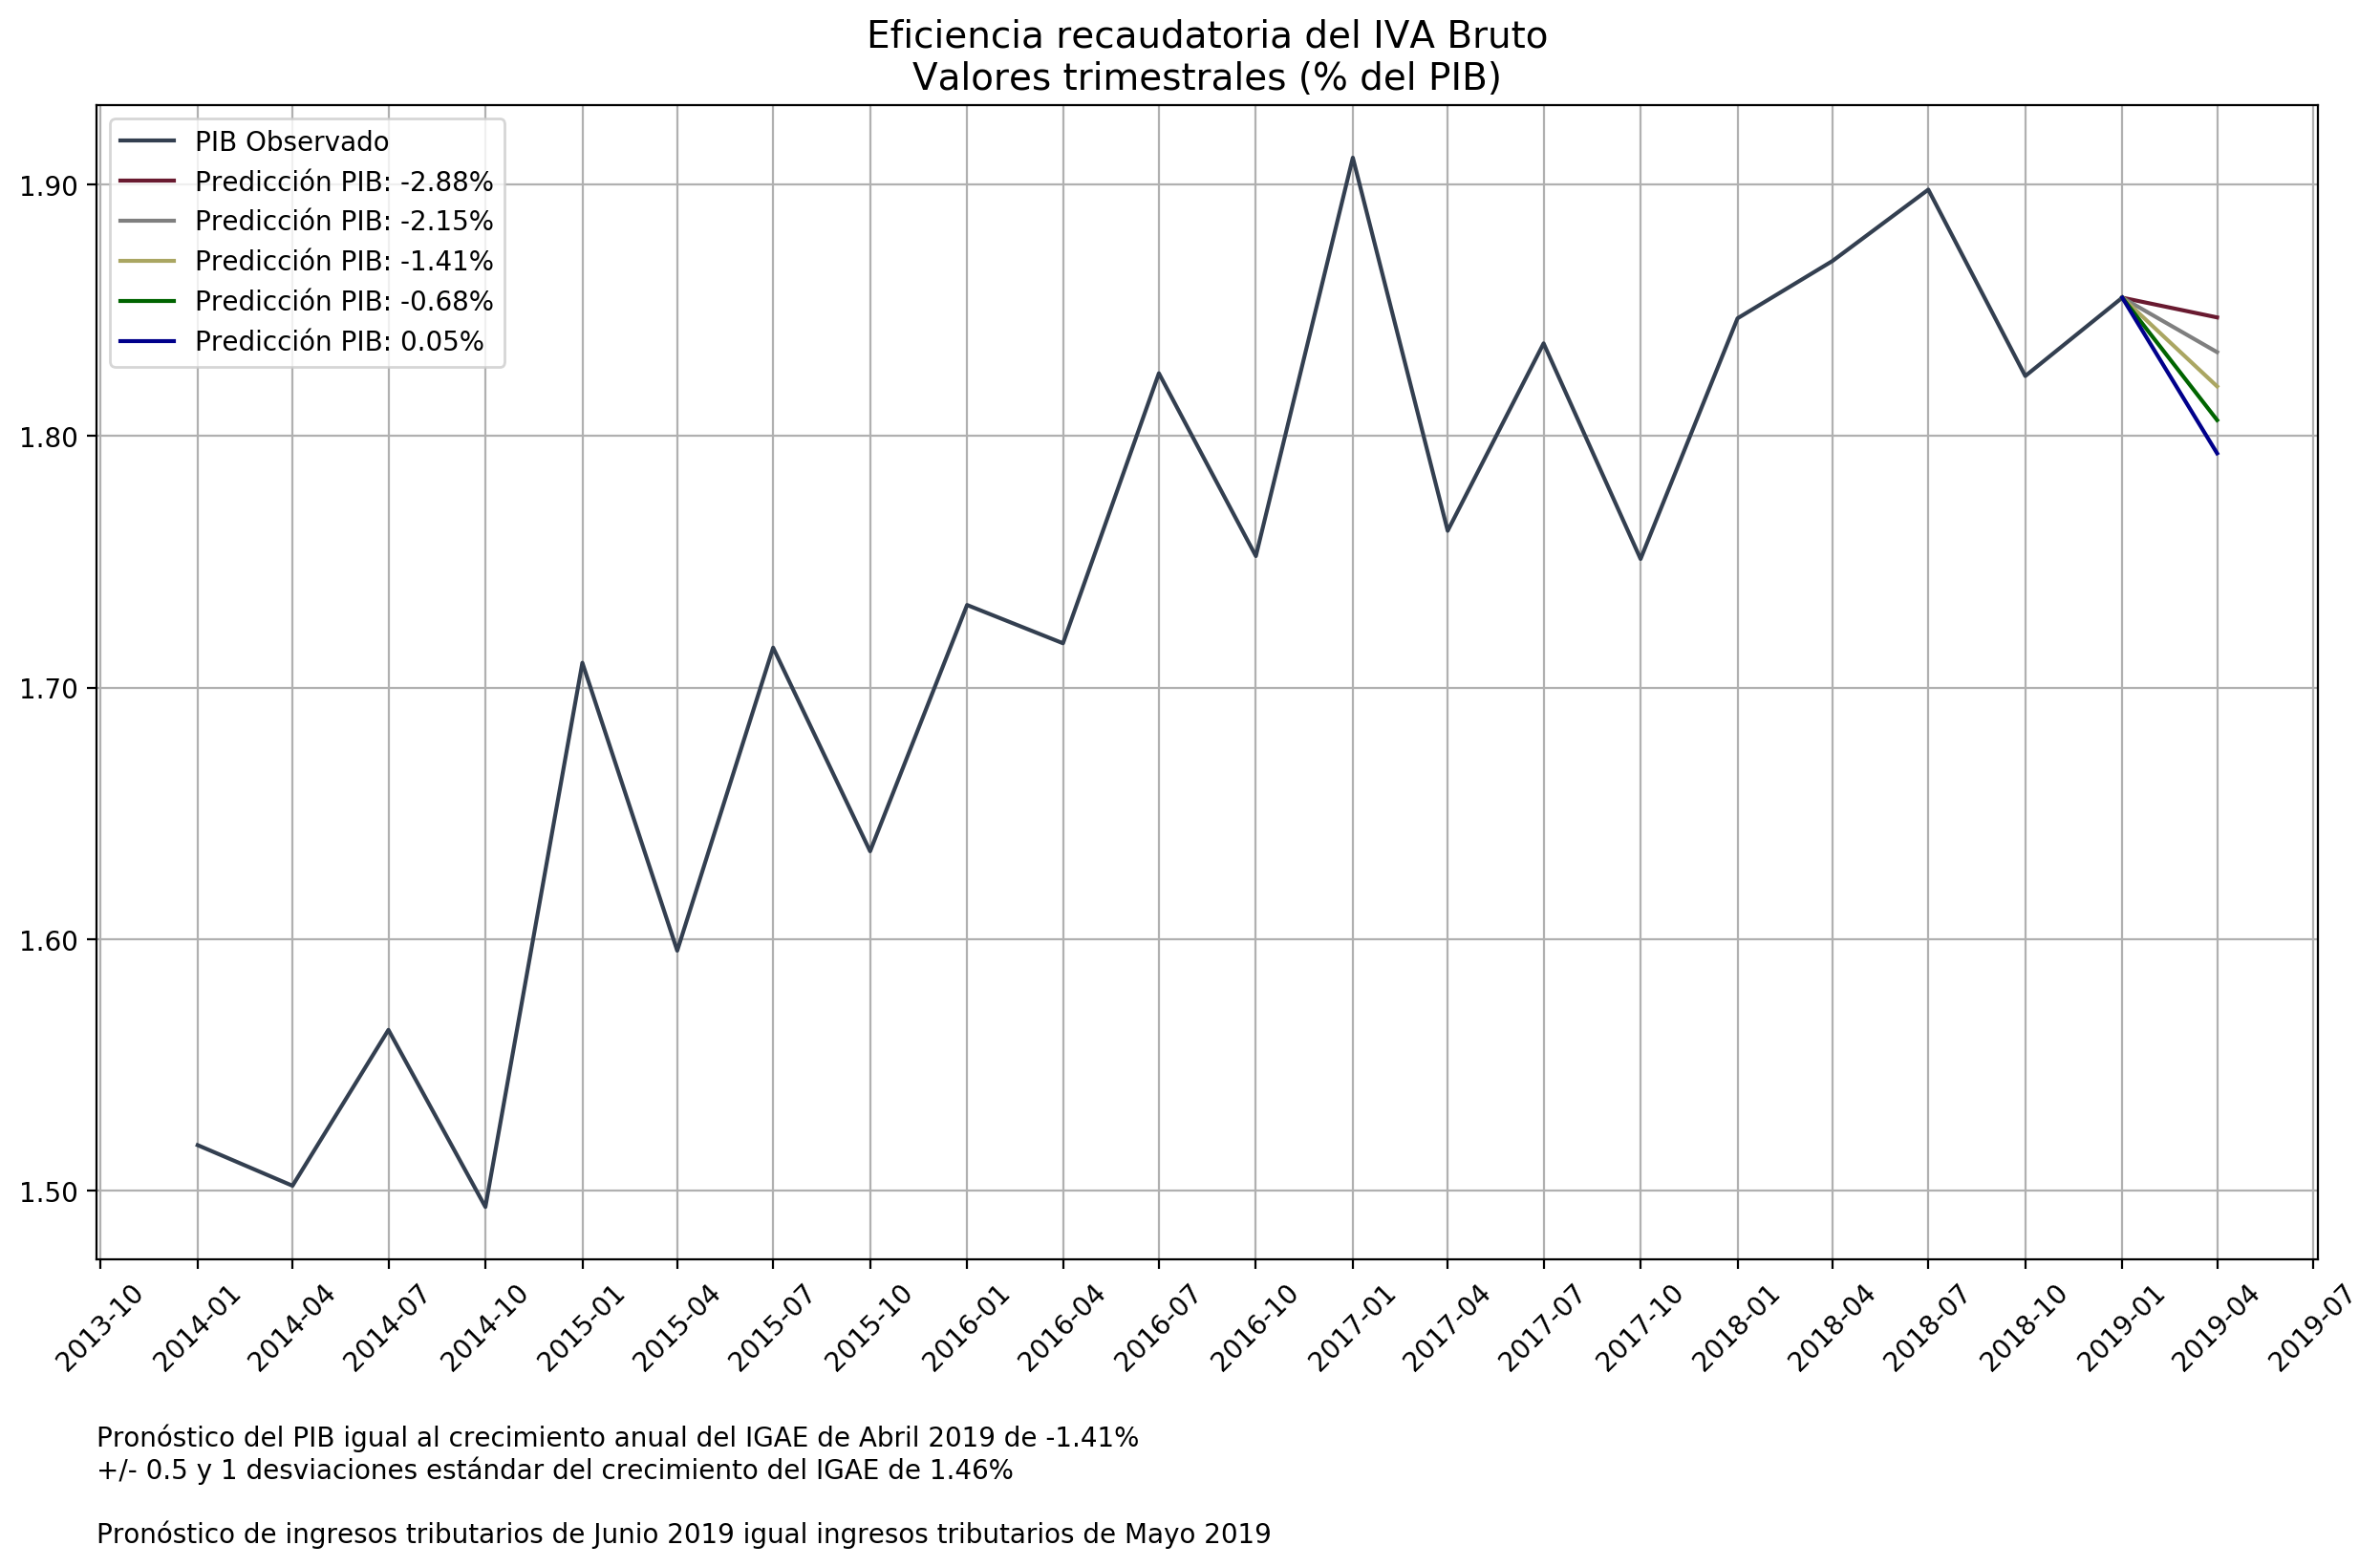

In [95]:
# Hacemos graficas para IVA
descriptive.plot_series(df=eficiencia_df_q_to_plot,
                        cols=graph_vars_dict['iva_bruto'], 
                        legend=graph_labels,
                        title='Eficiencia recaudatoria del IVA Bruto',
                        subtitle='Valores trimestrales (% del PIB)', ticks='quarterly',
#                         save_to='../figures/eficiencia_iva_bruto_trim_2014-01-01.png',
                        footnote=footnote_q)

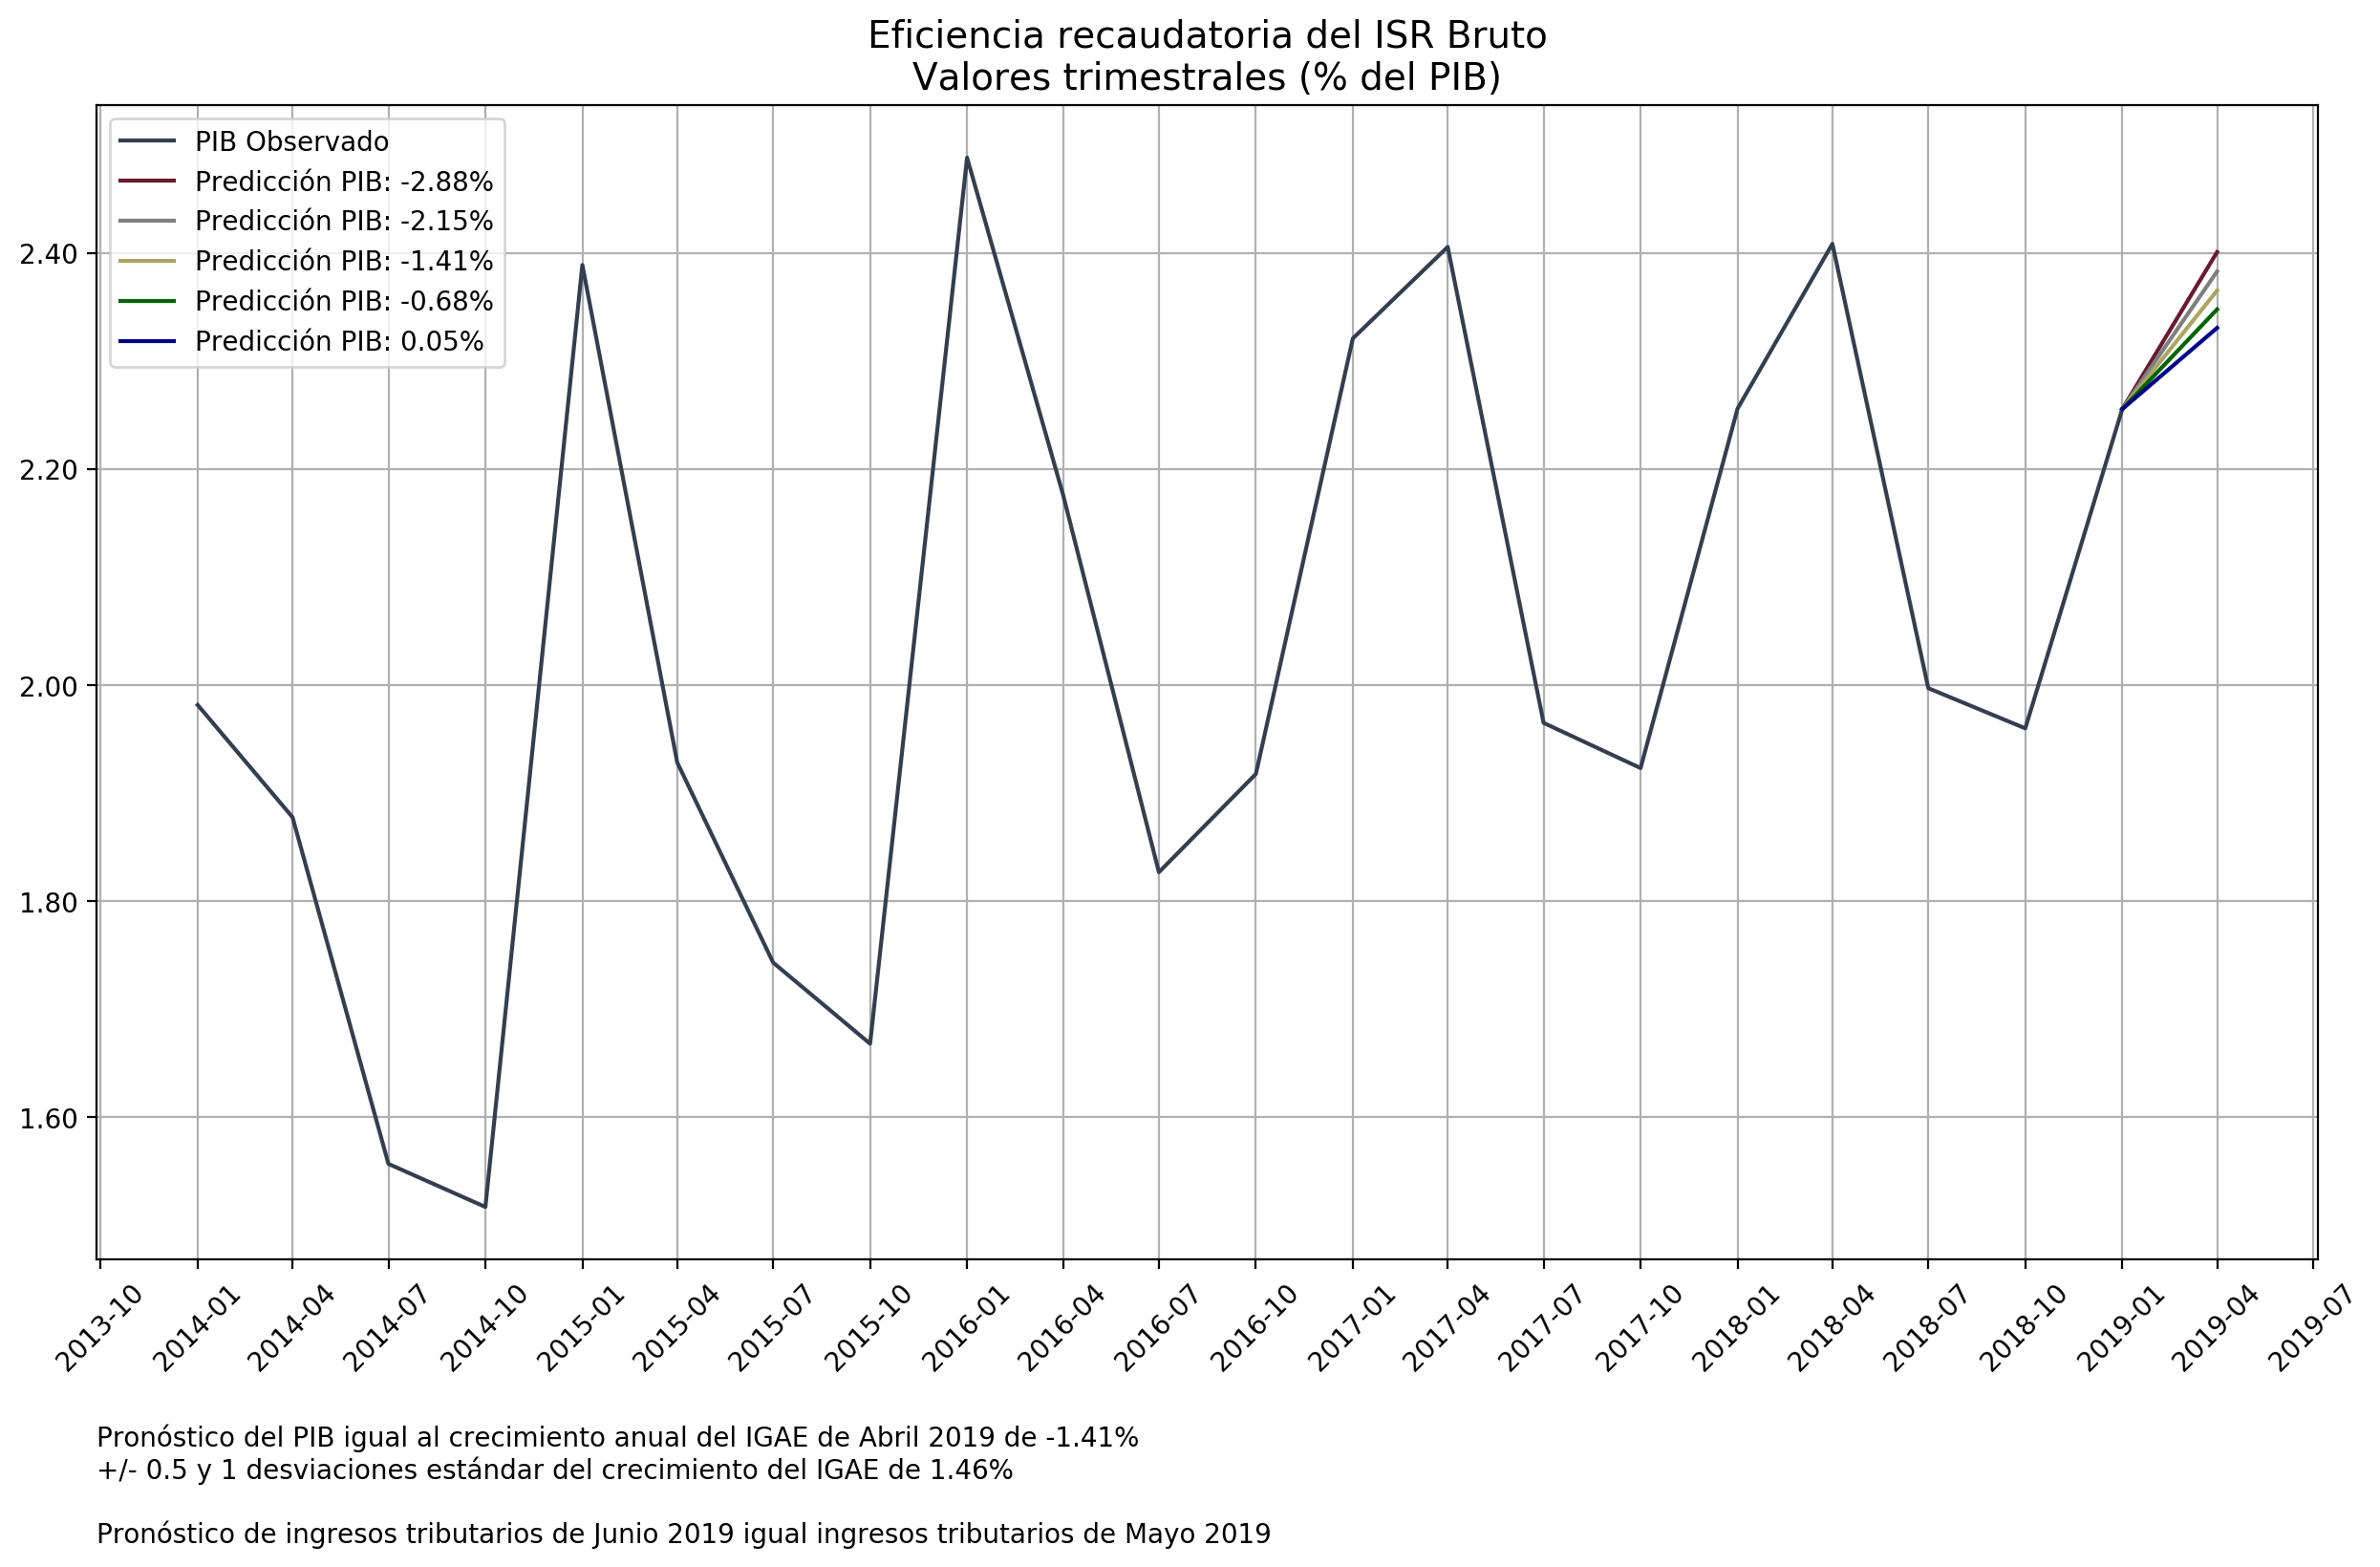

In [96]:
# HAcemos graficas para ISR
descriptive.plot_series(df=eficiencia_df_q_to_plot,
                        cols=graph_vars_dict['isr_bruto'], 
                        legend=graph_labels,
                        title='Eficiencia recaudatoria del ISR Bruto',
                        subtitle='Valores trimestrales (% del PIB)', ticks='quarterly',
#                         save_to='../figures/eficiencia_isr_bruto_trim_2014-01-01.png',
                        footnote=footnote_q)

# Grafica 2
### Cambio en eficiencia recaudatoria IVA e ISR brutos

In [97]:
# Calculamos diferencias en eficiencia
cambio_eficiencia_df_q = eficiencia_df_q.diff(4)

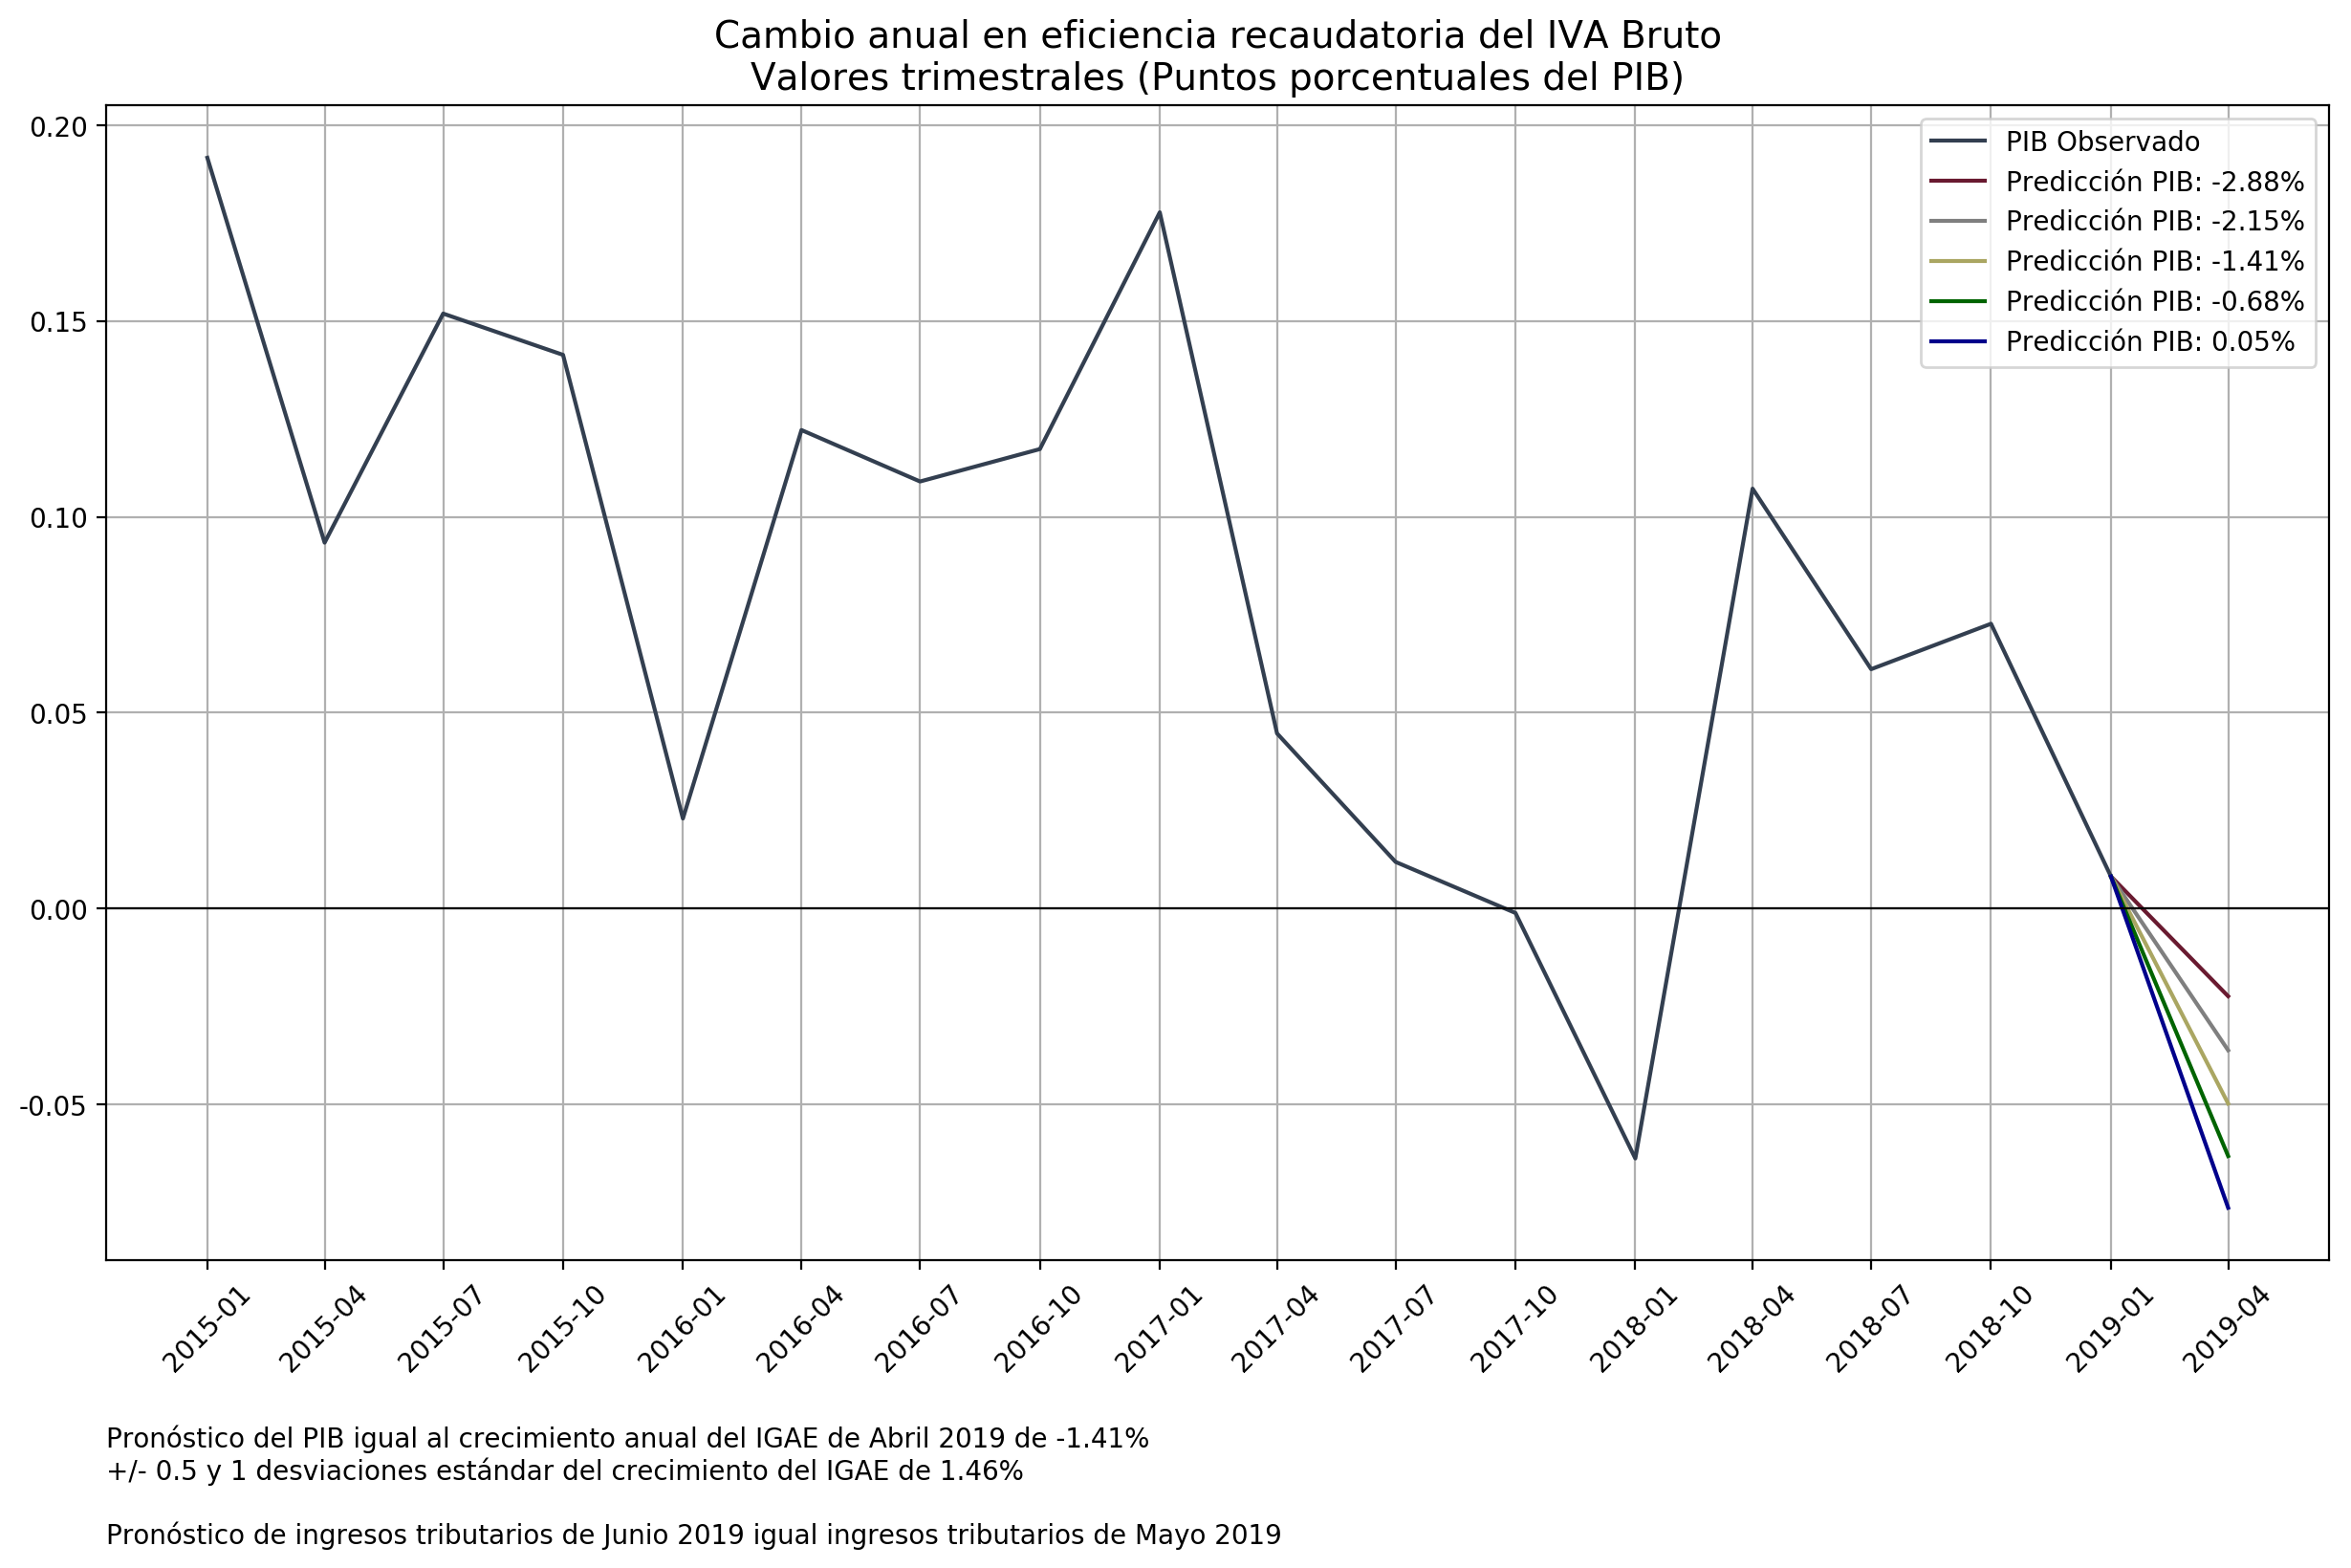

In [98]:
# HAcemos graficas para IVA
cambio_eficiencia_df_q_to_plot = cambio_eficiencia_df_q.copy()
cambio_eficiencia_df_q_to_plot.loc[pd.date_range('2014-01-01', '2018-10-01', freq='QS'), prediction_vars] = np.nan

descriptive.plot_series(cambio_eficiencia_df_q_to_plot,
                        graph_vars_dict['iva_bruto'], 
                        legend=graph_change_labels,
                        title='Cambio anual en eficiencia recaudatoria del IVA Bruto',
                        subtitle='Valores trimestrales (Puntos porcentuales del PIB)', ticks='quarterly',
                        hline=0,
#                         save_to='../figures/cambio_eficiencia_iva_bruto_trim_2014-01-01.png',
                        footnote=footnote_q)

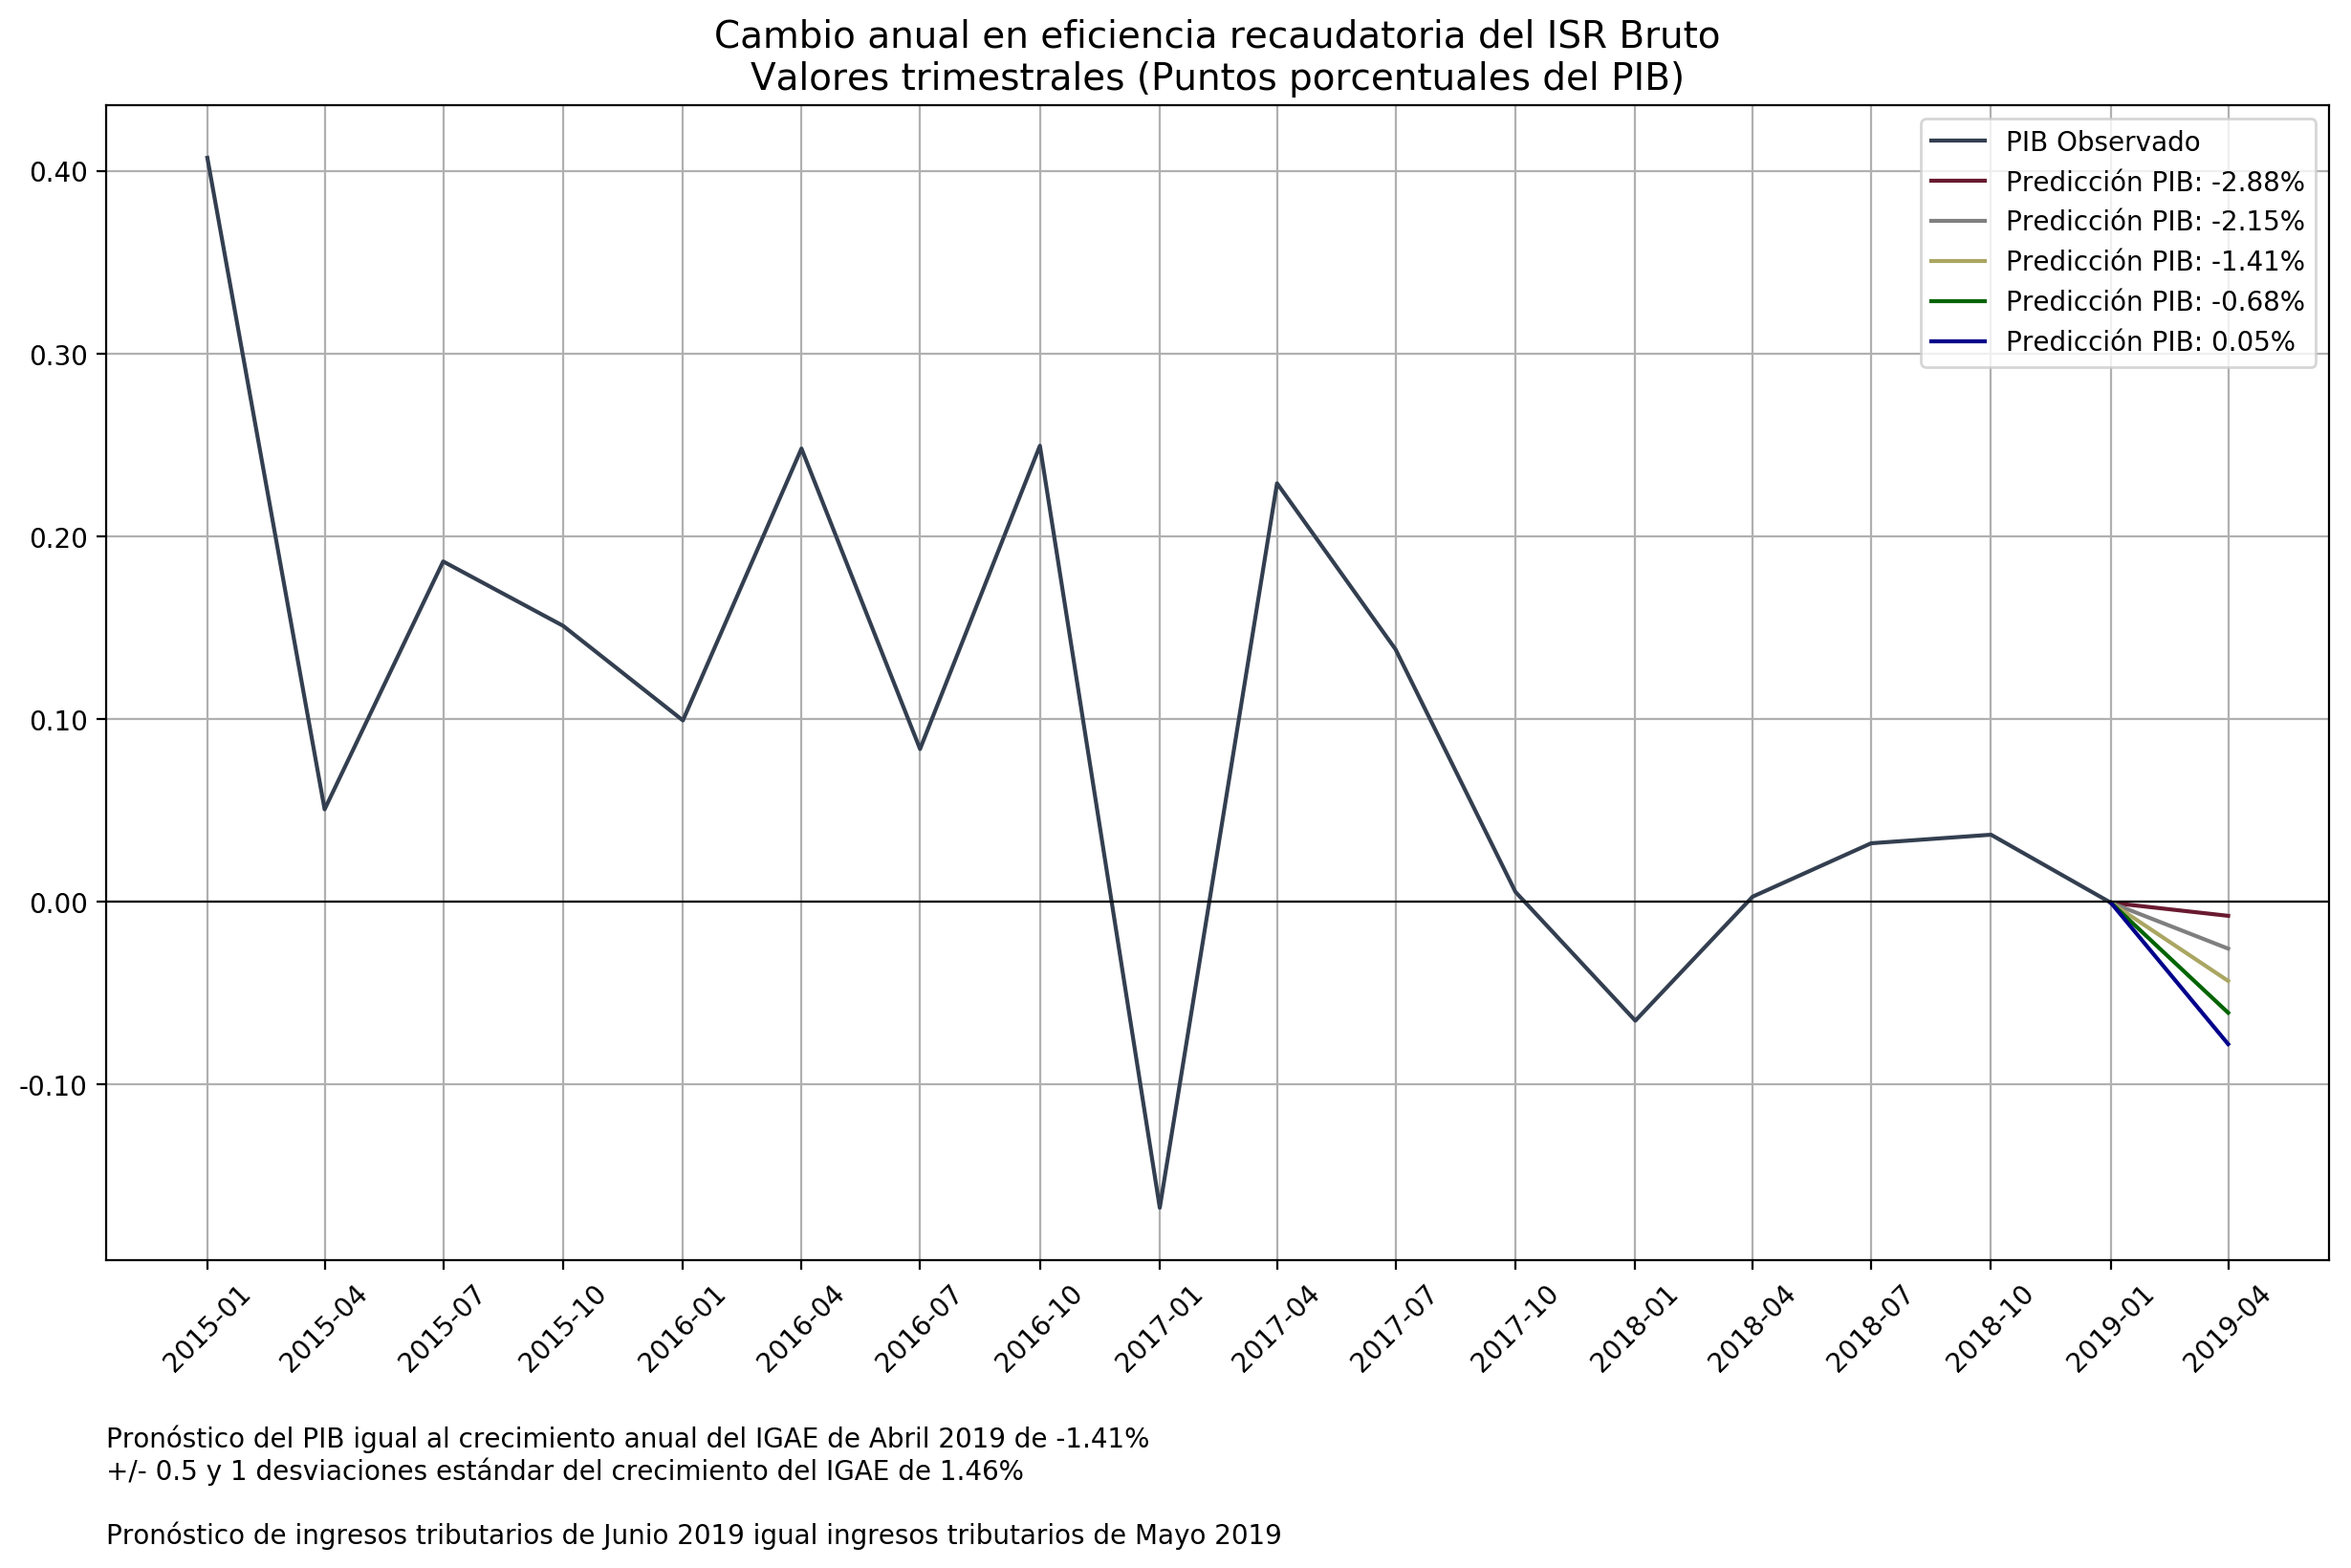

In [99]:
# Hacemos graficas para ISR
descriptive.plot_series(cambio_eficiencia_df_q_to_plot,
                        graph_vars_dict['isr_bruto'], 
                        legend=graph_change_labels,
                        title='Cambio anual en eficiencia recaudatoria del ISR Bruto',
                        subtitle='Valores trimestrales (Puntos porcentuales del PIB)', ticks='quarterly',
                        hline=0,
#                         save_to='../figures/cambio_eficiencia_isr_bruto_trim_2014-01-01.png',
                        footnote=footnote_q)